In [1]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install yfinance

You should consider upgrading via the 'C:\Users\simon\Envs\my_python_environment\Scripts\python.exe -m pip install --upgrade pip' command.


2. Statistiche Descrittive

_______________________________________________________________________________________________________________________________

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
#Tecnologia
meta_df = yf.download('FB', start='2011-11-30', end='2021-11-30')
meta_df = meta_df.groupby(pd.Grouper(freq='M')).mean()
meta_df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-31,33.015556,33.868889,31.057778,31.870000,31.870000,1.390570e+08
2012-06-30,29.537143,30.232381,28.893333,29.540476,29.540476,3.180526e+07
2012-07-31,29.143333,29.598095,28.437619,28.880000,28.880000,2.477094e+07
2012-08-31,20.287391,20.644783,19.768696,20.108261,20.108261,5.008456e+07
2012-09-30,20.629474,21.089474,20.170526,20.627895,20.627895,5.571809e+07


_______________________________________________________________________________________________________________________________

a. Calcolare i rendimenti semplici e composti e visualizzarli in un grafico

_______________________________________________________________________________________________________________________________

Rendimenti Semplici

_______________________________________________________________________________________________________________________________

In [3]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
#Tecnologia

apple_df = yf.download('AAPL', start='2011-11-30', end='2021-11-30')
apple_df = apple_df.groupby(pd.Grouper(freq='M')).mean()

meta_month_returns = meta_df[['Adj Close']]
apple_month_returns = apple_df[['Adj Close']]
rendimenti_df = pd.DataFrame()

rendimenti_netti_meta = np.log(meta_month_returns/meta_month_returns.shift(1))
rendimenti_lordi_meta = np.log(rendimenti_netti_meta + 1)

rendimenti_netti_apple = np.log(apple_month_returns/apple_month_returns.shift(1))
rendimenti_lordi_apple = np.log(rendimenti_netti_apple + 1)

rendimenti_df["Rendimenti Netti Meta"] = rendimenti_netti_meta
rendimenti_df["Rendimenti Lordi Meta"] = rendimenti_lordi_meta
rendimenti_df["Rendimenti Netti Apple"] = rendimenti_netti_apple
rendimenti_df["Rendimenti Lordi Apple"] = rendimenti_lordi_apple
rendimenti_df = rendimenti_df.dropna()

rendimenti_df

[*********************100%***********************]  1 of 1 completed


,Rendimenti Netti Meta,Rendimenti Lordi Meta,Rendimenti Netti Apple,Rendimenti Lordi Apple
Date,,,,
2012-06-30,-0.075904,-0.078939,0.017362,0.017213
2012-07-31,-0.022612,-0.022872,0.045100,0.044112
2012-08-31,-0.362019,-0.449446,0.070179,0.067826
2012-09-30,0.025514,0.025194,0.059794,0.058074
2012-10-31,-0.000406,-0.000406,-0.071222,-0.073885
...,...,...,...,...
2021-07-31,0.049158,0.047988,0.110479,0.104792
2021-08-31,0.026913,0.026557,0.021945,0.021707
2021-09-30,0.002614,0.002611,0.001136,0.001135


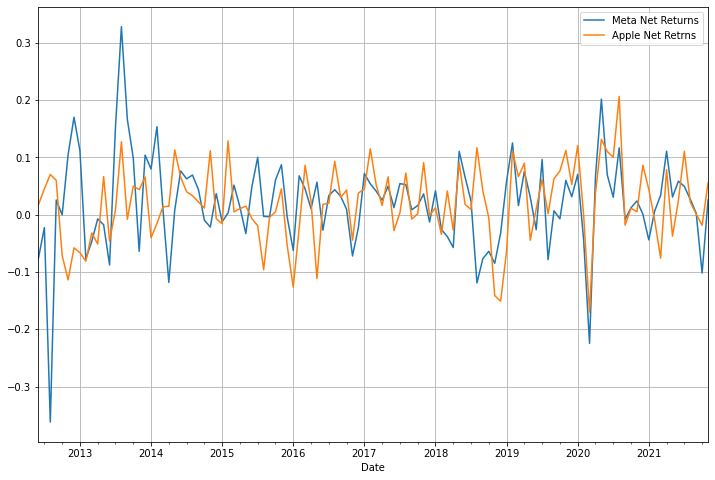

In [4]:
rendimenti_df["Rendimenti Netti Meta"].plot(figsize=(12,8), grid=True, label="Meta Net Returns")
rendimenti_df["Rendimenti Netti Apple"].plot(figsize=(12,8), grid=True, label="Apple Net Retrns")
plt.legend(loc="upper right")
plt.show()

_______________________________________________________________________________________________________

Rendimenti Composti

_______________________________________________________________________________________________________________________________

In [5]:
cum_daily_return_meta = (1 + rendimenti_netti_meta).cumprod()
rendimenti_df["Rendimenti Composti Meta"] = cum_daily_return_meta

cum_daily_return_apple = (1 + rendimenti_netti_apple).cumprod()
rendimenti_df["Rendimenti Composti Apple"] = cum_daily_return_apple
rendimenti_df[["Rendimenti Composti Meta", "Rendimenti Composti Apple"]]


,Rendimenti Composti Meta,Rendimenti Composti Apple
Date,,
2012-06-30,0.924096,1.478520
2012-07-31,0.903201,1.545200
2012-08-31,0.576225,1.653641
2012-09-30,0.590927,1.752518
2012-10-31,0.590687,1.627701
...,...,...
2021-07-31,7.487620,9.381608
2021-08-31,7.689137,9.587484
2021-09-30,7.709239,9.598375


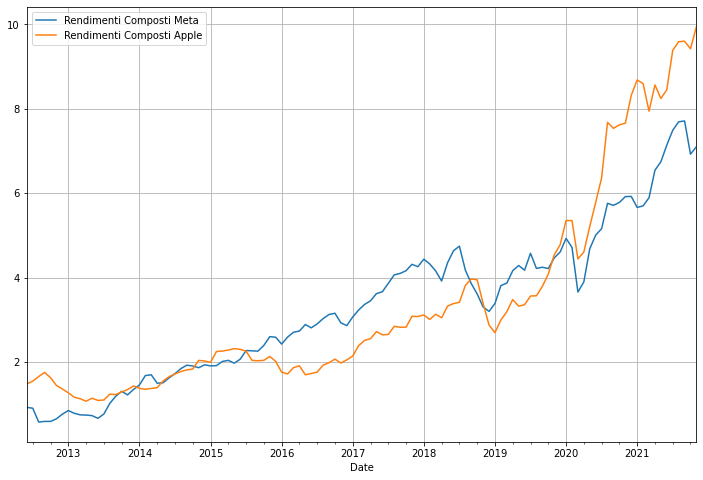

In [6]:
rendimenti_df[["Rendimenti Composti Meta", "Rendimenti Composti Apple"]].plot(figsize=(12,8), grid=True)
plt.show()

____________________________________________________________________________________________________________________________

Che cosa hanno in comune le serie storiche, ci sono momenti di rendimenti molto lontani dalla media?

____________________________________________________________________________________________________________________________

In [7]:
#Tecnologia
meta_df = yf.download('FB', start='2011-11-30', end='2021-11-30')
apple_df = yf.download('AAPL', start='2011-11-30', end='2021-11-30')
apple_meta_df = meta_df.join(apple_df, lsuffix='_Meta', rsuffix='_Apple')
apple_meta_df = apple_meta_df.groupby(pd.Grouper(freq='M')).mean()
apple_meta_df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open_Meta,High_Meta,Low_Meta,Close_Meta,Adj Close_Meta,Volume_Meta,Open_Apple,High_Apple,Low_Apple,Close_Apple,Adj Close_Apple,Volume_Apple
Date,,,,,,,,,,,,
2012-05-31,33.015556,33.868889,31.057778,31.870000,31.870000,1.390570e+08,20.066706,20.355040,19.782024,20.142738,17.269680,5.410574e+08
2012-06-30,29.537143,30.232381,28.893333,29.540476,29.540476,3.180526e+07,20.523605,20.674609,20.329048,20.520085,17.593205,3.740869e+08
2012-07-31,29.143333,29.598095,28.437619,28.880000,28.880000,2.477094e+07,21.414643,21.604320,21.238589,21.466718,18.404816,4.242691e+08
2012-08-31,20.287391,20.644783,19.768696,20.108261,20.108261,5.008456e+07,22.911708,23.094829,22.754938,22.953432,19.742853,3.598351e+08
2012-09-30,20.629474,21.089474,20.170526,20.627895,20.627895,5.571809e+07,24.361372,24.535996,24.146260,24.341730,20.959354,4.841582e+08


In [8]:
apple_meta_df = apple_meta_df[['Adj Close_Meta', 'Adj Close_Apple']]
apple_meta_df.head()

,Adj Close_Meta,Adj Close_Apple
Date,,
2012-05-31,31.870000,17.269680
2012-06-30,29.540476,17.593205
2012-07-31,28.880000,18.404816
2012-08-31,20.108261,19.742853
2012-09-30,20.627895,20.959354


In [9]:
apple_meta_returns = apple_meta_df.pct_change()
apple_meta_returns = apple_meta_returns.dropna()
apple_meta_returns.head()

,Adj Close_Meta,Adj Close_Apple
Date,,
2012-06-30,-0.073095,0.018734
2012-07-31,-0.022358,0.046132
2012-08-31,-0.303731,0.072700
2012-09-30,0.025842,0.061617
2012-10-31,-0.000406,-0.068745


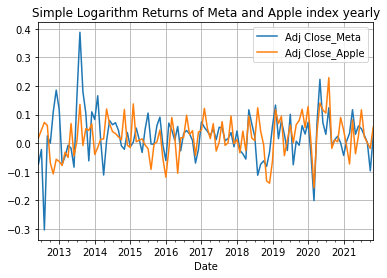

In [10]:
apple_meta_returns.plot(grid=True, title = 'Simple Logarithm Returns of Meta and Apple index yearly');

____________________________________________________________________________________________________________________________

correlazione tra Apple e Meta?

____________________________________________________________________________________________________________________________

In [11]:
import seaborn as sns

data_df = yf.download('FB AAPL', start='2011-11-30', end='2021-11-30')
data_df = data_df['Adj Close']
returns = data_df.pct_change()
returns = returns.dropna()
correlation = returns.corr()
correlation

[*********************100%***********************]  2 of 2 completed


,AAPL,FB
AAPL,1.000000,0.402076
FB,0.402076,1.000000


<AxesSubplot:>

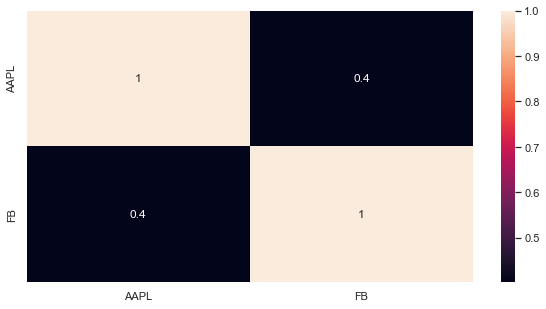

In [12]:
sns.set(rc ={'figure.figsize' : (10, 5)})
sns.heatmap(correlation, annot=True)

_______________________________________________________________________________________________________________________________

In [13]:
#Automobili
import pandas as pd
import yfinance as yf

ford_df = yf.download('F', start='2011-11-30', end='2021-11-30')
tesla_df = yf.download('TSLA', start='2011-11-30', end='2021-11-30')
ford_tesla_df = ford_df.join(tesla_df, lsuffix='_Ford', rsuffix='_Tesla')
ford_tesla_df = ford_tesla_df.groupby(pd.Grouper(freq='M')).mean()
ford_tesla_df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open_Ford,High_Ford,Low_Ford,Close_Ford,Adj Close_Ford,Volume_Ford,Open_Tesla,High_Tesla,Low_Tesla,Close_Tesla,Adj Close_Tesla,Volume_Tesla
Date,,,,,,,,,,,,
2011-11-30,10.180000,10.365000,10.0450,10.295000,6.943751,5.368305e+07,6.499000,6.600000,6.385000,6.449000,6.449000,3.378500e+06
2011-12-31,10.700476,10.852381,10.5000,10.674286,7.199571,4.773234e+07,6.004667,6.114762,5.876000,5.996000,5.996000,5.030595e+06
2012-01-31,12.089500,12.292500,11.9365,12.163000,8.208563,6.324036e+07,5.551200,5.654100,5.391900,5.498000,5.498000,6.402475e+06
2012-02-29,12.562500,12.674000,12.4000,12.522500,8.479299,4.492407e+07,6.502900,6.641700,6.363500,6.552400,6.552400,5.798400e+06
2012-03-31,12.513182,12.627727,12.3900,12.505000,8.467449,4.378027e+07,7.027000,7.156818,6.916455,7.048182,7.048182,5.037159e+06


In [14]:
ford_tesla_df = ford_tesla_df[['Adj Close_Ford', 'Adj Close_Tesla']]
ford_tesla_df.head()

,Adj Close_Ford,Adj Close_Tesla
Date,,
2011-11-30,6.943751,6.449000
2011-12-31,7.199571,5.996000
2012-01-31,8.208563,5.498000
2012-02-29,8.479299,6.552400
2012-03-31,8.467449,7.048182


_______________________________________________________________________________________________________

Rendimenti Semplici

_______________________________________________________________________________________________________

In [15]:
import numpy as np
import matplotlib.pyplot as plt

rendimenti_df = pd.DataFrame()
tesla_df = tesla_df.groupby(pd.Grouper(freq='M')).mean()
ford_df = ford_df.groupby(pd.Grouper(freq='M')).mean()

tesla_df = tesla_df[['Adj Close']]
ford_df = ford_df[['Adj Close']]

rendimenti_netti_tesla = np.log(tesla_df/tesla_df.shift(1))
rendimenti_lordi_tesla = np.log(rendimenti_netti_tesla + 1)

rendimenti_netti_ford = np.log(ford_df/ford_df.shift(1))
rendimenti_lordi_ford = np.log(rendimenti_netti_ford + 1)

rendimenti_df["Rendimenti Netti Tesla"] = rendimenti_netti_tesla
rendimenti_df["Rendimenti Lordi Tesla"] = rendimenti_lordi_tesla
rendimenti_df["Rendimenti Netti Ford"] = rendimenti_netti_ford
rendimenti_df["Rendimenti Lordi Ford"] = rendimenti_lordi_ford
rendimenti_df = rendimenti_df.dropna()
rendimenti_df = rendimenti_df.groupby(pd.Grouper(freq='M')).mean()
rendimenti_df.head()

,Rendimenti Netti Tesla,Rendimenti Lordi Tesla,Rendimenti Netti Ford,Rendimenti Lordi Ford
Date,,,,
2011-12-31,-0.072832,-0.075621,0.036179,0.035540
2012-01-31,-0.086708,-0.090700,0.131156,0.123241
2012-02-29,0.175447,0.161648,0.032450,0.031935
2012-03-31,0.072938,0.070401,-0.001398,-0.001399
2012-04-30,-0.050811,-0.052148,-0.049301,-0.050558


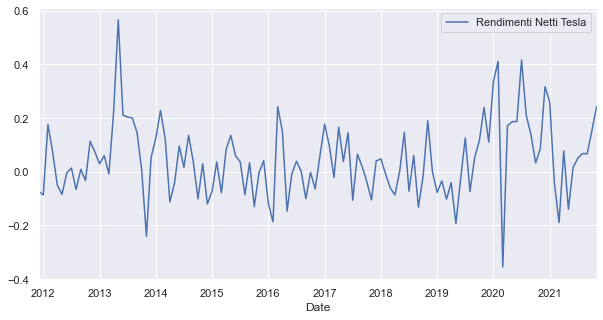

In [16]:
rendimenti_df[["Rendimenti Netti Tesla"]].plot(figsize=(10,5))
plt.show()

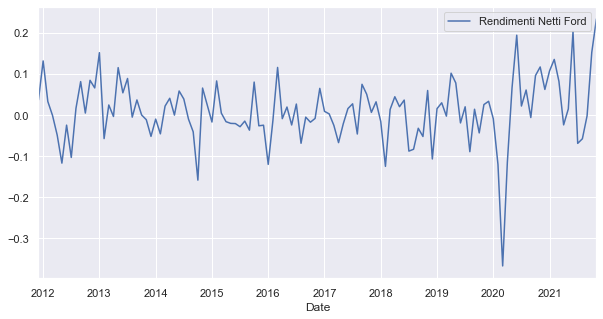

In [17]:
rendimenti_df[["Rendimenti Netti Ford"]].plot(figsize=(10,5))
plt.show()

_______________________________________________________________________________________________________

Rendimenti Composti

_______________________________________________________________________________________________________

In [18]:
cum_daily_return_tesla = (1 + rendimenti_netti_tesla).cumprod()
rendimenti_df["Rendimenti Composti Tesla"] = cum_daily_return_tesla

cum_daily_return_ford = (1 + rendimenti_netti_ford).cumprod()
rendimenti_df["Rendimenti Composti Ford"] = cum_daily_return_ford
rendimenti_df = rendimenti_df.dropna()
rendimenti_df[["Rendimenti Composti Tesla", "Rendimenti Composti Ford"]].head()

,Rendimenti Composti Tesla,Rendimenti Composti Ford
Date,,
2011-12-31,0.927168,1.036179
2012-01-31,0.846775,1.172081
2012-02-29,0.995339,1.210115
2012-03-31,1.067937,1.208423
2012-04-30,1.013673,1.148846


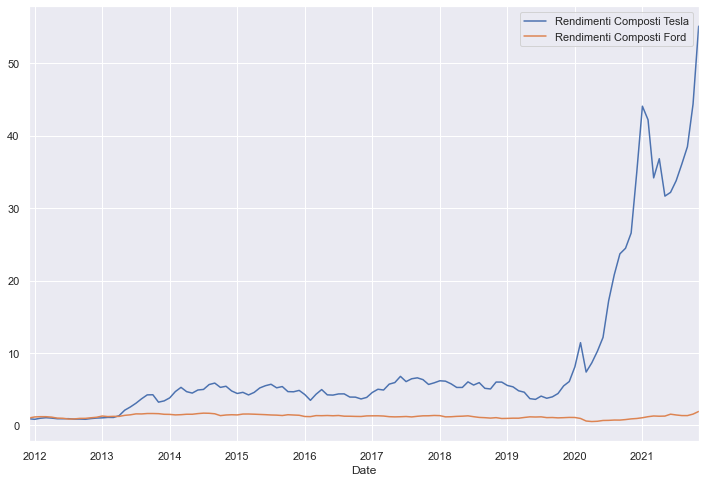

In [19]:
rendimenti_df[["Rendimenti Composti Tesla", "Rendimenti Composti Ford"]].plot(figsize=(12,8))
plt.show()

_______________________________________________________________________________________________________

Che cosa hanno in comune le serie storiche, ci sono momenti di rendimenti molto lontani dalla media?

_______________________________________________________________________________________________________

In [20]:
ford_df = yf.download('F', start='2011-11-30', end='2021-11-30')
tesla_df = yf.download('TSLA', start='2011-11-30', end='2021-11-30')
ford_tesla_df = ford_df.join(tesla_df, lsuffix='_Ford', rsuffix='_Tesla')
ford_tesla_df = ford_tesla_df.groupby(pd.Grouper(freq='M')).mean()
ford_tesla_df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open_Ford,High_Ford,Low_Ford,Close_Ford,Adj Close_Ford,Volume_Ford,Open_Tesla,High_Tesla,Low_Tesla,Close_Tesla,Adj Close_Tesla,Volume_Tesla
Date,,,,,,,,,,,,
2011-11-30,10.180000,10.365000,10.0450,10.295000,6.943751,5.368305e+07,6.499000,6.600000,6.385000,6.449000,6.449000,3.378500e+06
2011-12-31,10.700476,10.852381,10.5000,10.674286,7.199571,4.773234e+07,6.004667,6.114762,5.876000,5.996000,5.996000,5.030595e+06
2012-01-31,12.089500,12.292500,11.9365,12.163000,8.208564,6.324036e+07,5.551200,5.654100,5.391900,5.498000,5.498000,6.402475e+06
2012-02-29,12.562500,12.674000,12.4000,12.522500,8.479299,4.492407e+07,6.502900,6.641700,6.363500,6.552400,6.552400,5.798400e+06
2012-03-31,12.513182,12.627727,12.3900,12.505000,8.467450,4.378027e+07,7.027000,7.156818,6.916455,7.048182,7.048182,5.037159e+06


In [21]:
ford_tesla_df = ford_tesla_df[["Adj Close_Ford", "Adj Close_Tesla"]]
ford_tesla_df_returns = ford_tesla_df.pct_change()
ford_tesla_df_returns = ford_tesla_df_returns.dropna()
ford_tesla_df_returns.head()

,Adj Close_Ford,Adj Close_Tesla
Date,,
2011-12-31,0.036842,-0.070243
2012-01-31,0.140146,-0.083055
2012-02-29,0.032982,0.191779
2012-03-31,-0.001397,0.075664
2012-04-30,-0.048105,-0.049542


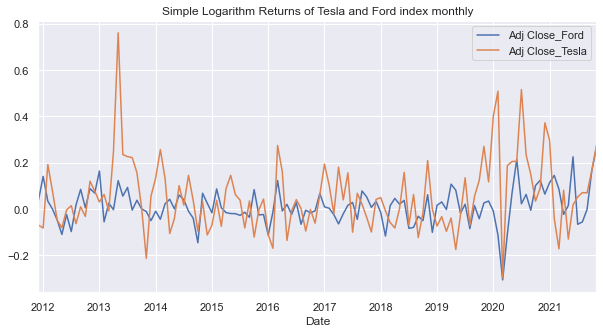

In [22]:
ford_tesla_df_returns.plot(grid=True, title = 'Simple Logarithm Returns of Tesla and Ford index monthly');

_______________________________________________________________________________________________________

correlazione tra Ford e Tesla?

_______________________________________________________________________________________________________

In [23]:
import seaborn as sns

data_df = yf.download('TSLA F', start='2011-11-30', end='2021-11-30')
data_df = data_df['Adj Close']
returns = data_df.pct_change()
returns = returns.dropna()
correlation = returns.corr()
correlation

[*********************100%***********************]  2 of 2 completed


,F,TSLA
F,1.000000,0.257917
TSLA,0.257917,1.000000


<AxesSubplot:>

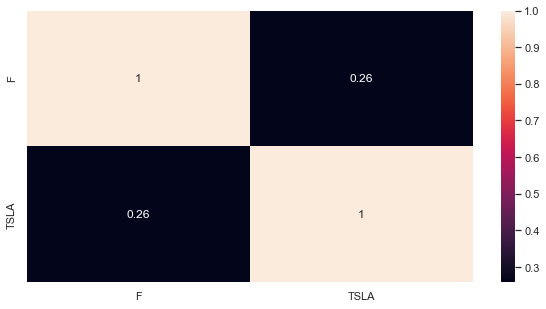

In [24]:
sns.set(rc ={'figure.figsize' : (10, 5)})
sns.heatmap(correlation, annot=True)

_______________________________________________________________________________________________________

In [25]:
#Medicina
nova_df = yf.download('NVAX', start='2011-11-30', end='2021-11-30')
viatris_df = yf.download('VTRS', start='2011-11-30', end='2021-11-30')
nova_viatris_df = nova_df.join(viatris_df, lsuffix='_Nova', rsuffix='_Viatris')
nova_viatris_df = nova_viatris_df.groupby(pd.Grouper(freq='M')).mean()
nova_viatris_df.head()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open_Nova,High_Nova,Low_Nova,Close_Nova,Adj Close_Nova,Volume_Nova,Open_Viatris,High_Viatris,Low_Viatris,Close_Viatris,Adj Close_Viatris,Volume_Viatris
Date,,,,,,,,,,,,
2011-11-30,25.800000,26.900001,24.900001,26.400001,26.400001,28902.500000,18.655001,19.105000,18.540000,19.010000,18.576971,7.455150e+06
2011-12-31,27.076190,27.838095,26.314286,26.923810,26.923810,33706.904762,20.566190,20.852381,20.339524,20.599048,20.129822,5.585424e+06
2012-01-31,27.290000,28.530000,26.720000,27.520000,27.520000,61173.000000,21.598500,21.830500,21.334000,21.571500,21.080123,5.464170e+06
2012-02-29,28.370000,28.810000,27.580000,28.040000,28.040000,32645.750000,22.875500,23.207500,22.635000,22.959500,22.436506,6.308110e+06
2012-03-31,26.627273,27.018182,26.090909,26.400000,26.400000,30542.954545,22.962273,23.143636,22.751818,22.964091,22.440992,4.632941e+06


In [26]:
nova_viatris_df = nova_viatris_df[['Adj Close_Nova', 'Adj Close_Viatris']]
nova_viatris_df.head()

,Adj Close_Nova,Adj Close_Viatris
Date,,
2011-11-30,26.400001,18.576971
2011-12-31,26.923810,20.129822
2012-01-31,27.520000,21.080123
2012-02-29,28.040000,22.436506
2012-03-31,26.400000,22.440992


_______________________________________________________________________________________________________

Rendimenti Semplici

_______________________________________________________________________________________________________

In [27]:
import numpy as np
import matplotlib.pyplot as plt

rendimenti_df = pd.DataFrame()
nova_df = nova_df.groupby(pd.Grouper(freq='M')).mean()
viatris_df = viatris_df.groupby(pd.Grouper(freq='M')).mean()

nova_df = nova_df[['Adj Close']]
viatris_df = viatris_df[['Adj Close']]

rendimenti_netti_nova = np.log(nova_df/nova_df.shift(1))
rendimenti_lordi_nova = np.log(rendimenti_netti_nova + 1)

rendimenti_netti_viatris = np.log(viatris_df/viatris_df.shift(1))
rendimenti_lordi_viatris = np.log(rendimenti_netti_viatris + 1)

rendimenti_df["Rendimenti Netti Nova"] = rendimenti_netti_nova
rendimenti_df["Rendimenti Lordi Nova"] = rendimenti_lordi_nova
rendimenti_df["Rendimenti Netti Viatris"] = rendimenti_netti_viatris
rendimenti_df["Rendimenti Lordi Viatris"] = rendimenti_lordi_viatris
rendimenti_df = rendimenti_df.dropna()
rendimenti_df = rendimenti_df.groupby(pd.Grouper(freq='M')).mean()
rendimenti_df.head()

,Rendimenti Netti Nova,Rendimenti Lordi Nova,Rendimenti Netti Viatris,Rendimenti Lordi Viatris
Date,,,,
2011-12-31,0.019647,0.019456,0.080280,0.077220
2012-01-31,0.021902,0.021666,0.046128,0.045096
2012-02-29,0.018719,0.018546,0.062359,0.060492
2012-03-31,-0.060268,-0.062161,0.000200,0.000200
2012-04-30,-0.062924,-0.064991,-0.030512,-0.030987


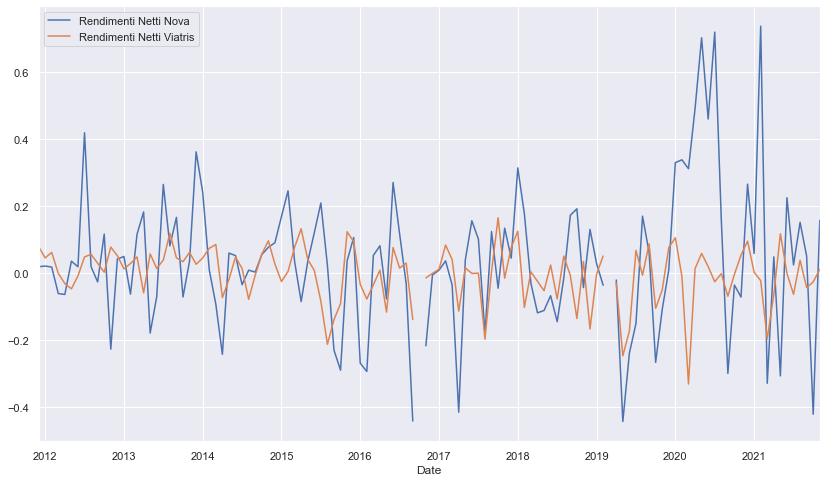

In [28]:
rendimenti_df[["Rendimenti Netti Nova", "Rendimenti Netti Viatris"]].plot(figsize=(14,8))
plt.show()

_______________________________________________________________________________________________________

Rendimenti Composti

_______________________________________________________________________________________________________

In [29]:
cum_daily_return_nova = (1 + rendimenti_netti_nova).cumprod()
rendimenti_df["Rendimenti Composti Nova"] = cum_daily_return_nova

cum_daily_return_viatris = (1 + rendimenti_netti_viatris).cumprod()
rendimenti_df["Rendimenti Composti Viatris"] = cum_daily_return_viatris
rendimenti_df = rendimenti_df.dropna()
rendimenti_df[["Rendimenti Composti Nova", "Rendimenti Composti Viatris"]]

,Rendimenti Composti Nova,Rendimenti Composti Viatris
Date,,
2011-12-31,1.019647,1.080280
2012-01-31,1.041979,1.130111
2012-02-29,1.061484,1.200583
2012-03-31,0.997511,1.200823
2012-04-30,0.934744,1.164184
...,...,...
2021-07-31,0.041850,0.480638
2021-08-31,0.048215,0.499363
2021-09-30,0.050689,0.478168


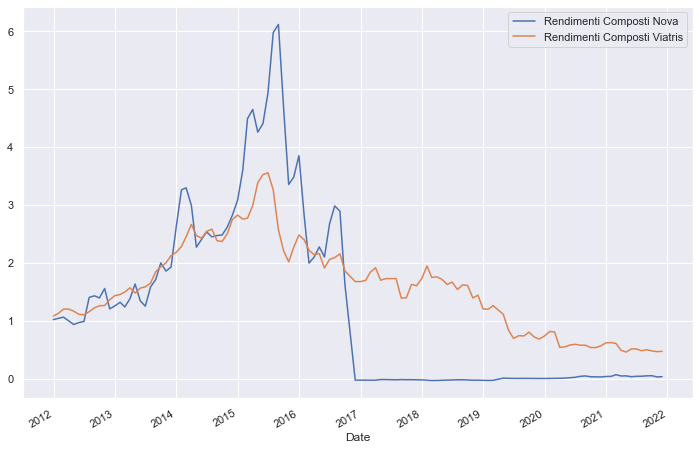

In [30]:
rendimenti_df[["Rendimenti Composti Nova", "Rendimenti Composti Viatris"]].plot(figsize=(12,8))
plt.show()

_______________________________________________________________________________________________________

Che cosa hanno in comune le serie storiche, ci sono momenti di rendimenti molto lontani dalla media?

_______________________________________________________________________________________________________

In [31]:
nova_viatris_df.head()

,Adj Close_Nova,Adj Close_Viatris
Date,,
2011-11-30,26.400001,18.576971
2011-12-31,26.923810,20.129822
2012-01-31,27.520000,21.080123
2012-02-29,28.040000,22.436506
2012-03-31,26.400000,22.440992


In [32]:
nova_viatris_df = nova_viatris_df[["Adj Close_Nova", "Adj Close_Viatris"]]
nova_viatris_returns = nova_viatris_df.pct_change()
nova_viatris_returns = nova_viatris_returns.dropna()
nova_viatris_returns.head()

,Adj Close_Nova,Adj Close_Viatris
Date,,
2011-12-31,0.019841,0.083590
2012-01-31,0.022144,0.047209
2012-02-29,0.018895,0.064344
2012-03-31,-0.058488,0.000200
2012-04-30,-0.060985,-0.030051


In [33]:
moderna_df = yf.download('MRNA', start='2018-12-07', end='2021-11-30')
moderna_df = moderna_df[["Adj Close"]]
moderna_returns_df = moderna_df.pct_change()
moderna_returns_df = moderna_returns_df.dropna()
moderna_returns_df = moderna_returns_df.groupby(pd.Grouper(freq='M')).mean()
moderna_returns_df.head()

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2018-12-31,-0.012011
2019-01-31,0.004798
2019-02-28,0.017586
2019-03-31,-0.004356
2019-04-30,0.013061


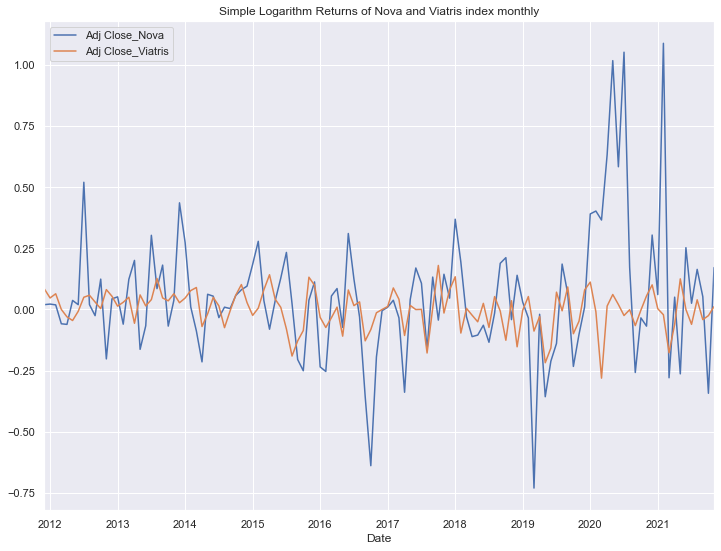

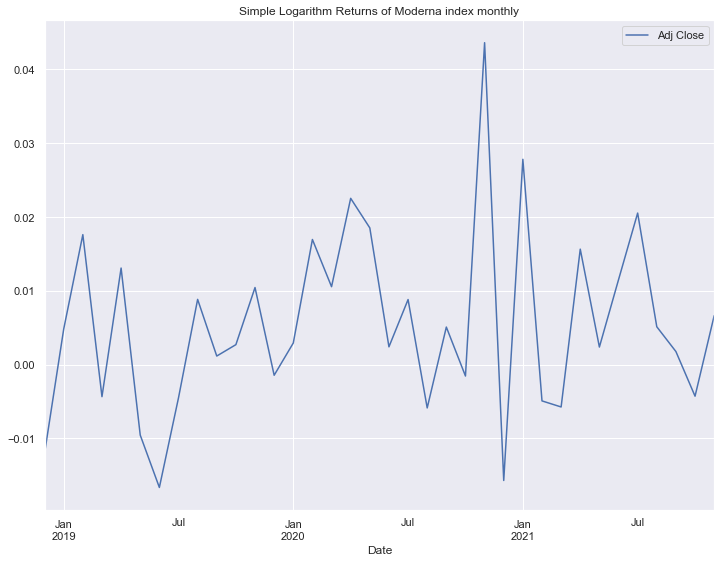

In [34]:
nova_viatris_returns.plot(grid=True, figsize=(12,9), title = 'Simple Logarithm Returns of Nova and Viatris index monthly');
moderna_returns_df.plot(grid=True, figsize=(12,9), title = 'Simple Logarithm Returns of Moderna index monthly');

_______________________________________________________________________________________________________

correlazione tra Viatris e Novavax?

_______________________________________________________________________________________________________

In [35]:
import seaborn as sns

data_df = yf.download('NVAX VTRS', start='2011-11-30', end='2021-11-30')
data_df = data_df['Adj Close']
returns = data_df.pct_change()
returns = returns.dropna()
correlation = returns.corr()
correlation

[*********************100%***********************]  2 of 2 completed


,NVAX,VTRS
NVAX,1.000000,0.120011
VTRS,0.120011,1.000000


<AxesSubplot:>

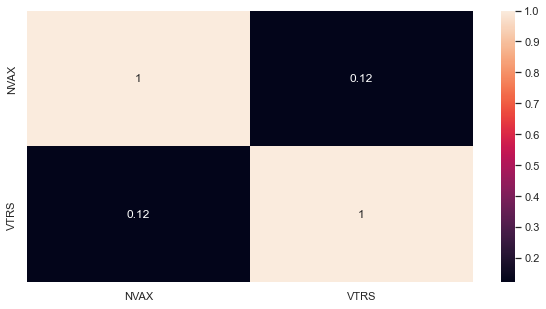

In [36]:
sns.set(rc ={'figure.figsize' : (10, 5)})
sns.heatmap(correlation, annot=True)

_______________________________________________________________________________________________________

correlazione tra Moderna e Novavax?

_______________________________________________________________________________________________________

In [37]:
import seaborn as sns

data_df = yf.download('NVAX MRNA', start='2011-11-30', end='2021-11-30')
data_df = data_df['Adj Close']
returns = data_df.pct_change()
returns = returns.dropna()
correlation = returns.corr()
correlation

[*********************100%***********************]  2 of 2 completed


,MRNA,NVAX
MRNA,1.000000,0.240901
NVAX,0.240901,1.000000


<AxesSubplot:>

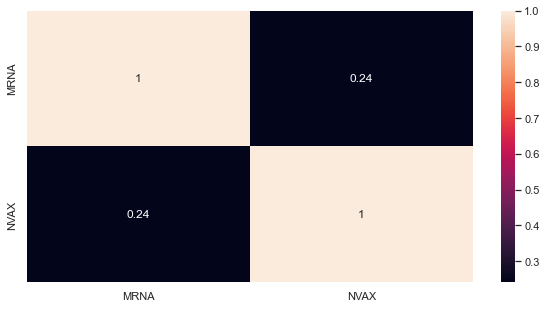

In [38]:
sns.set(rc ={'figure.figsize' : (10, 5)})
sns.heatmap(correlation, annot=True)

_______________________________________________________________________________________________________

c. Presentare i rendimenti con istogrammi e confrontare la dispersione dei rendimenti dei diversi titoli

_______________________________________________________________________________________________________

<AxesSubplot:ylabel='Density'>

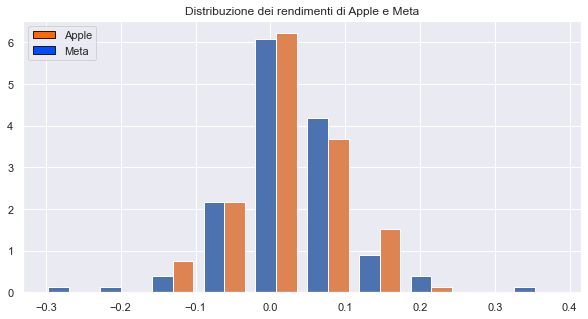

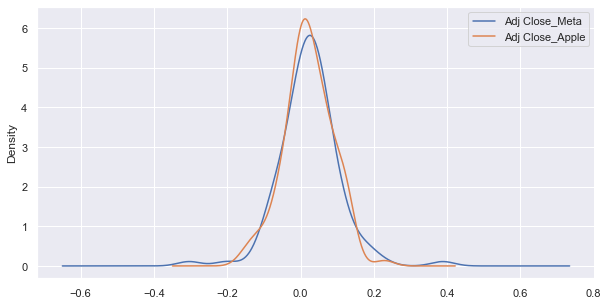

In [39]:
from matplotlib.patches import Rectangle

cmap = plt.get_cmap('jet')
color1 = cmap(0.8)
color2 =cmap(0.2)

plt.hist(apple_meta_returns, density = True)
plt.title('Distribuzione dei rendimenti di Apple e Meta')
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [color1, color2]]
labels= ["Apple","Meta"]
legend1 = plt.legend(handles, labels, loc='upper left')

standard_deviation = apple_meta_returns.std()


apple_meta_returns.plot.density()

In [40]:
standard_deviation

Adj Close_Meta     0.081584
Adj Close_Apple    0.066717
dtype: float64

<AxesSubplot:ylabel='Density'>

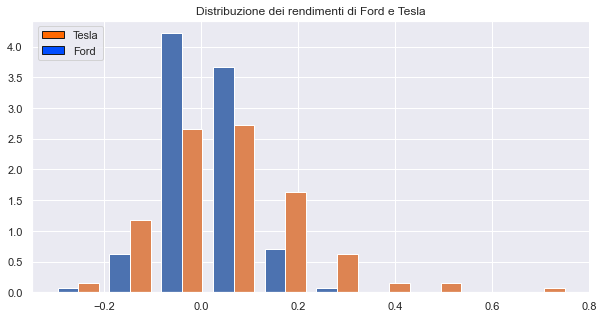

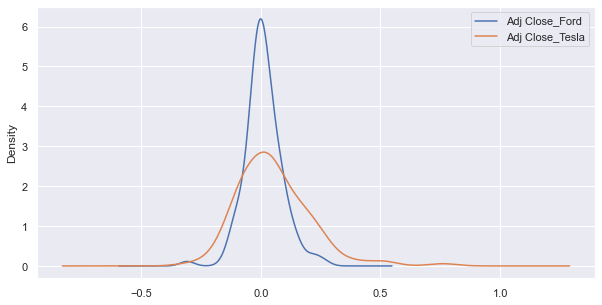

In [41]:
from matplotlib.patches import Rectangle

cmap = plt.get_cmap('jet')
color1 = cmap(0.8)
color2 =cmap(0.2)

plt.hist(ford_tesla_df_returns, density = True)
plt.title('Distribuzione dei rendimenti di Ford e Tesla')
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [color1, color2]]
labels= ["Tesla","Ford"]
legend1 = plt.legend(handles, labels, loc='upper left')

standard_deviation = ford_tesla_df_returns.std()

ford_tesla_df_returns.plot.density()

In [42]:
standard_deviation

Adj Close_Ford     0.077001
Adj Close_Tesla    0.153962
dtype: float64

<AxesSubplot:ylabel='Density'>

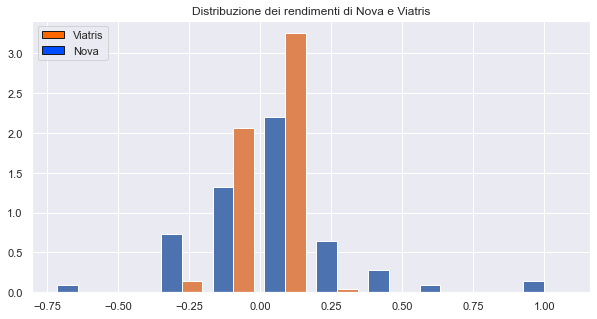

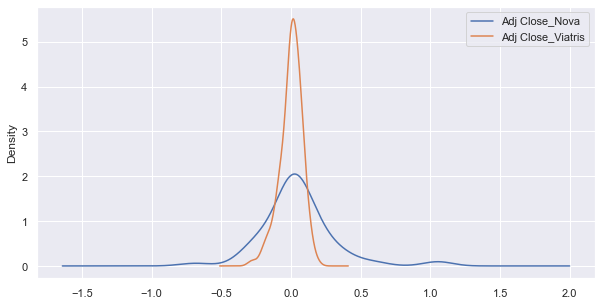

In [43]:
from matplotlib.patches import Rectangle

cmap = plt.get_cmap('jet')
color1 = cmap(0.8)
color2 =cmap(0.2)

plt.hist(nova_viatris_returns, density = True)
plt.title('Distribuzione dei rendimenti di Nova e Viatris')
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [color1, color2]]
labels= ["Viatris","Nova"]
legend1 = plt.legend(handles, labels, loc='upper left')

standard_deviation = ford_tesla_df_returns.std()

nova_viatris_returns.plot.density()

In [44]:
standard_deviation

Adj Close_Ford     0.077001
Adj Close_Tesla    0.153962
dtype: float64

_______________________________________________________________________________________________________

 d. Creare grafici diagnostici a 4 sezioni (istogramma, kernel density, boxplot, qq-plot) per 
ciascuna serie di rendimenti e commentare (i rendimenti sono distribuiti normalmente?Ci sono outliers?)

_______________________________________________________________________________________________________

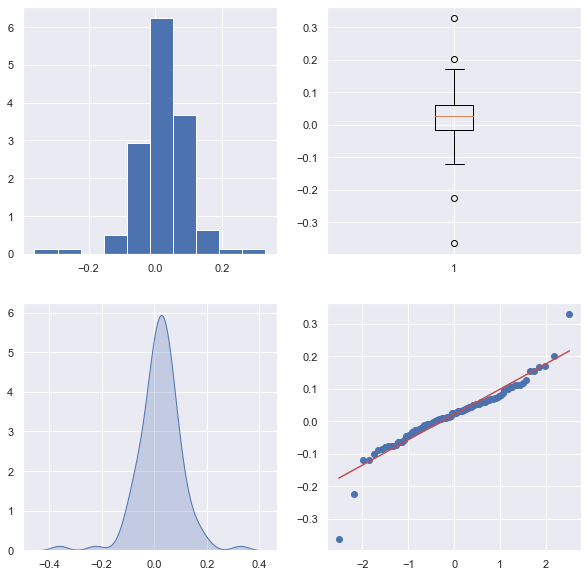

In [45]:
#Meta

import matplotlib.pyplot as plt
from scipy import stats

rendimenti_netti_meta = rendimenti_netti_meta.dropna()

plt.figure(figsize=(10,10))
plt.rc('font', size=10)

#Istogramma
plt.subplot(221)
plt.hist(rendimenti_netti_meta["Adj Close"], density = True)

#BoxPlot
plt.subplot(222)
plt.boxplot(rendimenti_netti_meta["Adj Close"])

#Kernel Density
plt.subplot(223)
sns.kdeplot(rendimenti_netti_meta["Adj Close"], shade=True)
plt.xlabel('') 
plt.ylabel('')

#qq-plot
plt.subplot(224)
stats.probplot(rendimenti_netti_meta["Adj Close"],dist='norm',plot=plt)
plt.title('') 
plt.xlabel('') 
plt.ylabel('')

plt.savefig('Meta.png', dpi=300, bbox_inches='tight')


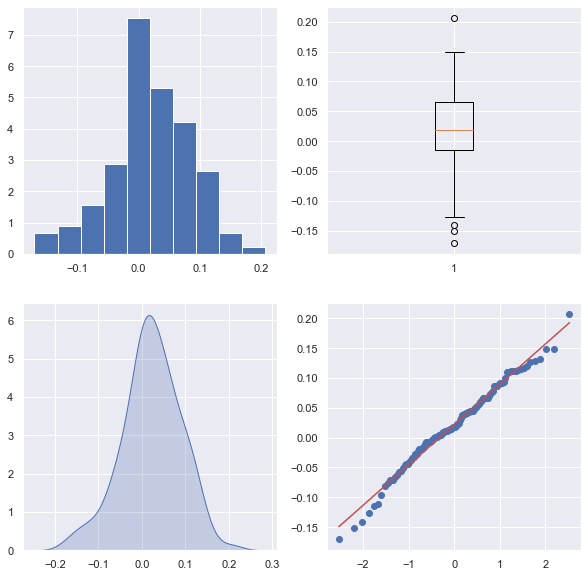

In [46]:
#Apple

rendimenti_netti_apple = rendimenti_netti_apple.dropna()

plt.figure(figsize=(10,10))
plt.rc('font', size=10)

#Istogramma
plt.subplot(221)
plt.hist(rendimenti_netti_apple["Adj Close"], density = True)

#BoxPlot
plt.subplot(222)
plt.boxplot(rendimenti_netti_apple["Adj Close"])

#Kernel Density
plt.subplot(223)
sns.kdeplot(rendimenti_netti_apple["Adj Close"], shade=True)
plt.xlabel('') 
plt.ylabel('')

#qq-plot
plt.subplot(224)
stats.probplot(rendimenti_netti_apple["Adj Close"],dist='norm',plot=plt)
plt.title('') 
plt.xlabel('') 
plt.ylabel('')

plt.savefig('Apple.png', dpi=300, bbox_inches='tight')

[*********************100%***********************]  1 of 1 completed


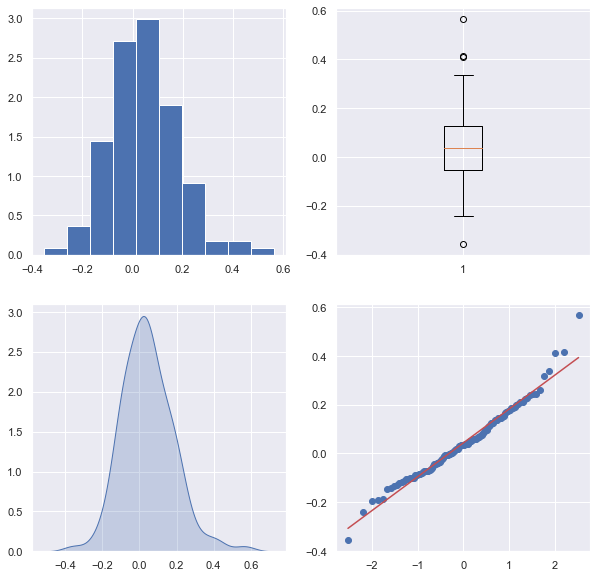

In [47]:
#Tesla
tesla_df = yf.download('TSLA', start='2011-11-30', end='2021-11-30')
tesla_df = tesla_df.groupby(pd.Grouper(freq='M')).mean()

tesla_df = tesla_df[['Adj Close']]
rendimenti_netti_tesla = np.log(tesla_df/tesla_df.shift(1))
rendimenti_netti_tesla = rendimenti_netti_tesla.dropna()

plt.figure(figsize=(10,10))
plt.rc('font', size=10)

#Istogramma
plt.subplot(221)
plt.hist(rendimenti_netti_tesla["Adj Close"], density = True)

#BoxPlot
plt.subplot(222)
plt.boxplot(rendimenti_netti_tesla["Adj Close"])

#Kernel Density
plt.subplot(223)
sns.kdeplot(rendimenti_netti_tesla["Adj Close"], shade=True)
plt.xlabel('') 
plt.ylabel('')

#qq-plot
plt.subplot(224)
stats.probplot(rendimenti_netti_tesla["Adj Close"],dist='norm',plot=plt)
plt.title('') 
plt.xlabel('') 
plt.ylabel('')

plt.savefig('Tesla.png', dpi=300, bbox_inches='tight')

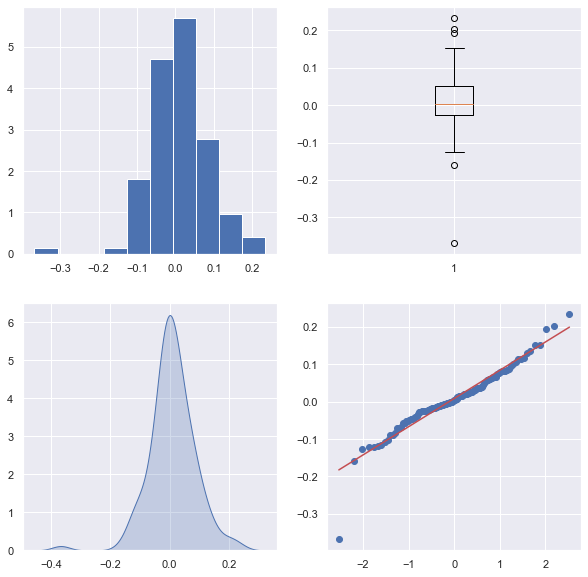

In [48]:
#Ford

rendimenti_netti_ford = rendimenti_netti_ford.dropna()

plt.figure(figsize=(10,10))
plt.rc('font', size=10)

#Istogramma
plt.subplot(221)
plt.hist(rendimenti_netti_ford["Adj Close"], density = True)

#BoxPlot
plt.subplot(222)
plt.boxplot(rendimenti_netti_ford["Adj Close"])

#Kernel Density
plt.subplot(223)
sns.kdeplot(rendimenti_netti_ford["Adj Close"], shade=True)
plt.xlabel('') 
plt.ylabel('')

#qq-plot
plt.subplot(224)
stats.probplot(rendimenti_netti_ford["Adj Close"],dist='norm',plot=plt)
plt.title('') 
plt.xlabel('') 
plt.ylabel('')

plt.savefig('Ford.png', dpi=300, bbox_inches='tight')

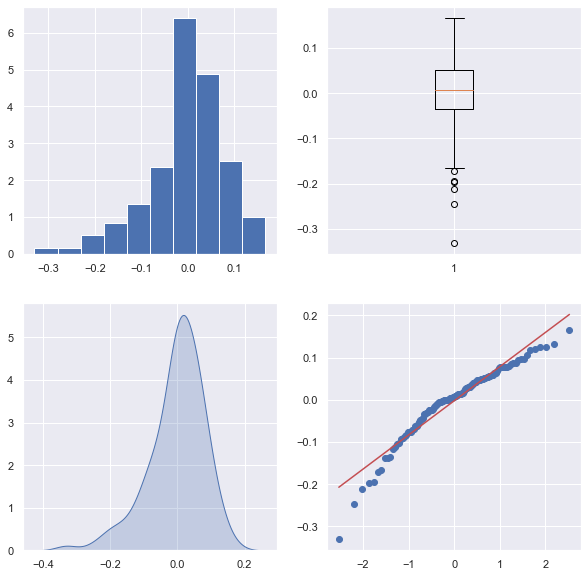

In [49]:
#Viatris

rendimenti_netti_viatris = rendimenti_netti_viatris.dropna()

plt.figure(figsize=(10,10))
plt.rc('font', size=10)

#Istogramma
plt.subplot(221)
plt.hist(rendimenti_netti_viatris["Adj Close"], density = True)

#BoxPlot
plt.subplot(222)
plt.boxplot(rendimenti_netti_viatris["Adj Close"])

#Kernel Density
plt.subplot(223)
sns.kdeplot(rendimenti_netti_viatris["Adj Close"], shade=True)
plt.xlabel('') 
plt.ylabel('')

#qq-plot
plt.subplot(224)
stats.probplot(rendimenti_netti_viatris["Adj Close"],dist='norm',plot=plt)
plt.title('') 
plt.xlabel('') 
plt.ylabel('')

plt.savefig('Viatris.png', dpi=300, bbox_inches='tight')

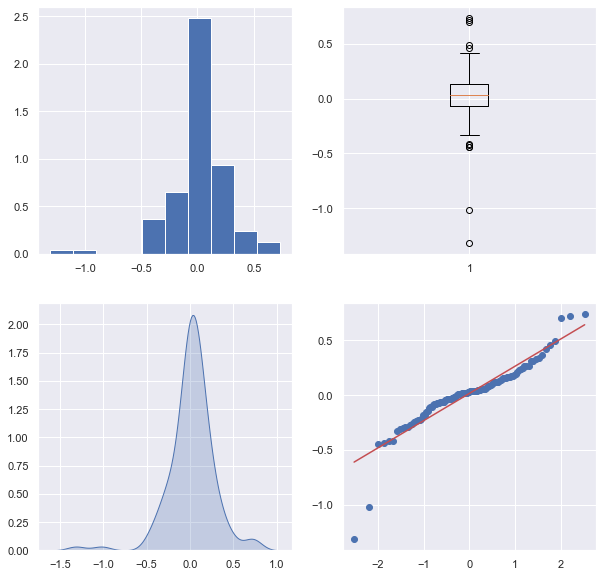

In [50]:
#Nova

rendimenti_netti_nova = rendimenti_netti_nova.dropna()

plt.figure(figsize=(10,10))
plt.rc('font', size=10)

#Istogramma
plt.subplot(221)
plt.hist(rendimenti_netti_nova["Adj Close"], density = True)

#BoxPlot
plt.subplot(222)
plt.boxplot(rendimenti_netti_nova["Adj Close"])

#Kernel Density
plt.subplot(223)
sns.kdeplot(rendimenti_netti_nova["Adj Close"], shade=True)
plt.xlabel('') 
plt.ylabel('')

#qq-plot
plt.subplot(224)
stats.probplot(rendimenti_netti_nova["Adj Close"],dist='norm',plot=plt)
plt.title('') 
plt.xlabel('') 
plt.ylabel('')

plt.savefig('Nova.png', dpi=300, bbox_inches='tight')

_______________________________________________________________________________________________________

e. Calcolare statistiche descrittive univariate (media, varianza, deviazione standard, asimmetria, curtosi)
per ogni serie di rendimenti e commentare.

_______________________________________________________________________________________________________

In [51]:
#Meta
statistiche_meta = pd.DataFrame()

media = round(rendimenti_netti_meta.mean(), 4)
varianza = round(rendimenti_netti_meta.var(), 4)
deviazione_standard = round(rendimenti_netti_meta.std(), 4)
asimmetria = round(rendimenti_netti_meta.skew(), 4)
kurtosi = round(rendimenti_netti_meta.kurtosis(), 4)
statistiche_meta["Media_Meta"] = media
statistiche_meta["Varianza_Meta"] = varianza
statistiche_meta["Deviazione_Meta"] = deviazione_standard
statistiche_meta["Asimmetria_Meta"] = asimmetria
statistiche_meta["Kurtosi_Meta"] = kurtosi
statistiche_meta


,Media_Meta,Varianza_Meta,Deviazione_Meta,Asimmetria_Meta,Kurtosi_Meta
Adj Close,0.0207,0.0065,0.0807,-0.5917,5.5871


In [52]:
#Apple
statistiche_apple = pd.DataFrame()

media = round(rendimenti_netti_apple.mean(), 4)
varianza = round(rendimenti_netti_apple.var(), 4)
deviazione_standard = round(rendimenti_netti_apple.std(), 4)
asimmetria = round(rendimenti_netti_apple.skew(), 4)
kurtosi = round(rendimenti_netti_apple.kurtosis(), 4)
statistiche_apple["Media_Apple"] = media
statistiche_apple["Varianza_Apple"] = varianza
statistiche_apple["Deviazione_Apple"] = deviazione_standard
statistiche_apple["Asimmetria_Apple"] = asimmetria
statistiche_apple["Kurtosi_Apple"] = kurtosi
statistiche_apple

,Media_Apple,Varianza_Apple,Deviazione_Apple,Asimmetria_Apple,Kurtosi_Apple
Adj Close,0.0216,0.0045,0.0672,-0.274,0.3757


In [53]:
#Tesla
statistiche_tesla = pd.DataFrame()

media = round(rendimenti_netti_tesla.mean(), 4)
varianza = round(rendimenti_netti_tesla.var(), 4)
deviazione_standard = round(rendimenti_netti_tesla.std(), 4)
asimmetria = round(rendimenti_netti_tesla.skew(), 4)
kurtosi = round(rendimenti_netti_tesla.kurtosis(), 4)
statistiche_tesla["Media_Tesla"] = media
statistiche_tesla["Varianza_Tesla"] = varianza
statistiche_tesla["Deviazione_Tesla"] = deviazione_standard
statistiche_tesla["Asimmetria_Tesla"] = asimmetria
statistiche_tesla["Kurtosi_Tesla"] = kurtosi
statistiche_tesla

,Media_Tesla,Varianza_Tesla,Deviazione_Tesla,Asimmetria_Tesla,Kurtosi_Tesla
Adj Close,0.043,0.0193,0.1389,0.5694,1.5031


In [54]:
#Ford
statistiche_ford = pd.DataFrame()

media = round(rendimenti_netti_ford.mean(), 4)
varianza = round(rendimenti_netti_ford.var(), 4)
deviazione_standard = round(rendimenti_netti_ford.std(), 4)
asimmetria = round(rendimenti_netti_ford.skew(), 4)
kurtosi = round(rendimenti_netti_ford.kurtosis(), 4)
statistiche_ford["Media_Ford"] = media
statistiche_ford["Varianza_Ford"] = varianza
statistiche_ford["Deviazione_Ford"] = deviazione_standard
statistiche_ford["Asimmetria_Ford"] = asimmetria
statistiche_ford["Kurtosi_Ford"] = kurtosi
statistiche_ford

,Media_Ford,Varianza_Ford,Deviazione_Ford,Asimmetria_Ford,Kurtosi_Ford
Adj Close,0.0086,0.006,0.0773,-0.5994,4.4455


In [55]:
#Nova
statistiche_nova = pd.DataFrame()

media = round(rendimenti_netti_nova.mean(), 4)
varianza = round(rendimenti_netti_nova.var(), 4)
deviazione_standard = round(rendimenti_netti_nova.std(), 4)
asimmetria = round(rendimenti_netti_nova.skew(), 4)
kurtosi = round(rendimenti_netti_nova.kurtosis(), 4)
statistiche_nova["Media_Nova"] = media
statistiche_nova["Varianza_Nova"] = varianza
statistiche_nova["Deviazione_Nova"] = deviazione_standard
statistiche_nova["Asimmetria_Nova"] = asimmetria
statistiche_nova["Kurtosi_Nova"] = kurtosi
statistiche_nova

,Media_Nova,Varianza_Nova,Deviazione_Nova,Asimmetria_Nova,Kurtosi_Nova
Adj Close,0.0162,0.0691,0.2629,-1.1915,7.0136


In [56]:
#Viatris
statistiche_viatris = pd.DataFrame()

media = round(rendimenti_netti_viatris.mean(), 4)
varianza = round(rendimenti_netti_viatris.var(), 4)
deviazione_standard = round(rendimenti_netti_viatris.std(), 4)
asimmetria = round(rendimenti_netti_viatris.skew(), 4)
kurtosi = round(rendimenti_netti_viatris.kurtosis(), 4)
statistiche_viatris["Media_Viatris"] = media
statistiche_viatris["Varianza_Viatris"] = varianza
statistiche_viatris["Deviazione_Viatris"] = deviazione_standard
statistiche_viatris["Asimmetria_Viatris"] = asimmetria
statistiche_viatris["Kurtosi_Viatris"] = kurtosi
statistiche_viatris

,Media_Viatris,Varianza_Viatris,Deviazione_Viatris,Asimmetria_Viatris,Kurtosi_Viatris
Adj Close,-0.0026,0.0068,0.0826,-1.077,1.927


_______________________________________________________________________________________________________

Come si evolvono nel tempo rendimento e volatilità?

_______________________________________________________________________________________________________

[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'Meta volatility: 36.44%')

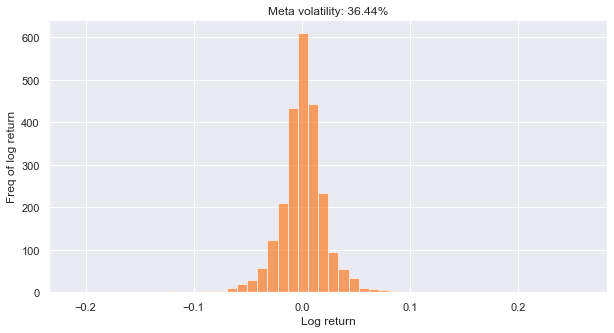

In [57]:
#Meta
color1 = cmap(0.8)

meta_df = yf.download('FB', start='2011-11-30', end='2021-11-30')
meta_daily_returns = meta_df[['Adj Close']]
rendimenti_netti_meta = np.log(meta_daily_returns['Adj Close']/meta_daily_returns['Adj Close'].shift(1))

volatility = rendimenti_netti_meta.std()*252**.5
str_vol = str(round(volatility, 4)*100)

fig, ax = plt.subplots()
rendimenti_netti_meta.hist(ax=ax, bins=50, alpha=0.6, color=color1)
ax.set_xlabel('Log return')
ax.set_ylabel('Freq of log return')
ax.set_title('Meta volatility: ' + str_vol + '%')

[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'Apple volatility: 28.310000000000002%')

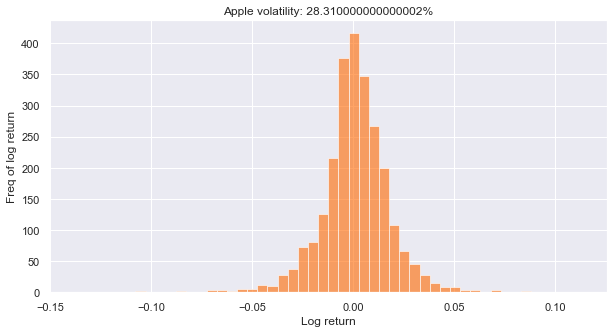

In [58]:
#Apple
color1 = cmap(0.8)

apple_df = yf.download('AAPL', start='2011-11-30', end='2021-11-30')
apple_daily_returns = apple_df[['Adj Close']]
rendimenti_netti_apple = np.log(apple_daily_returns['Adj Close']/apple_daily_returns['Adj Close'].shift(1))

volatility = rendimenti_netti_apple.std()*252**.5
str_vol = str(round(volatility, 4)*100)

fig, ax = plt.subplots()
rendimenti_netti_apple.hist(ax=ax, bins=50, alpha=0.6, color=color1)
ax.set_xlabel('Log return')
ax.set_ylabel('Freq of log return')
ax.set_title('Apple volatility: ' + str_vol + '%')

[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'Tesla volatility: 55.31%')

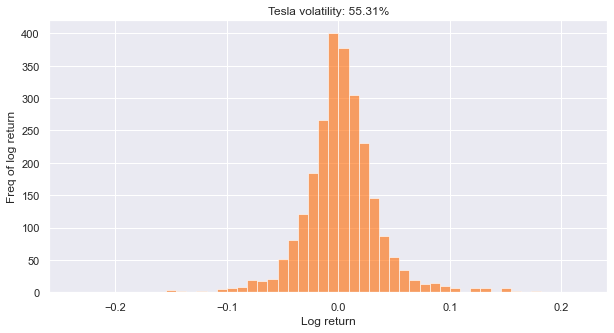

In [59]:
#Tesla
color1 = cmap(0.8)

tesla_df = yf.download('TSLA', start='2011-11-30', end='2021-11-30')
tesla_daily_returns = tesla_df[['Adj Close']]
rendimenti_netti_tesla = np.log(tesla_daily_returns['Adj Close']/tesla_daily_returns['Adj Close'].shift(1))

volatility = rendimenti_netti_tesla.std()*252**.5
str_vol = str(round(volatility, 4)*100)

fig, ax = plt.subplots()
rendimenti_netti_tesla.hist(ax=ax, bins=50, alpha=0.6, color=color1)
ax.set_xlabel('Log return')
ax.set_ylabel('Freq of log return')
ax.set_title('Tesla volatility: ' + str_vol + '%')

[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'Ford volatility: 30.7%')

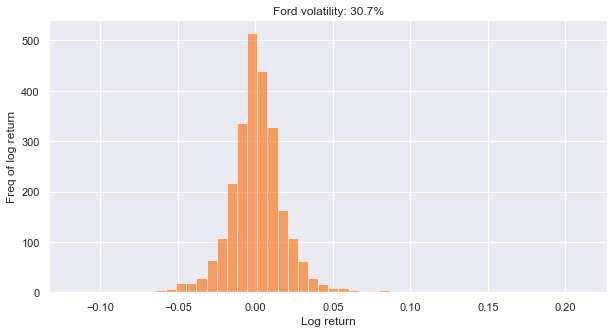

In [60]:
#Ford
color1 = cmap(0.8)

ford_df = yf.download('F', start='2011-11-30', end='2021-11-30')
ford_daily_returns = ford_df[['Adj Close']]
rendimenti_netti_ford = np.log(ford_daily_returns['Adj Close']/ford_daily_returns['Adj Close'].shift(1))

volatility = rendimenti_netti_ford.std()*252**.5
str_vol = str(round(volatility, 4)*100)

fig, ax = plt.subplots()
rendimenti_netti_ford.hist(ax=ax, bins=50, alpha=0.6, color=color1)
ax.set_xlabel('Log return')
ax.set_ylabel('Freq of log return')
ax.set_title('Ford volatility: ' + str_vol + '%')

[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'Nova volatility: 111.64%')

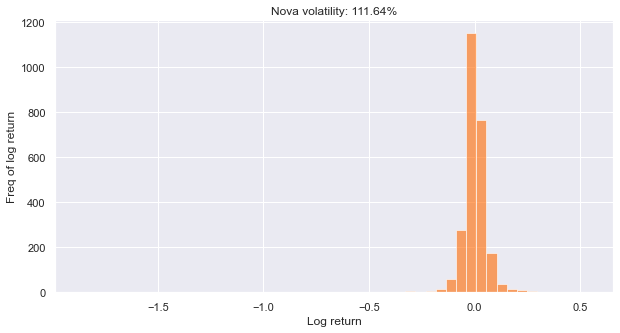

In [61]:
#Nova
color1 = cmap(0.8)

nova_df = yf.download('NVAX', start='2011-11-30', end='2021-11-30')
nova_daily_returns = nova_df[['Adj Close']]
rendimenti_netti_nova = np.log(nova_daily_returns['Adj Close']/nova_daily_returns['Adj Close'].shift(1))

volatility = rendimenti_netti_nova.std()*252**.5
str_vol = str(round(volatility, 4)*100)

fig, ax = plt.subplots()
rendimenti_netti_nova.hist(ax=ax, bins=50, alpha=0.6, color=color1)
ax.set_xlabel('Log return')
ax.set_ylabel('Freq of log return')
ax.set_title('Nova volatility: ' + str_vol + '%')

[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'Viatris volatility: 36.11%')

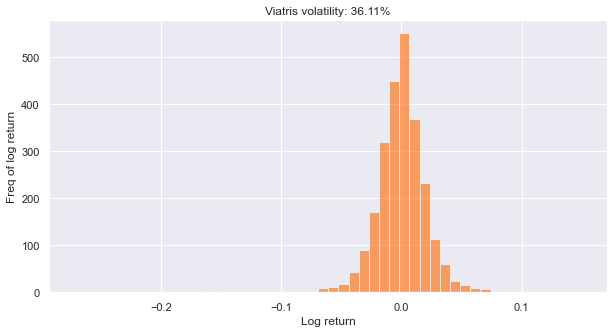

In [62]:
#Viatris
color1 = cmap(0.8)

viatris_df = yf.download('VTRS', start='2011-11-30', end='2021-11-30')
viatris_daily_returns = viatris_df[['Adj Close']]
rendimenti_netti_viatris = np.log(viatris_daily_returns['Adj Close']/viatris_daily_returns['Adj Close'].shift(1))

volatility = rendimenti_netti_viatris.std()*252**.5
str_vol = str(round(volatility, 4)*100)

fig, ax = plt.subplots()
rendimenti_netti_viatris.hist(ax=ax, bins=50, alpha=0.6, color=color1)
ax.set_xlabel('Log return')
ax.set_ylabel('Freq of log return')
ax.set_title('Viatris volatility: ' + str_vol + '%')

_______________________________________________________________________________________________________

Calcolare la matrice di varianze/covarianze dei rendimenti e commentare le relazioni fra 
i diversi titoli. Qual é più rischioso?

_______________________________________________________________________________________________________

In [63]:
df_together = yf.download('FB AAPL TSLA F NVAX VTRS', start='2011-11-30', end='2021-11-30')
returns = 100 * df_together['Adj Close'].pct_change().dropna()
returns.cov()

[*********************100%***********************]  6 of 6 completed


,AAPL,F,FB,NVAX,TSLA,VTRS
AAPL,3.166744,1.063645,1.654644,1.544614,1.984807,1.028852
F,1.063645,3.807044,1.032427,1.248995,1.750484,1.291186
FB,1.654644,1.032427,5.347862,2.030755,2.093348,1.023504
NVAX,1.544614,1.248995,2.030755,40.417929,2.733074,1.710530
TSLA,1.984807,1.750484,2.093348,2.733074,12.220001,1.474117
VTRS,1.028852,1.291186,1.023504,1.710530,1.474117,5.207252


_______________________________________________________________________________________________________

Calcolare la matrice di correlazione dei rendimenti.

_______________________________________________________________________________________________________

In [64]:
returns.corr()

,AAPL,F,FB,NVAX,TSLA,VTRS
AAPL,1.000000,0.306335,0.402076,0.136529,0.319063,0.253362
F,0.306335,1.000000,0.228810,0.100688,0.256643,0.289995
FB,0.402076,0.228810,1.000000,0.138128,0.258950,0.193952
NVAX,0.136529,0.100688,0.138128,1.000000,0.122978,0.117907
TSLA,0.319063,0.256643,0.258950,0.122978,1.000000,0.184796
VTRS,0.253362,0.289995,0.193952,0.117907,0.184796,1.000000


_______________________________________________________________________________________________________

Fare il grafico dell’andamento nel tempo delle correlazioni fra i titoli e i grafici di 
dispersione (scatter plots) delle correlazioni medie.

_______________________________________________________________________________________________________

In [65]:
#Meta Apple
data_df = yf.download('FB AAPL', start='2011-11-30', end='2021-11-30')
data_df_monthly = data_df.groupby(pd.Grouper(freq='M')).mean()

data_df = data_df['Adj Close']
returns = data_df.pct_change()
returns = returns.dropna()

data_df_monthly = data_df_monthly['Adj Close']
returns_monthly = data_df_monthly.pct_change()
returns_monthly = returns_monthly.dropna()
returns_monthly.loc['2020-01-01':'2021-01-01']

[*********************100%***********************]  2 of 2 completed


,AAPL,FB
Date,,
2020-01-31,0.127983,0.072747
2020-02-29,-0.000212,-0.042180
2020-03-31,-0.156431,-0.201236
2020-04-30,0.037883,0.067908
2020-05-31,0.140380,0.223418
2020-06-30,0.116278,0.071565
2020-07-31,0.105431,0.030879
2020-08-31,0.229234,0.123631
2020-09-30,-0.018221,-0.008311


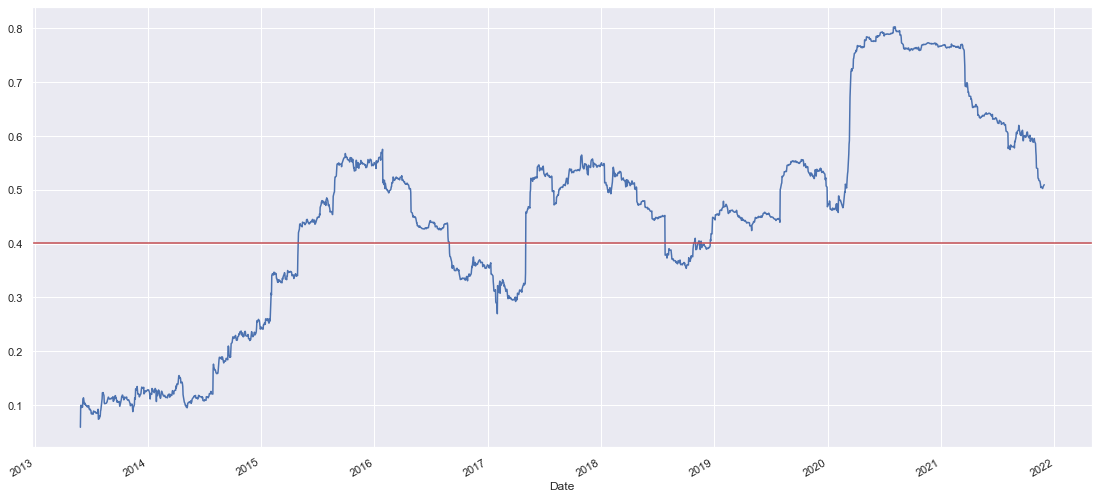

In [66]:
ax = returns['AAPL'].rolling(255).corr(returns['FB']).plot(figsize=(19,9))
ax.axhline(returns.corr().iloc[0,1], c='r')

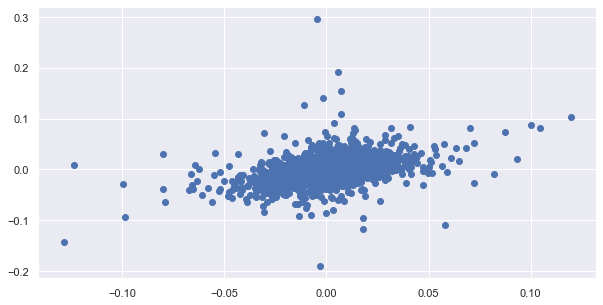

In [67]:
plt.scatter(returns['AAPL'],returns['FB'])
plt.show()

In [68]:
#Ford Tesla
data_df = yf.download('F TSLA', start='2011-11-30', end='2021-11-30')
data_df_monthly = data_df.groupby(pd.Grouper(freq='M')).mean()

data_df = data_df['Adj Close']
returns = data_df.pct_change()
returns = returns.dropna()

data_df_monthly = data_df_monthly['Adj Close']
returns_monthly = data_df_monthly.pct_change()
returns_monthly = returns_monthly.dropna()
returns_monthly.loc['2020-01-01':'2021-01-01']

[*********************100%***********************]  2 of 2 completed


,F,TSLA
Date,,
2020-01-31,-0.009427,0.399699
2020-02-29,-0.113928,0.508433
2020-03-31,-0.307438,-0.298886
2020-04-30,-0.108718,0.186902
2020-05-31,0.068184,0.204682
2020-06-30,0.213764,0.205293
2020-07-31,0.021725,0.515389
2020-08-31,0.062299,0.232962
2020-09-30,-0.006463,0.148407


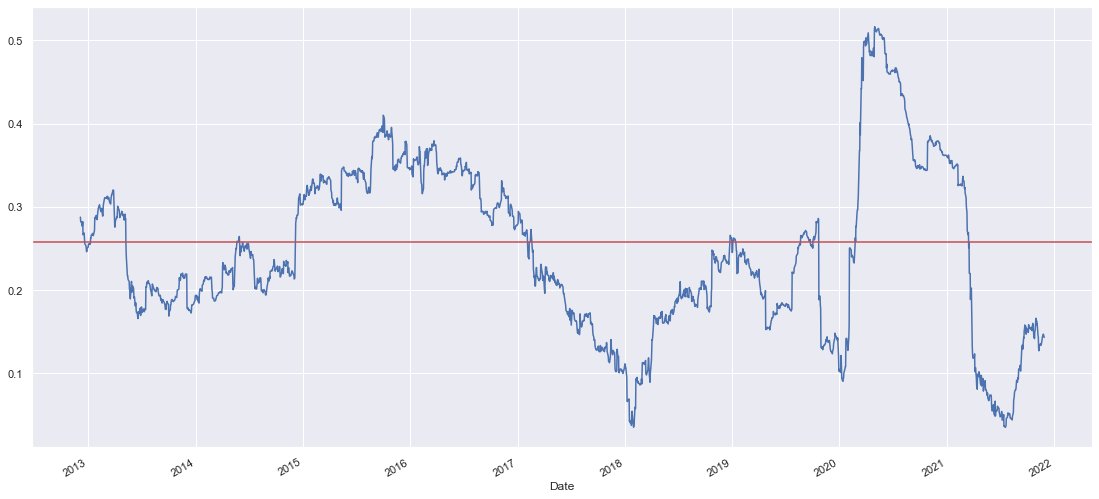

In [69]:
ax = returns['F'].rolling(255).corr(returns['TSLA']).plot(figsize=(19,9))
ax.axhline(returns.corr().iloc[0,1], c='r')

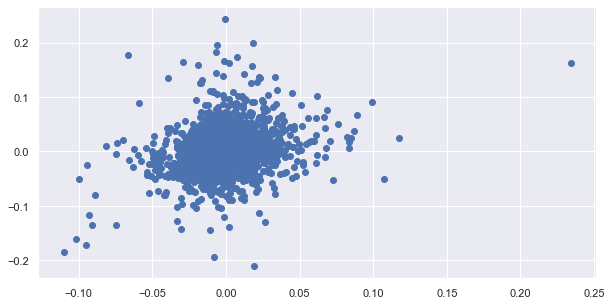

In [70]:
plt.scatter(returns['F'],returns['TSLA'])
plt.show()

In [71]:
#Novavax Viatris
data_df = yf.download('NVAX VTRS', start='2011-11-30', end='2021-11-30')
data_df_monthly = data_df.groupby(pd.Grouper(freq='M')).mean()

data_df = data_df['Adj Close']
returns = data_df.pct_change()
returns = returns.dropna()

data_df_monthly = data_df_monthly['Adj Close']
returns_monthly = data_df_monthly.pct_change()
returns_monthly = returns_monthly.dropna()
returns_monthly.loc['2016-01-01':'2017-01-01']

[*********************100%***********************]  2 of 2 completed


,NVAX,VTRS
Date,,
2016-01-31,-0.235071,-0.032239
2016-02-29,-0.253644,-0.073699
2016-03-31,0.055152,-0.033627
2016-04-30,0.085792,0.009742
2016-05-31,-0.073366,-0.109177
2016-06-30,0.311130,0.079892
2016-07-31,0.124503,0.015856
2016-08-31,-0.030681,0.031277
2016-09-30,-0.356203,-0.128363


In [72]:
returns_monthly.loc['2019-01-01':'2021-01-01']

,NVAX,VTRS
Date,,
2019-01-31,0.029745,-0.002753
2019-02-28,-0.034761,0.053035
2019-03-31,-0.731073,-0.088397
2019-04-30,-0.019625,-0.028621
2019-05-31,-0.357156,-0.218044
2019-06-30,-0.211463,-0.157782
2019-07-31,-0.139010,0.070981
2019-08-31,0.185971,-0.005418
2019-09-30,0.064602,0.092142


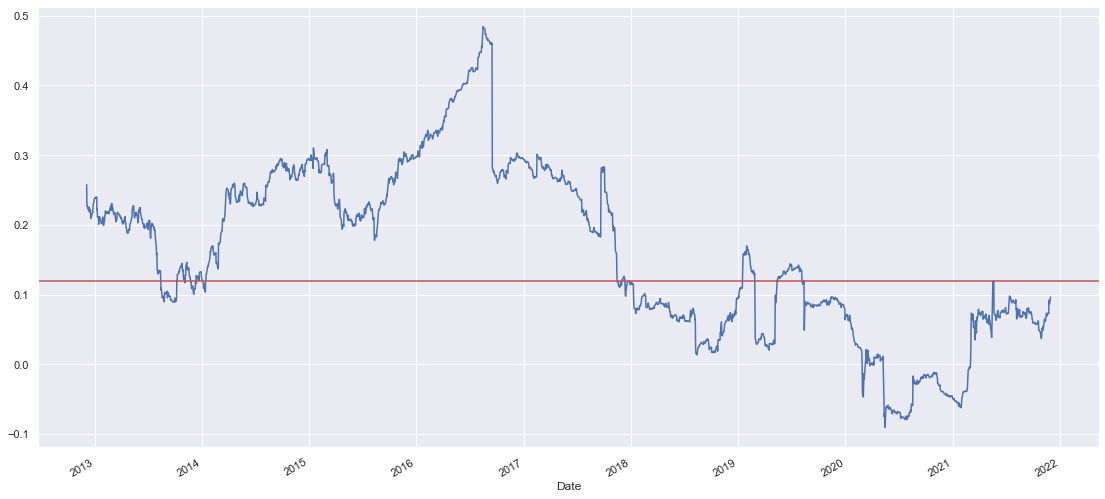

In [73]:
ax = returns['NVAX'].rolling(255).corr(returns['VTRS']).plot(figsize=(19,9))
ax.axhline(returns.corr().iloc[0,1], c='r')

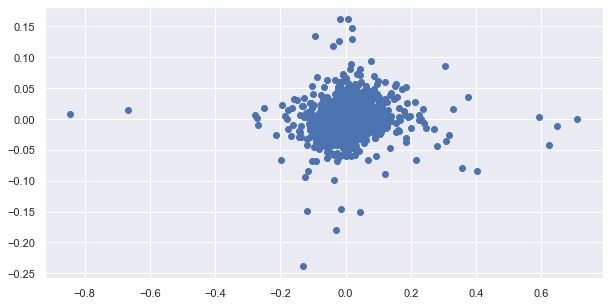

In [74]:
plt.scatter(returns['NVAX'],returns['VTRS'])
plt.show()

______________________________________________________________________________________________

3. Analisi di Previsione (LSTM)

In [322]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
from sklearn.preprocessing import MinMaxScaler

In [324]:
#DataFrame da utilizzare all'ultimo punto
close_predetta = pd.DataFrame()

______________________________________________________________________________________________

In [325]:
meta_df = yf.download('FB', start='2011-11-30', end='2021-11-30')
meta_df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200


In [326]:
#Numero righe e colonne nel dataset
meta_df.shape

(2399, 6)

In [327]:
#Creiamo un nuovo dataframe con solo la cononna 'Adj Close'
data = meta_df.filter(['Close'])
#Conversione del dataframe in un array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

1920

In [328]:
#Scale the data (good practice before present the data to neural network input)
scaler = MinMaxScaler(feature_range=(0,1))
dataset = dataset.reshape(-1,1)
scaled_data = scaler.fit_transform(dataset)
scaled_data


array([[0.05624914],
       [0.04472493],
       [0.03641103],
       ...,
       [0.88717246],
       [0.8653862 ],
       [0.87885857]])

In [329]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0: training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [330]:
#Convert the x_train and y_train to arrays
x_train,  y_train = np.array(x_train), np.array(y_train)
len(x_train)

1860

In [207]:
len(y_train)

1860

In [208]:
training_data_len

1920

In [331]:
#Reshape the data (l'algoritmo si aspetta 3 dimension data)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [210]:
x_train.shape

(1860, 60, 1)

In [332]:
#Build the LSTM Model
model = Sequential() #numbers of neurons
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [333]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [334]:
#Train the module
model.fit(x_train, y_train, batch_size=1, epochs=1)

1860/1860 [==============================] - 76s 38ms/step - loss: 5.7327e-04


In [335]:
#Create the testing data_set
#Create a new array containing scaled values
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :] #All the values we want the module to predict
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [336]:
#Convert the data to array
x_test = np.array(x_test)

In [337]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [217]:
y_test.shape

(479, 1)

In [218]:
x_test.shape

(479, 60, 1)

In [338]:
#Get the module predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) #unscaling the values

In [339]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse  #Un valore di 0 indica che la prediction era perfetta/identica

0.07937631626965358

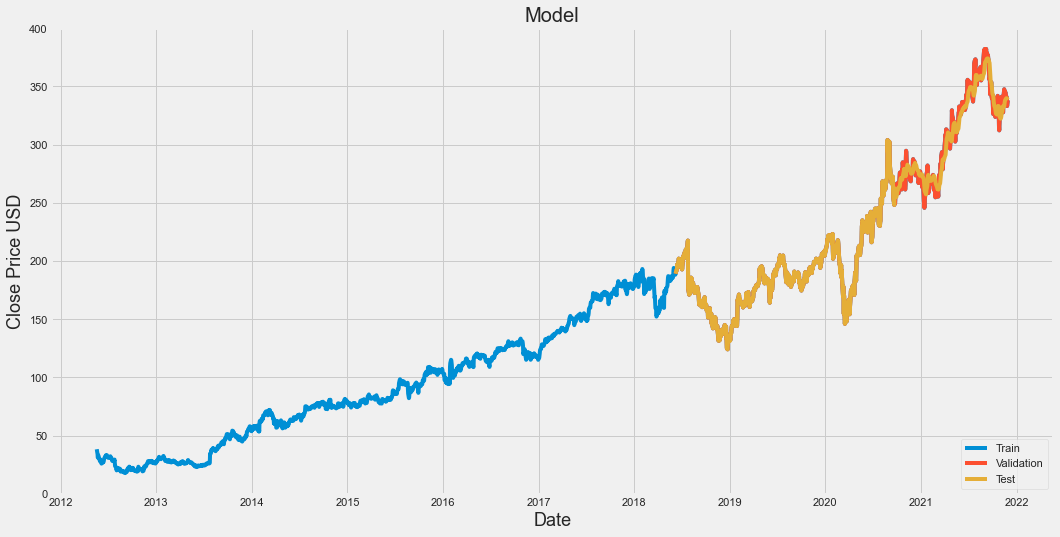

In [340]:
#Plot the data
train = data[:30*80] #train dataset ultimi 80 mesi
test = data[training_data_len - 397:] #test dataset ultimi 30 mesi 
predict = pd.DataFrame()
predict['Validation'] = test

support = pd.DataFrame(predictions, columns = ['Validation2'])
predict['Validation'].iloc[len(test)-300:] = support['Validation2'].iloc[len(predictions)-300:]
#validation ultimi 10 mesi

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.plot(train['Close'])
plt.plot(test['Close'])
plt.plot(predict)
plt.legend(['Train', 'Validation', 'Test'], loc='lower right')
plt.show()

In [341]:
combination = pd.DataFrame()
combination['Close Esatta'] = test[600:900]
combination['Close Predetta'] = predict[600:900]
close_predetta['Meta Close'] = combination['Close Predetta'];
combination

,Close Esatta,Close Predetta
Date,,
2020-10-26,277.109985,275.295380
2020-10-27,283.290009,276.976746
2020-10-28,267.670013,278.867310
2020-10-29,280.829987,278.595032
2020-10-30,263.109985,279.089752
...,...,...
2021-11-22,341.010010,339.411469
2021-11-23,337.250000,339.882385
2021-11-24,341.059998,339.600494


________________________________________________________________________________________________

APPLE

________________________________________________________________________________________________

In [342]:
apple_df = yf.download('AAPL', start='2011-11-30', end='2021-11-30')

#Creiamo un nuovo dataframe con solo la cononna 'Adj Close'
data = apple_df.filter(['Close'])
#Conversione del dataframe in un array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)

#Scale the data (good practice before present the data to neural network input)
scaler = MinMaxScaler(feature_range=(0,1))
dataset = dataset.reshape(-1,1)
scaled_data = scaler.fit_transform(dataset)

#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0: training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

#Convert the x_train and y_train to arrays
x_train,  y_train = np.array(x_train), np.array(y_train)

#Reshape the data (l'algoritmo si aspetta 3 dimension data)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

#Build the LSTM Model
model = Sequential() #numbers of neurons
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

[*********************100%***********************]  1 of 1 completed


In [343]:
#Train the module
model.fit(x_train, y_train, batch_size=1, epochs=1)

1954/1954 [==============================] - 74s 36ms/step - loss: 1.9526e-04


In [344]:
#Create the testing data_set
#Create a new array containing scaled values
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :] #All the values we want the module to predict
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

#Convert the data to array
x_test = np.array(x_test)

#Get the module predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) #unscaling the values

In [345]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse  #Un valore di 0 indica che la prediction era perfetta/identica

5.107673364415557

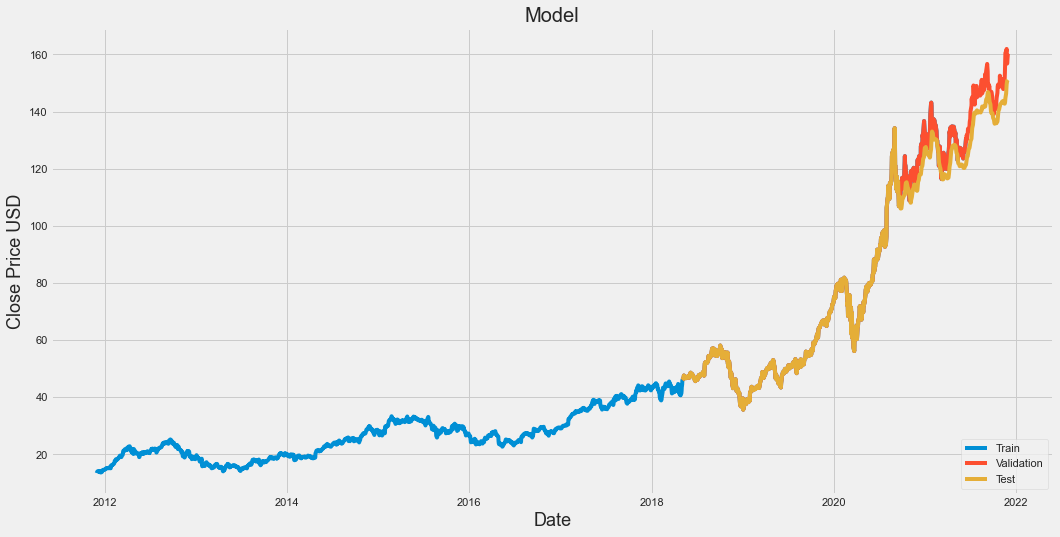

In [346]:
#Plot the data
train = data[:30*80] #train dataset ultimi 80 mesi
test = data[training_data_len - 397:] #test dataset ultimi 30 mesi 
predict = pd.DataFrame()
predict['Validation'] = test

support = pd.DataFrame(predictions, columns = ['Validation2'])
predict['Validation'].iloc[len(test)-300:] = support['Validation2'].iloc[len(predictions)-300:]
#validation ultimi 10 mesi

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.plot(train['Close'])
plt.plot(test['Close'])
plt.plot(predict)
plt.legend(['Train', 'Validation', 'Test'], loc='lower right')
plt.show()

In [347]:
combination = pd.DataFrame()
combination['Close Esatta'] = test[600:900]
combination['Close Predetta'] = predict[600:900]
close_predetta['Apple Close'] = combination['Close Predetta'];
combination

,Close Esatta,Close Predetta
Date,,
2020-09-22,111.809998,107.698776
2020-09-23,107.120003,107.311989
2020-09-24,108.220001,106.598740
2020-09-25,112.279999,106.012131
2020-09-28,114.959999,106.069756
...,...,...
2021-11-22,161.020004,146.326599
2021-11-23,161.410004,147.990173
2021-11-24,161.940002,149.488724


________________________________________________________________________________________________

TESLA

________________________________________________________________________________________________

In [349]:
tesla_df = yf.download('TSLA', start='2011-11-30', end='2021-11-30')

#Creiamo un nuovo dataframe con solo la cononna 'Adj Close'
data = tesla_df.filter(['Close'])
#Conversione del dataframe in un array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)

#Scale the data (good practice before present the data to neural network input)
scaler = MinMaxScaler(feature_range=(0,1))
dataset = dataset.reshape(-1,1)
scaled_data = scaler.fit_transform(dataset)

#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0: training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

#Convert the x_train and y_train to arrays
x_train,  y_train = np.array(x_train), np.array(y_train)

#Reshape the data (l'algoritmo si aspetta 3 dimension data)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

#Build the LSTM Model
model = Sequential() #numbers of neurons
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

[*********************100%***********************]  1 of 1 completed


In [350]:
#Train the module
model.fit(x_train, y_train, batch_size=1, epochs=1)

1954/1954 [==============================] - 83s 41ms/step - loss: 2.0879e-05


In [351]:
#Create the testing data_set
#Create a new array containing scaled values
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :] #All the values we want the module to predict
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

#Convert the data to array
x_test = np.array(x_test)

#Get the module predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) #unscaling the values

In [352]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse  #Un valore di 0 indica che la prediction era perfetta/identica

11.956237595787579

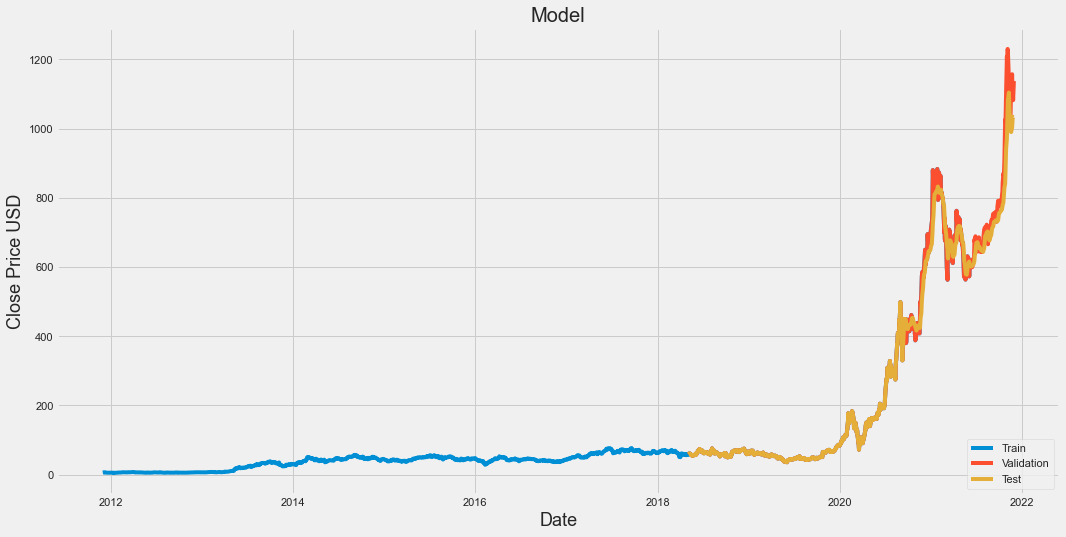

In [353]:
#Plot the data
train = data[:30*80] #train dataset ultimi 80 mesi
test = data[training_data_len - 397:] #test dataset ultimi 30 mesi 
predict = pd.DataFrame()
predict['Validation'] = test

support = pd.DataFrame(predictions, columns = ['Validation2'])
predict['Validation'].iloc[len(test)-300:] = support['Validation2'].iloc[len(predictions)-300:]
#validation ultimi 10 mesi

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.plot(train['Close'])
plt.plot(test['Close'])
plt.plot(predict)
plt.legend(['Train', 'Validation', 'Test'], loc='lower right')
plt.show()

In [354]:
combination = pd.DataFrame()
combination['Close Esatta'] = test[600:900]
combination['Close Predetta'] = predict[600:900]
close_predetta['Tesla Close'] = combination['Close Predetta'];
combination

,Close Esatta,Close Predetta
Date,,
2020-09-22,424.230011,438.141693
2020-09-23,380.359985,441.293457
2020-09-24,387.790009,435.378143
2020-09-25,407.339996,427.056641
2020-09-28,421.200012,421.564575
...,...,...
2021-11-22,1156.869995,1003.848694
2021-11-23,1109.030029,1018.745300
2021-11-24,1116.000000,1027.785645


________________________________________________________________________________________________

FORD

________________________________________________________________________________________________

In [355]:
ford_df = yf.download('F', start='2011-11-30', end='2021-11-30')

#Creiamo un nuovo dataframe con solo la cononna 'Adj Close'
data = ford_df.filter(['Close'])
#Conversione del dataframe in un array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)

#Scale the data (good practice before present the data to neural network input)
scaler = MinMaxScaler(feature_range=(0,1))
dataset = dataset.reshape(-1,1)
scaled_data = scaler.fit_transform(dataset)

#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0: training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

#Convert the x_train and y_train to arrays
x_train,  y_train = np.array(x_train), np.array(y_train)

#Reshape the data (l'algoritmo si aspetta 3 dimension data)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

#Build the LSTM Model
model = Sequential() #numbers of neurons
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

[*********************100%***********************]  1 of 1 completed


In [356]:
#Train the module
model.fit(x_train, y_train, batch_size=1, epochs=1)

1954/1954 [==============================] - 85s 41ms/step - loss: 0.0017


In [357]:
#Create the testing data_set
#Create a new array containing scaled values
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :] #All the values we want the module to predict
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

#Convert the data to array
x_test = np.array(x_test)

#Get the module predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) #unscaling the values

In [358]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse  #Un valore di 0 indica che la prediction era perfetta/identica

0.7528488138323987

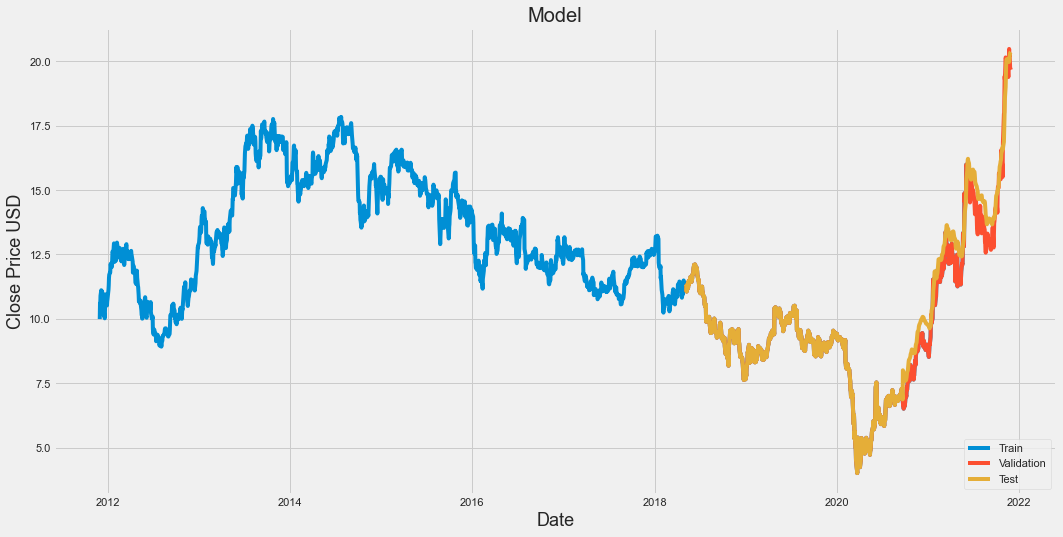

In [359]:
#Plot the data
train = data[:30*80] #train dataset ultimi 80 mesi
test = data[training_data_len - 397:] #test dataset ultimi 30 mesi 
predict = pd.DataFrame()
predict['Validation'] = test

support = pd.DataFrame(predictions, columns = ['Validation2'])
predict['Validation'].iloc[len(test)-300:] = support['Validation2'].iloc[len(predictions)-300:]
#validation ultimi 10 mesi

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.plot(train['Close'])
plt.plot(test['Close'])
plt.plot(predict)
plt.legend(['Train', 'Validation', 'Test'], loc='lower right')
plt.show()

In [360]:
combination = pd.DataFrame()
combination['Close Esatta'] = test[600:900]
combination['Close Predetta'] = predict[600:900]
close_predetta['Ford Close'] = combination['Close Predetta'];
combination

,Close Esatta,Close Predetta
Date,,
2020-09-22,6.780000,8.001272
2020-09-23,6.640000,7.959511
2020-09-24,6.660000,7.887243
2020-09-25,6.510000,7.810634
2020-09-28,6.690000,7.724533
...,...,...
2021-11-22,20.480000,19.974321
2021-11-23,20.200001,20.078621
2021-11-24,20.250000,20.201889


________________________________________________________________________________________________

VIATRIS

________________________________________________________________________________________________

In [361]:
viatris_df = yf.download('VTRS', start='2011-11-30', end='2021-11-30')

#Creiamo un nuovo dataframe con solo la cononna 'Adj Close'
data = viatris_df.filter(['Close'])
#Conversione del dataframe in un array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)

#Scale the data (good practice before present the data to neural network input)
scaler = MinMaxScaler(feature_range=(0,1))
dataset = dataset.reshape(-1,1)
scaled_data = scaler.fit_transform(dataset)

#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0: training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

#Convert the x_train and y_train to arrays
x_train,  y_train = np.array(x_train), np.array(y_train)

#Reshape the data (l'algoritmo si aspetta 3 dimension data)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

#Build the LSTM Model
model = Sequential() #numbers of neurons
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

[*********************100%***********************]  1 of 1 completed


In [362]:
#Train the module
model.fit(x_train, y_train, batch_size=1, epochs=1)

1954/1954 [==============================] - 81s 39ms/step - loss: 0.0018


In [363]:
#Create the testing data_set
#Create a new array containing scaled values
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :] #All the values we want the module to predict
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

#Convert the data to array
x_test = np.array(x_test)

#Get the module predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) #unscaling the values

In [364]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse  #Un valore di 0 indica che la prediction era perfetta/identica

0.40169552638089917

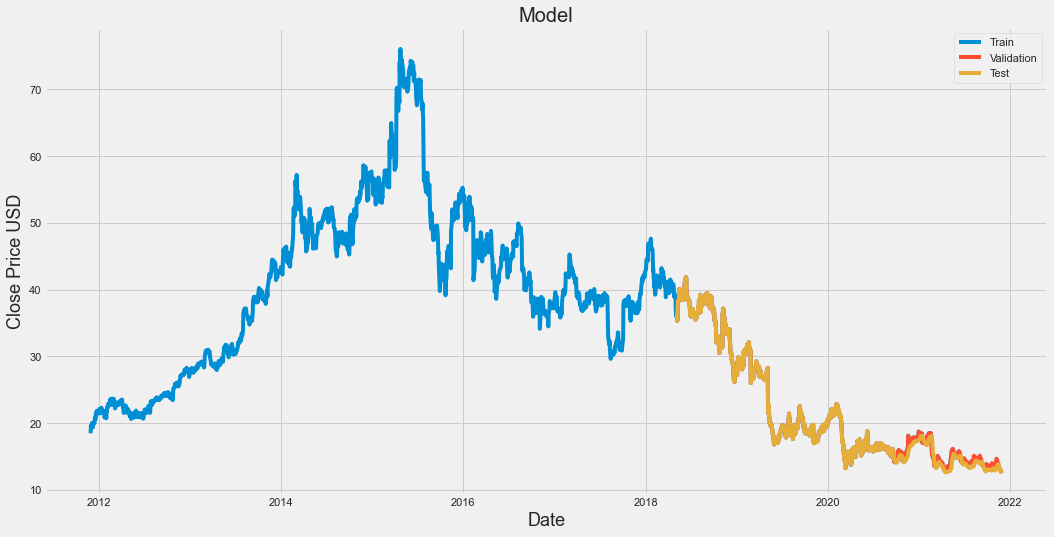

In [365]:
#Plot the data
train = data[:30*80] #train dataset ultimi 80 mesi
test = data[training_data_len - 397:] #test dataset ultimi 30 mesi 
predict = pd.DataFrame()
predict['Validation'] = test

support = pd.DataFrame(predictions, columns = ['Validation2'])
predict['Validation'].iloc[len(test)-300:] = support['Validation2'].iloc[len(predictions)-300:]
#validation ultimi 10 mesi

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.plot(train['Close'])
plt.plot(test['Close'])
plt.plot(predict)
plt.legend(['Train', 'Validation', 'Test'], loc='upper right')
plt.show()

In [366]:
combination = pd.DataFrame()
combination['Close Esatta'] = test[600:900]
combination['Close Predetta'] = predict[600:900]
close_predetta['Viatris Close'] = combination['Close Predetta'];
combination

,Close Esatta,Close Predetta
Date,,
2020-09-22,14.82,15.236143
2020-09-23,14.37,15.041676
2020-09-24,14.21,14.770832
2020-09-25,14.42,14.476016
2020-09-28,14.64,14.243129
...,...,...
2021-11-22,13.12,13.163586
2021-11-23,13.16,12.962899
2021-11-24,13.05,12.804480


________________________________________________________________________________________________

NOVAVAX

________________________________________________________________________________________________

In [367]:
nova_df = yf.download('NVAX', start='2011-11-30', end='2021-11-30')

#Creiamo un nuovo dataframe con solo la cononna 'Adj Close'
data = nova_df.filter(['Close'])
#Conversione del dataframe in un array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)

#Scale the data (good practice before present the data to neural network input)
scaler = MinMaxScaler(feature_range=(0,1))
dataset = dataset.reshape(-1,1)
scaled_data = scaler.fit_transform(dataset)

#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0: training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

#Convert the x_train and y_train to arrays
x_train,  y_train = np.array(x_train), np.array(y_train)

#Reshape the data (l'algoritmo si aspetta 3 dimension data)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

#Build the LSTM Model
model = Sequential() #numbers of neurons
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

[*********************100%***********************]  1 of 1 completed


In [368]:
#Train the module
model.fit(x_train, y_train, batch_size=1, epochs=1)

1954/1954 [==============================] - 91s 45ms/step - loss: 0.0019


In [369]:
#Create the testing data_set
#Create a new array containing scaled values
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :] #All the values we want the module to predict
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

#Convert the data to array
x_test = np.array(x_test)

#Get the module predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) #unscaling the values

In [370]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse  #Un valore di 0 indica che la prediction era perfetta/identica

6.2756829451377065

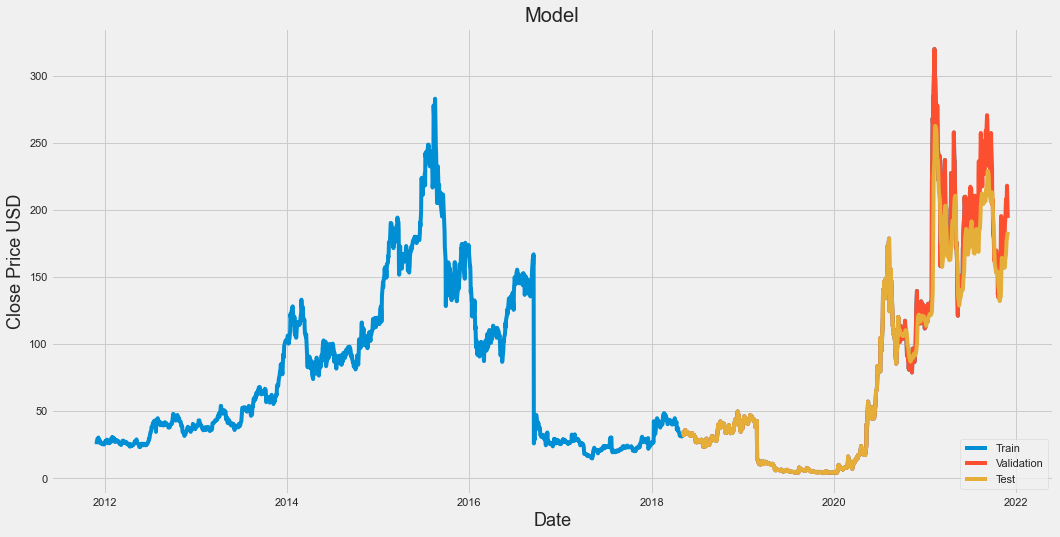

In [371]:
#Plot the data
train = data[:30*80] #train dataset ultimi 80 mesi
test = data[training_data_len - 397:] #test dataset ultimi 30 mesi 
predict = pd.DataFrame()
predict['Validation'] = test

support = pd.DataFrame(predictions, columns = ['Validation2'])
predict['Validation'].iloc[len(test)-300:] = support['Validation2'].iloc[len(predictions)-300:]
#validation ultimi 10 mesi

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.plot(train['Close'])
plt.plot(test['Close'])
plt.plot(predict)
plt.legend(['Train', 'Validation', 'Test'], loc='lower right')
plt.show()

In [372]:
combination = pd.DataFrame()
combination['Close Esatta'] = test[600:900]
combination['Close Predetta'] = predict[600:900]
close_predetta['Nova Close'] = combination['Close Predetta'];
combination

,Close Esatta,Close Predetta
Date,,
2020-09-22,111.629997,109.631081
2020-09-23,101.570000,109.993065
2020-09-24,102.440002,108.665184
2020-09-25,113.559998,106.961189
2020-09-28,111.180000,106.971741
...,...,...
2021-11-22,207.990005,166.701141
2021-11-23,200.710007,172.357971
2021-11-24,200.070007,176.527847


________________________________________________________________________________________________

4. Strategie di trading e backtesting

________________________________________________________________________________________________

In [128]:
#Import the libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [129]:
#Load the data
apple_df = yf.download('AAPL', start='2021-07-30', end='2021-11-30')
apple_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-29,144.690002,146.550003,144.580002,145.639999,145.210190,56699500
2021-07-30,144.380005,146.330002,144.110001,145.860001,145.429535,70382000
2021-08-02,146.360001,146.949997,145.250000,145.520004,145.090546,62880000
2021-08-03,145.809998,148.039993,145.179993,147.360001,146.925110,64786600
2021-08-04,147.270004,147.789993,146.279999,146.949997,146.516327,56368300
...,...,...,...,...,...,...
2021-11-22,161.679993,165.699997,161.000000,161.020004,161.020004,117467900
2021-11-23,161.119995,161.800003,159.059998,161.410004,161.410004,96041900
2021-11-24,160.750000,162.139999,159.639999,161.940002,161.940002,69463600


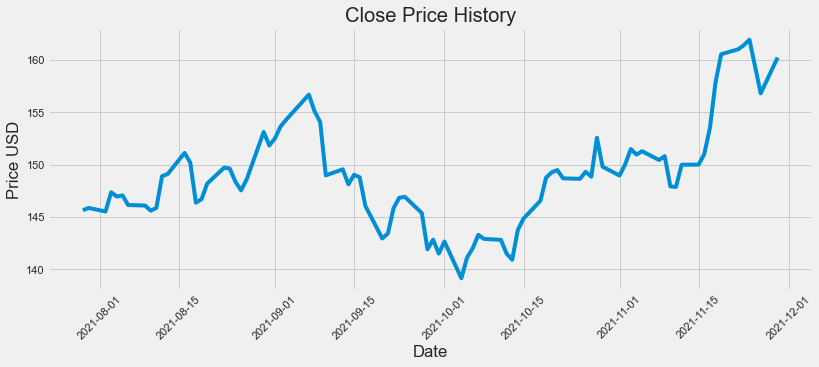

In [130]:
#Visually show the stock price
plt.figure(figsize=(12.2, 4.5))
plt.plot(apple_df['Close'], label='Close')
plt.xticks(rotation=45)
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price USD')
plt.show()

In [131]:
#Calculate the MACF and signal line indicators

#Calculating the short term exponential moving average (EMA)
ShortEMA = apple_df['Close'].ewm(span=12, adjust=False).mean()
#Calulate the long term exponential moving average (EMA)
LongEMA = apple_df['Close'].ewm(span=26, adjust=False).mean()

#Calculate the MACD line
MACD = ShortEMA - LongEMA
#Calculate the signal line
signal = MACD.ewm(span=9, adjust=False).mean()

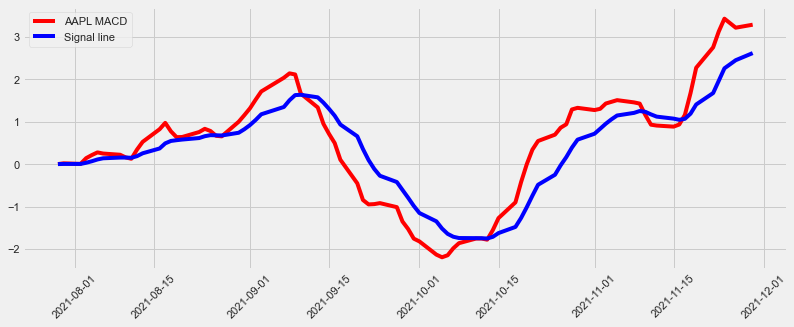

In [132]:
#Plot the chart
plt.figure(figsize=(12.2, 4.5))
plt.xticks(rotation=45)
plt.plot(apple_df.index, MACD, label='AAPL MACD', color='red')
plt.plot(apple_df.index, signal, label='Signal line', color='blue')
plt.legend(loc='upper left')
plt.show()

In [133]:
#Create new columns for the data
apple_df['MACD'] = MACD
apple_df['Signal Line'] = signal
#Show the data
apple_df

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line
Date,,,,,,,,
2021-07-29,144.690002,146.550003,144.580002,145.639999,145.210190,56699500,0.000000,0.000000
2021-07-30,144.380005,146.330002,144.110001,145.860001,145.429535,70382000,0.017550,0.003510
2021-08-02,146.360001,146.949997,145.250000,145.520004,145.090546,62880000,0.003978,0.003604
2021-08-03,145.809998,148.039993,145.179993,147.360001,146.925110,64786600,0.140079,0.030899
2021-08-04,147.270004,147.789993,146.279999,146.949997,146.516327,56368300,0.212408,0.067201
...,...,...,...,...,...,...,...,...
2021-11-22,161.679993,165.699997,161.000000,161.020004,161.020004,117467900,2.751142,1.674212
2021-11-23,161.119995,161.800003,159.059998,161.410004,161.410004,96041900,3.126754,1.964720
2021-11-24,160.750000,162.139999,159.639999,161.940002,161.940002,69463600,3.427683,2.257313


In [134]:
#Create a function to signal when to buy and sell an asset
def buy_sell(signal):
    Buy = []
    Sell = []
    Signal = []
    flag = -1  #ci indica quando le due line si incrociano se il MACD continua poi a salire/scendere
    
    for i in range(0, len(signal)):
        if signal['MACD'][i] > signal['Signal Line'][i]:
            Sell.append(np.nan)
            if flag != 1:#se non ci siamo ancora stati
                Buy.append(signal['Close'][i])
                flag = 1#indica che ci siamo già stati
                Signal.append(flag)
            else:
                Buy.append(np.nan)
                Signal.append(0)
        
        elif signal['MACD'][i] < signal['Signal Line'][i]:#SignalLine has cross MACD line
            Buy.append(np.nan)
            if flag != -1:#ci siamo stati
                Sell.append(signal['Close'][i])
                flag = -1
                Signal.append(flag)
            else:
                Sell.append(np.nan)
                Signal.append(0)
        
        else:
            Signal.append(0)
            Buy.append(np.nan)
            Sell.append(np.nan)

    return (Buy, Sell, Signal)

In [135]:
#Create buy and sell column
a = buy_sell(apple_df)
apple_df['Buy_Signal_Price'] = a[0]
apple_df['Sell_Signal_Price'] = a[1]
apple_df['MACD_signal'] = a[2]
#Show the data
apple_df

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price,MACD_signal
Date,,,,,,,,,,,
2021-07-29,144.690002,146.550003,144.580002,145.639999,145.210190,56699500,0.000000,0.000000,NaN,NaN,0
2021-07-30,144.380005,146.330002,144.110001,145.860001,145.429535,70382000,0.017550,0.003510,145.860001,NaN,1
2021-08-02,146.360001,146.949997,145.250000,145.520004,145.090546,62880000,0.003978,0.003604,NaN,NaN,0
2021-08-03,145.809998,148.039993,145.179993,147.360001,146.925110,64786600,0.140079,0.030899,NaN,NaN,0
2021-08-04,147.270004,147.789993,146.279999,146.949997,146.516327,56368300,0.212408,0.067201,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
2021-11-22,161.679993,165.699997,161.000000,161.020004,161.020004,117467900,2.751142,1.674212,NaN,NaN,0
2021-11-23,161.119995,161.800003,159.059998,161.410004,161.410004,96041900,3.126754,1.964720,NaN,NaN,0
2021-11-24,160.750000,162.139999,159.639999,161.940002,161.940002,69463600,3.427683,2.257313,NaN,NaN,0


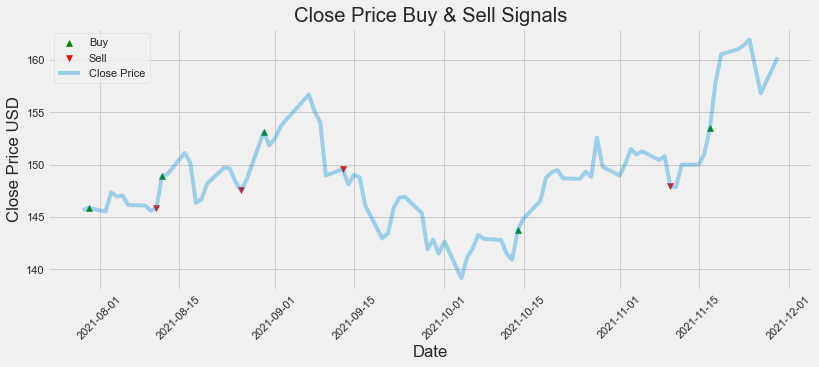

In [136]:
#Visually show the stock buy and sell signal
plt.figure(figsize=(12.2, 4.5))
plt.xticks(rotation=45)
plt.scatter(apple_df.index, apple_df['Buy_Signal_Price'], color='green', label='Buy', marker='^', alpha=1)
plt.scatter(apple_df.index, apple_df['Sell_Signal_Price'], color='red', label='Sell', marker='v', alpha=1)
plt.plot(apple_df['Close'], label='Close Price', alpha = 0.35)
plt.title('Close Price Buy & Sell Signals')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.legend(loc='upper left')
plt.show()

Backtesting

In [137]:
#Creating our position
position = []
for i in range(len(apple_df['MACD_signal'])):
    if apple_df['MACD_signal'][i] > 1:
        position.append(0)
    else:
        position.append(1)
        
for i in range(len(apple_df['Close'])):
    if apple_df['MACD_signal'][i] == 1:
        position[i] = 1
    elif apple_df['MACD_signal'][i] == -1:
        position[i] = 0
    else:
        position[i] = position[i-1]
        
macd = apple_df['MACD']
signal = apple_df['Signal Line']
close_price = apple_df['Close']
macd_signal = pd.DataFrame(apple_df['MACD_signal']).rename(columns = {0:'macd_signal'}).set_index(apple_df.index)
position = pd.DataFrame(position).rename(columns = {0:'macd_position'}).set_index(apple_df.index)

frames = [close_price, macd, signal, macd_signal, position]
strategy = pd.concat(frames, join = 'inner', axis = 1)

strategy

,Close,MACD,Signal Line,MACD_signal,macd_position
Date,,,,,
2021-07-29,145.639999,0.000000,0.000000,0,1
2021-07-30,145.860001,0.017550,0.003510,1,1
2021-08-02,145.520004,0.003978,0.003604,0,1
2021-08-03,147.360001,0.140079,0.030899,0,1
2021-08-04,146.949997,0.212408,0.067201,0,1
...,...,...,...,...,...
2021-11-22,161.020004,2.751142,1.674212,0,1
2021-11-23,161.410004,3.126754,1.964720,0,1
2021-11-24,161.940002,3.427683,2.257313,0,1


In [138]:
from math import floor
from termcolor import colored as cl

In [139]:
#Backtesting della nostra strategia investendo 100k USD nella nostra strategia di trading.

#Calcolo i ritorni dell'azione Apple utilizzando la funzione diff
apple_ret = pd.DataFrame(np.diff(apple_df['Close'])).rename(columns = {0:'returns'})
macd_strategy_ret = []

#Iteriamo sui valori di ritorno 'apple_ret' per calcolare i ritorni ottenuti dalla nostra MACD 
#strategy
for i in range(len(apple_ret)):
    try:
        returns = apple_ret['returns'][i]*strategy['macd_position'][i]
        macd_strategy_ret.append(returns)
    except:
        pass

macd_strategy_ret_df = pd.DataFrame(macd_strategy_ret).rename(columns = {0:'macd_returns'})

#Calcoliamo il numero di azioni Apple che possiamo acquistare utilizzando 100k di investimento
investment_value = 100000
number_of_stocks = floor(investment_value/apple_df['Close'][0])

#Successivamente passiamo i dati in un for-loop per trovare il ritorno dell'investimento
macd_investment_ret = []
for i in range(len(macd_strategy_ret_df['macd_returns'])):
    returns = number_of_stocks*macd_strategy_ret_df['macd_returns'][i]
    macd_investment_ret.append(returns)

macd_investment_ret_df = pd.DataFrame(macd_investment_ret).rename(columns = {0:'investment_returns'})
total_investment_ret = round(sum(macd_investment_ret_df['investment_returns']), 2)
profit_percentage = floor((total_investment_ret/investment_value)*100)

#Stampiamo il ritorno totale ottenuto investendo 100k  nella nostra strategia
print(cl('Profit gained from the MACD strategy by investing $100k in AAPL : {}'.format(total_investment_ret), attrs = ['bold']))
print(cl('Profit percentage of the MACD strategy : {}%'.format(profit_percentage), attrs = ['bold']))

Profit gained from the MACD strategy by investing $100k in AAPL : 4260.06
Profit percentage of the MACD strategy : 4%


________________________________________________________________________________________________

META

________________________________________________________________________________________________

[*********************100%***********************]  1 of 1 completed


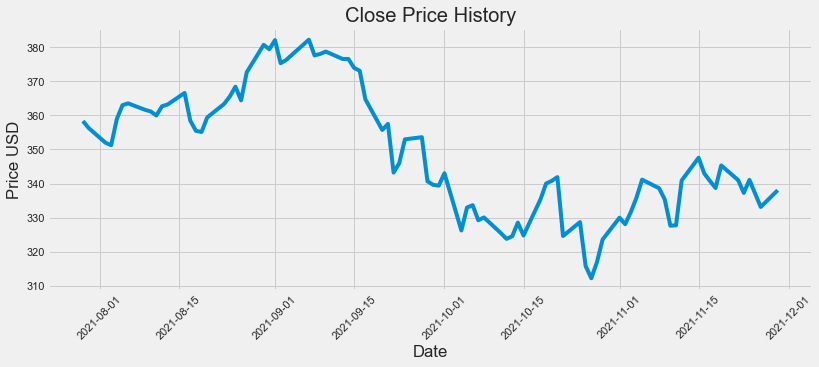

In [140]:
#Load the data
meta_df = yf.download('FB', start='2021-07-30', end='2021-11-30')

#Visually show the stock price
plt.figure(figsize=(12.2, 4.5))
plt.plot(meta_df['Close'], label='Close')
plt.xticks(rotation=45)
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price USD')
plt.show()

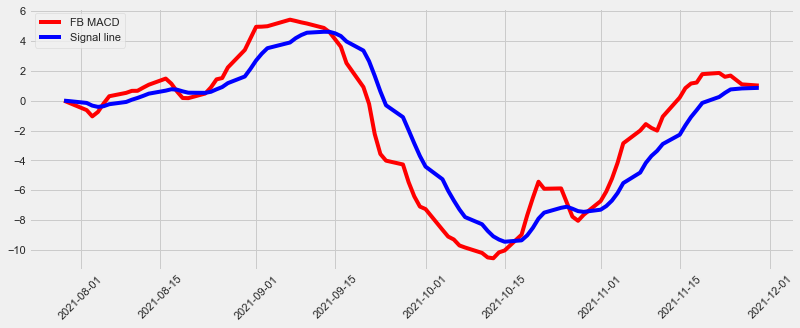

In [141]:
#Calculate the MACF and signal line indicators

#Calculating the short term exponential moving average (EMA)
ShortEMA = meta_df['Close'].ewm(span=12, adjust=False).mean()
#Calulate the long term exponential moving average (EMA)
LongEMA = meta_df['Close'].ewm(span=26, adjust=False).mean()

#Calculate the MACD line
MACD = ShortEMA - LongEMA
#Calculate the signal line
signal = MACD.ewm(span=9, adjust=False).mean()

#Plot the chart
plt.figure(figsize=(12.2, 4.5))
plt.xticks(rotation=45)
plt.plot(meta_df.index, MACD, label='FB MACD', color='red')
plt.plot(meta_df.index, signal, label='Signal line', color='blue')
plt.legend(loc='upper left')
plt.show()

In [142]:
#Create new columns for the data
meta_df['MACD'] = MACD
meta_df['Signal Line'] = signal
#Show the data
meta_df

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line
Date,,,,,,,,
2021-07-29,361.000000,365.519989,356.739990,358.320007,358.320007,33413200,0.000000,0.000000
2021-07-30,354.000000,360.730011,352.940002,356.299988,356.299988,15966700,-0.161141,-0.032228
2021-08-02,358.100006,359.399994,350.739990,351.950012,351.950012,13180400,-0.632562,-0.152295
2021-08-03,352.730011,353.769989,347.700012,351.239990,351.239990,12406100,-1.051339,-0.332104
2021-08-04,352.420013,360.480011,351.510010,358.920013,358.920013,14180600,-0.754809,-0.416645
...,...,...,...,...,...,...,...,...
2021-11-22,349.049988,353.829987,340.510010,341.010010,341.010010,27116800,1.855989,0.250276
2021-11-23,338.929993,341.399994,333.500000,337.250000,337.250000,17225000,1.596849,0.519591
2021-11-24,336.000000,341.779999,332.809998,341.059998,341.059998,13566200,1.679552,0.751583


In [143]:
#Create a function to signal when to buy and sell an asset
def buy_sell(signal):
    Buy = []
    Sell = []
    Signal = []
    flag = -1  #ci indica quando le due line si incrociano se il MACD continua poi a salire/scendere
    
    for i in range(0, len(signal)):
        if signal['MACD'][i] > signal['Signal Line'][i]:
            Sell.append(np.nan)
            if flag != 1:#se non ci siamo ancora stati
                Buy.append(signal['Close'][i])
                flag = 1#indica che ci siamo già stati
                Signal.append(flag)
            else:
                Buy.append(np.nan)
                Signal.append(0)
        
        elif signal['MACD'][i] < signal['Signal Line'][i]:#SignalLine has cross MACD line
            Buy.append(np.nan)
            if flag != -1:#ci siamo stati
                Sell.append(signal['Close'][i])
                flag = -1
                Signal.append(flag)
            else:
                Sell.append(np.nan)
                Signal.append(0)
        
        else:
            Signal.append(0)
            Buy.append(np.nan)
            Sell.append(np.nan)

    return (Buy, Sell, Signal)

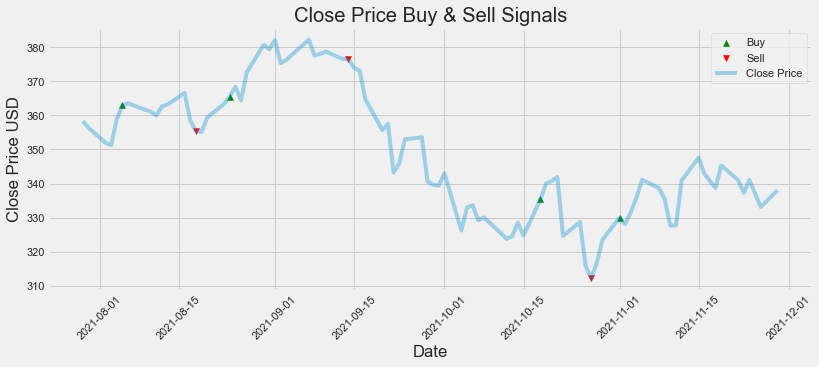

In [144]:
#Create buy and sell column
a = buy_sell(meta_df)
meta_df['Buy_Signal_Price'] = a[0]
meta_df['Sell_Signal_Price'] = a[1]
meta_df['MACD_signal'] = a[2]

#Visually show the stock buy and sell signal
plt.figure(figsize=(12.2, 4.5))
plt.xticks(rotation=45)
plt.scatter(meta_df.index, meta_df['Buy_Signal_Price'], color='green', label='Buy', marker='^', alpha=1)
plt.scatter(meta_df.index, meta_df['Sell_Signal_Price'], color='red', label='Sell', marker='v', alpha=1)
plt.plot(meta_df['Close'], label='Close Price', alpha = 0.35)
plt.title('Close Price Buy & Sell Signals')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.legend(loc='upper right')
plt.show()

Backtesting

In [145]:
#Creating our position
position = []
for i in range(len(meta_df['MACD_signal'])):
    if meta_df['MACD_signal'][i] > 1:
        position.append(0)
    else:
        position.append(1)
        
for i in range(len(meta_df['Close'])):
    if meta_df['MACD_signal'][i] == 1:
        position[i] = 1
    elif meta_df['MACD_signal'][i] == -1:
        position[i] = 0
    else:
        position[i] = position[i-1]
        
macd = meta_df['MACD']
signal = meta_df['Signal Line']
close_price = meta_df['Close']
macd_signal = pd.DataFrame(meta_df['MACD_signal']).rename(columns = {0:'macd_signal'}).set_index(meta_df.index)
position = pd.DataFrame(position).rename(columns = {0:'macd_position'}).set_index(meta_df.index)

frames = [close_price, macd, signal, macd_signal, position]
strategy = pd.concat(frames, join = 'inner', axis = 1)
strategy

#Backtesting della nostra strategia investendo 100k USD nella nostra strategia di trading.

#Calcolo i ritorni dell'azione Apple utilizzando la funzione diff
meta_ret = pd.DataFrame(np.diff(meta_df['Close'])).rename(columns = {0:'returns'})
macd_strategy_ret = []

#Iteriamo sui valori di ritorno 'meta_ret' per calcolare i ritorni ottenuti dalla nostra MACD 
#strategy
for i in range(len(meta_ret)):
    try:
        returns = meta_ret['returns'][i]*strategy['macd_position'][i]
        macd_strategy_ret.append(returns)
    except:
        pass

macd_strategy_ret_df = pd.DataFrame(macd_strategy_ret).rename(columns = {0:'macd_returns'})

#Calcoliamo il numero di azioni Meta che possiamo acquistare utilizzando 100k di investimento
investment_value = 100000
number_of_stocks = floor(investment_value/meta_df['Close'][0])

#Successivamente passiamo i dati in un for-loop per trovare il ritorno dell'investimento
macd_investment_ret = []
for i in range(len(macd_strategy_ret_df['macd_returns'])):
    returns = number_of_stocks*macd_strategy_ret_df['macd_returns'][i]
    macd_investment_ret.append(returns)

macd_investment_ret_df = pd.DataFrame(macd_investment_ret).rename(columns = {0:'investment_returns'})
total_investment_ret = round(sum(macd_investment_ret_df['investment_returns']), 2)
profit_percentage = floor((total_investment_ret/investment_value)*100)

#Stampiamo il ritorno totale ottenuto investendo 100k  nella nostra strategia
print(cl('Profit gained from the MACD strategy by investing $100k in FB : {}'.format(total_investment_ret), attrs = ['bold']))
print(cl('Profit percentage of the MACD strategy : {}%'.format(profit_percentage), attrs = ['bold']))

Profit gained from the MACD strategy by investing $100k in FB : -1930.68
Profit percentage of the MACD strategy : -2%


________________________________________________________________________________________________

TESLA

________________________________________________________________________________________________

[*********************100%***********************]  1 of 1 completed


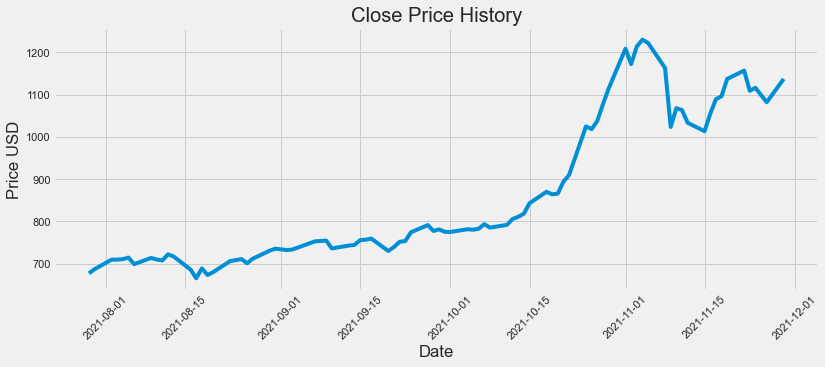

In [146]:
#Load the data
tesla_df = yf.download('TSLA', start='2021-07-30', end='2021-11-30')
#Visually show the stock price
plt.figure(figsize=(12.2, 4.5))
plt.plot(tesla_df['Close'], label='Close')
plt.xticks(rotation=45)
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price USD')
plt.show()

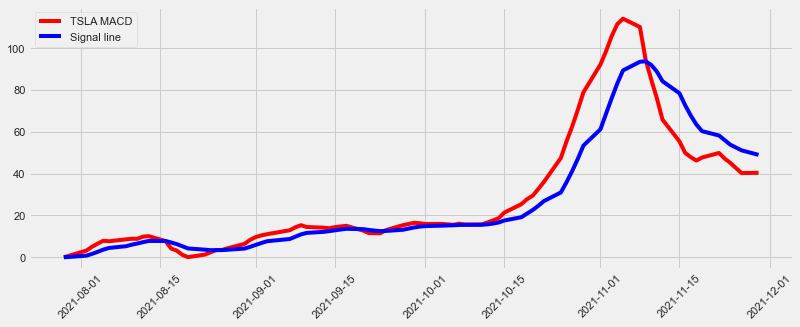

In [147]:
#Calculate the MACF and signal line indicators

#Calculating the short term exponential moving average (EMA)
ShortEMA = tesla_df['Close'].ewm(span=12, adjust=False).mean()
#Calulate the long term exponential moving average (EMA)
LongEMA = tesla_df['Close'].ewm(span=26, adjust=False).mean()

#Calculate the MACD line
MACD = ShortEMA - LongEMA
#Calculate the signal line
signal = MACD.ewm(span=9, adjust=False).mean()

#Plot the chart
plt.figure(figsize=(12.2, 4.5))
plt.xticks(rotation=45)
plt.plot(tesla_df.index, MACD, label='TSLA MACD', color='red')
plt.plot(tesla_df.index, signal, label='Signal line', color='blue')
plt.legend(loc='upper left')
plt.show()

In [148]:
#Create new columns for the data
tesla_df['MACD'] = MACD
tesla_df['Signal Line'] = signal
#Show the data
tesla_df

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line
Date,,,,,,,,
2021-07-29,649.789978,683.690002,648.799988,677.349976,677.349976,30394600,0.000000,0.000000
2021-07-30,671.760010,697.530029,669.000000,687.200012,687.200012,29600500,0.785758,0.157152
2021-08-02,700.000000,726.940002,698.400024,709.669983,709.669983,33615800,3.184902,0.762702
2021-08-03,719.000000,722.650024,701.010010,709.739990,709.739990,21620300,5.033863,1.616934
2021-08-04,711.000000,724.900024,708.929993,710.919983,710.919983,17002600,6.519243,2.597396
...,...,...,...,...,...,...,...,...
2021-11-22,1162.329956,1201.949951,1132.430054,1156.869995,1156.869995,33072500,49.875022,58.219194
2021-11-23,1167.510010,1180.500000,1062.699951,1109.030029,1109.030029,36171700,47.195726,56.014501
2021-11-24,1080.390015,1132.770020,1062.000000,1116.000000,1116.000000,22560200,45.114729,53.834546


In [149]:
#Create a function to signal when to buy and sell an asset
def buy_sell(signal):
    Buy = []
    Sell = []
    Signal = []
    flag = -1  #ci indica quando le due line si incrociano se il MACD continua poi a salire/scendere
    
    for i in range(0, len(signal)):
        if signal['MACD'][i] > signal['Signal Line'][i]:
            Sell.append(np.nan)
            if flag != 1:#se non ci siamo ancora stati
                Buy.append(signal['Close'][i])
                flag = 1#indica che ci siamo già stati
                Signal.append(flag)
            else:
                Buy.append(np.nan)
                Signal.append(0)
        
        elif signal['MACD'][i] < signal['Signal Line'][i]:#SignalLine has cross MACD line
            Buy.append(np.nan)
            if flag != -1:#ci siamo stati
                Sell.append(signal['Close'][i])
                flag = -1
                Signal.append(flag)
            else:
                Sell.append(np.nan)
                Signal.append(0)
        
        else:
            Signal.append(0)
            Buy.append(np.nan)
            Sell.append(np.nan)

    return (Buy, Sell, Signal)

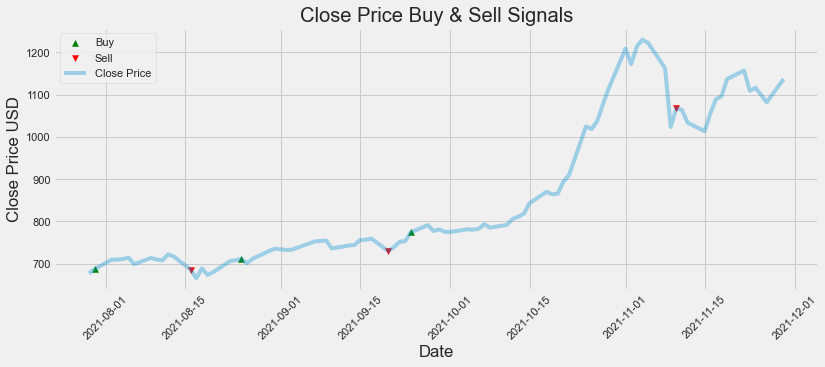

In [150]:
#Create buy and sell column
a = buy_sell(tesla_df)
tesla_df['Buy_Signal_Price'] = a[0]
tesla_df['Sell_Signal_Price'] = a[1]
tesla_df['MACD_signal'] = a[2]

#Visually show the stock buy and sell signal
plt.figure(figsize=(12.2, 4.5))
plt.xticks(rotation=45)
plt.scatter(tesla_df.index, tesla_df['Buy_Signal_Price'], color='green', label='Buy', marker='^', alpha=1)
plt.scatter(tesla_df.index, tesla_df['Sell_Signal_Price'], color='red', label='Sell', marker='v', alpha=1)
plt.plot(tesla_df['Close'], label='Close Price', alpha = 0.35)
plt.title('Close Price Buy & Sell Signals')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.legend(loc='upper left')
plt.show()

BACKTESTING

In [151]:
#Creating our position
position = []
for i in range(len(tesla_df['MACD_signal'])):
    if tesla_df['MACD_signal'][i] > 1:
        position.append(0)
    else:
        position.append(1)
        
for i in range(len(tesla_df['Close'])):
    if tesla_df['MACD_signal'][i] == 1:
        position[i] = 1
    elif tesla_df['MACD_signal'][i] == -1:
        position[i] = 0
    else:
        position[i] = position[i-1]
        
macd = tesla_df['MACD']
signal = tesla_df['Signal Line']
close_price = tesla_df['Close']
macd_signal = pd.DataFrame(tesla_df['MACD_signal']).rename(columns = {0:'macd_signal'}).set_index(tesla_df.index)
position = pd.DataFrame(position).rename(columns = {0:'macd_position'}).set_index(tesla_df.index)

frames = [close_price, macd, signal, macd_signal, position]
strategy = pd.concat(frames, join = 'inner', axis = 1)
strategy

#Backtesting della nostra strategia investendo 100k USD nella nostra strategia di trading.

#Calcolo i ritorni dell'azione Apple utilizzando la funzione diff
tesla_ret = pd.DataFrame(np.diff(tesla_df['Close'])).rename(columns = {0:'returns'})
macd_strategy_ret = []

#Iteriamo sui valori di ritorno 'tesla_ret' per calcolare i ritorni ottenuti dalla nostra MACD 
#strategy
for i in range(len(tesla_ret)):
    try:
        returns = tesla_ret['returns'][i]*strategy['macd_position'][i]
        macd_strategy_ret.append(returns)
    except:
        pass

macd_strategy_ret_df = pd.DataFrame(macd_strategy_ret).rename(columns = {0:'macd_returns'})

#Calcoliamo il numero di azioni Tesla che possiamo acquistare utilizzando 100k di investimento
investment_value = 100000
number_of_stocks = floor(investment_value/tesla_df['Close'][0])

#Successivamente passiamo i dati in un for-loop per trovare il ritorno dell'investimento
macd_investment_ret = []
for i in range(len(macd_strategy_ret_df['macd_returns'])):
    returns = number_of_stocks*macd_strategy_ret_df['macd_returns'][i]
    macd_investment_ret.append(returns)

macd_investment_ret_df = pd.DataFrame(macd_investment_ret).rename(columns = {0:'investment_returns'})
total_investment_ret = round(sum(macd_investment_ret_df['investment_returns']), 2)
profit_percentage = floor((total_investment_ret/investment_value)*100)

#Stampiamo il ritorno totale ottenuto investendo 100k  nella nostra strategia
print(cl('Profit gained from the MACD strategy by investing $100k in TSLA : {}'.format(total_investment_ret), attrs = ['bold']))
print(cl('Profit percentage of the MACD strategy : {}%'.format(profit_percentage), attrs = ['bold']))

Profit gained from the MACD strategy by investing $100k in TSLA : 47238.44
Profit percentage of the MACD strategy : 47%


________________________________________________________________________________________________

FORD

________________________________________________________________________________________________

[*********************100%***********************]  1 of 1 completed


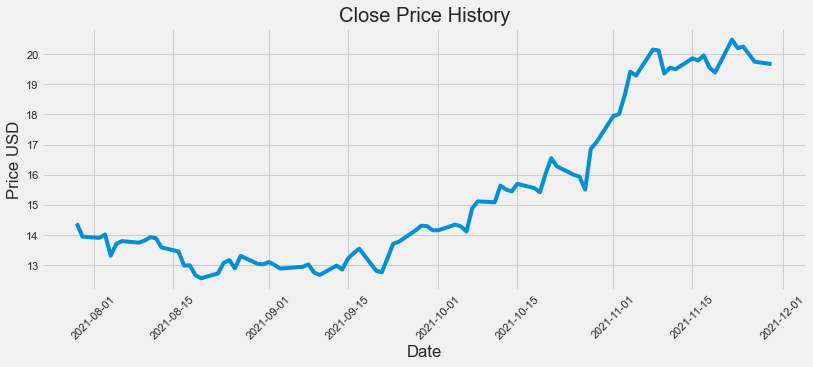

In [152]:
#Load the data
ford_df = yf.download('F', start='2021-07-30', end='2021-11-30')
#Visually show the stock price
plt.figure(figsize=(12.2, 4.5))
plt.plot(ford_df['Close'], label='Close')
plt.xticks(rotation=45)
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price USD')
plt.show()

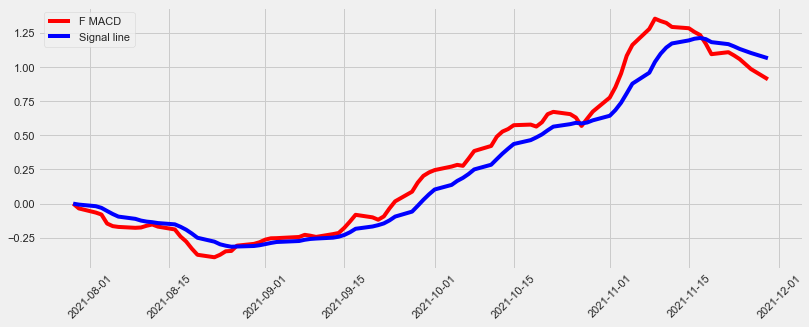

In [153]:
#Calculate the MACF and signal line indicators

#Calculating the short term exponential moving average (EMA)
ShortEMA = ford_df['Close'].ewm(span=12, adjust=False).mean()
#Calulate the long term exponential moving average (EMA)
LongEMA = ford_df['Close'].ewm(span=26, adjust=False).mean()

#Calculate the MACD line
MACD = ShortEMA - LongEMA
#Calculate the signal line
signal = MACD.ewm(span=9, adjust=False).mean()

#Plot the chart
plt.figure(figsize=(12.2, 4.5))
plt.xticks(rotation=45)
plt.plot(ford_df.index, MACD, label='F MACD', color='red')
plt.plot(ford_df.index, signal, label='Signal line', color='blue')
plt.legend(loc='upper left')
plt.show()

In [154]:
#Create new columns for the data
ford_df['MACD'] = MACD
ford_df['Signal Line'] = signal
#Show the data
ford_df

#Create a function to signal when to buy and sell an asset
def buy_sell(signal):
    Buy = []
    Sell = []
    Signal = []
    flag = -1  #ci indica quando le due line si incrociano se il MACD continua poi a salire/scendere
    
    for i in range(0, len(signal)):
        if signal['MACD'][i] > signal['Signal Line'][i]:
            Sell.append(np.nan)
            if flag != 1:#se non ci siamo ancora stati
                Buy.append(signal['Close'][i])
                flag = 1#indica che ci siamo già stati
                Signal.append(flag)
            else:
                Buy.append(np.nan)
                Signal.append(0)
        
        elif signal['MACD'][i] < signal['Signal Line'][i]:#SignalLine has cross MACD line
            Buy.append(np.nan)
            if flag != -1:#ci siamo stati
                Sell.append(signal['Close'][i])
                flag = -1
                Signal.append(flag)
            else:
                Sell.append(np.nan)
                Signal.append(0)
        
        else:
            Signal.append(0)
            Buy.append(np.nan)
            Sell.append(np.nan)

    return (Buy, Sell, Signal)

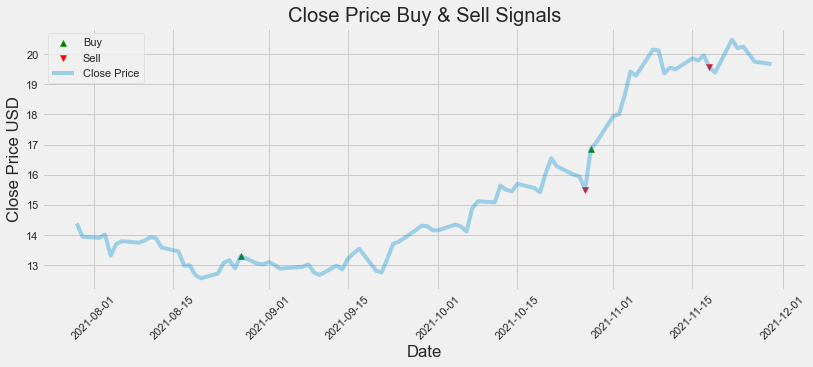

In [155]:
#Create buy and sell column
a = buy_sell(ford_df)
ford_df['Buy_Signal_Price'] = a[0]
ford_df['Sell_Signal_Price'] = a[1]
ford_df['MACD_signal'] = a[2]

#Visually show the stock buy and sell signal
plt.figure(figsize=(12.2, 4.5))
plt.xticks(rotation=45)
plt.scatter(ford_df.index, ford_df['Buy_Signal_Price'], color='green', label='Buy', marker='^', alpha=1)
plt.scatter(ford_df.index, ford_df['Sell_Signal_Price'], color='red', label='Sell', marker='v', alpha=1)
plt.plot(ford_df['Close'], label='Close Price', alpha = 0.35)
plt.title('Close Price Buy & Sell Signals')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.legend(loc='upper left')
plt.show()

Backtesting

In [156]:
#Creating our position
position = []
for i in range(len(ford_df['MACD_signal'])):
    if ford_df['MACD_signal'][i] > 1:
        position.append(0)
    else:
        position.append(1)
        
for i in range(len(ford_df['Close'])):
    if ford_df['MACD_signal'][i] == 1:
        position[i] = 1
    elif ford_df['MACD_signal'][i] == -1:
        position[i] = 0
    else:
        position[i] = position[i-1]
        
macd = ford_df['MACD']
signal = ford_df['Signal Line']
close_price = ford_df['Close']
macd_signal = pd.DataFrame(ford_df['MACD_signal']).rename(columns = {0:'macd_signal'}).set_index(ford_df.index)
position = pd.DataFrame(position).rename(columns = {0:'macd_position'}).set_index(ford_df.index)

frames = [close_price, macd, signal, macd_signal, position]
strategy = pd.concat(frames, join = 'inner', axis = 1)
strategy

#Backtesting della nostra strategia investendo 100k USD nella nostra strategia di trading.

#Calcolo i ritorni dell'azione Apple utilizzando la funzione diff
ford_ret = pd.DataFrame(np.diff(ford_df['Close'])).rename(columns = {0:'returns'})
macd_strategy_ret = []

#Iteriamo sui valori di ritorno 'ford_ret' per calcolare i ritorni ottenuti dalla nostra MACD 
#strategy
for i in range(len(ford_ret)):
    try:
        returns = ford_ret['returns'][i]*strategy['macd_position'][i]
        macd_strategy_ret.append(returns)
    except:
        pass

macd_strategy_ret_df = pd.DataFrame(macd_strategy_ret).rename(columns = {0:'macd_returns'})

#Calcoliamo il numero di azioni Ford che possiamo acquistare utilizzando 100k di investimento
investment_value = 100000
number_of_stocks = floor(investment_value/ford_df['Close'][0])

#Successivamente passiamo i dati in un for-loop per trovare il ritorno dell'investimento
macd_investment_ret = []
for i in range(len(macd_strategy_ret_df['macd_returns'])):
    returns = number_of_stocks*macd_strategy_ret_df['macd_returns'][i]
    macd_investment_ret.append(returns)

macd_investment_ret_df = pd.DataFrame(macd_investment_ret).rename(columns = {0:'investment_returns'})
total_investment_ret = round(sum(macd_investment_ret_df['investment_returns']), 2)
profit_percentage = floor((total_investment_ret/investment_value)*100)

#Stampiamo il ritorno totale ottenuto investendo 100k  nella nostra strategia
print(cl('Profit gained from the MACD strategy by investing $100k in F: {}'.format(total_investment_ret), attrs = ['bold']))
print(cl('Profit percentage of the MACD strategy : {}%'.format(profit_percentage), attrs = ['bold']))

Profit gained from the MACD strategy by investing $100k in F: 26545.17
Profit percentage of the MACD strategy : 26%


________________________________________________________________________________________________

VIATRIS

________________________________________________________________________________________________

[*********************100%***********************]  1 of 1 completed


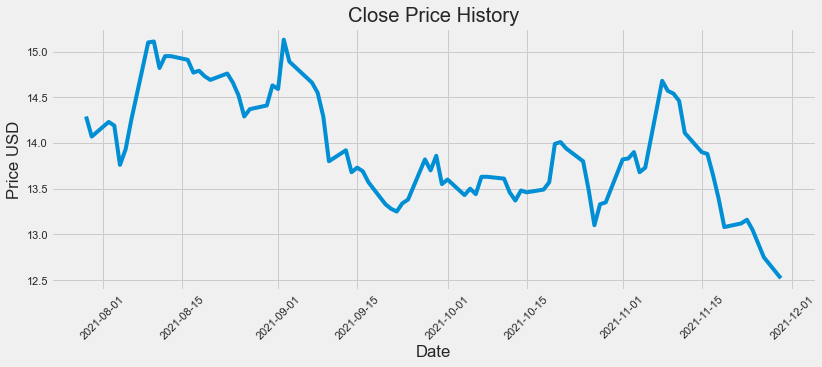

In [157]:
#Load the data
viatris_df = yf.download('VTRS', start='2021-07-30', end='2021-11-30')
#Visually show the stock price
plt.figure(figsize=(12.2, 4.5))
plt.plot(viatris_df['Close'], label='Close')
plt.xticks(rotation=45)
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price USD')
plt.show()


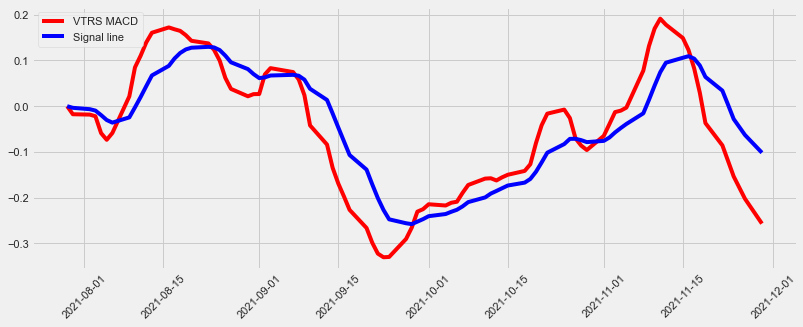

In [158]:
#Calculate the MACF and signal line indicators

#Calculating the short term exponential moving average (EMA)
ShortEMA = viatris_df['Close'].ewm(span=12, adjust=False).mean()
#Calulate the long term exponential moving average (EMA)
LongEMA = viatris_df['Close'].ewm(span=26, adjust=False).mean()

#Calculate the MACD line
MACD = ShortEMA - LongEMA
#Calculate the signal line
signal = MACD.ewm(span=9, adjust=False).mean()

#Plot the chart
plt.figure(figsize=(12.2, 4.5))
plt.xticks(rotation=45)
plt.plot(viatris_df.index, MACD, label='VTRS MACD', color='red')
plt.plot(viatris_df.index, signal, label='Signal line', color='blue')
plt.legend(loc='upper left')
plt.show()

In [159]:
#Create new columns for the data
viatris_df['MACD'] = MACD
viatris_df['Signal Line'] = signal
#Show the data
viatris_df

#Create a function to signal when to buy and sell an asset
def buy_sell(signal):
    Buy = []
    Sell = []
    Signal = []
    flag = -1  #ci indica quando le due line si incrociano se il MACD continua poi a salire/scendere
    
    for i in range(0, len(signal)):
        if signal['MACD'][i] > signal['Signal Line'][i]:
            Sell.append(np.nan)
            if flag != 1:#se non ci siamo ancora stati
                Buy.append(signal['Close'][i])
                flag = 1#indica che ci siamo già stati
                Signal.append(flag)
            else:
                Buy.append(np.nan)
                Signal.append(0)
        
        elif signal['MACD'][i] < signal['Signal Line'][i]:#SignalLine has cross MACD line
            Buy.append(np.nan)
            if flag != -1:#ci siamo stati
                Sell.append(signal['Close'][i])
                flag = -1
                Signal.append(flag)
            else:
                Sell.append(np.nan)
                Signal.append(0)
        
        else:
            Signal.append(0)
            Buy.append(np.nan)
            Sell.append(np.nan)

    return (Buy, Sell, Signal)

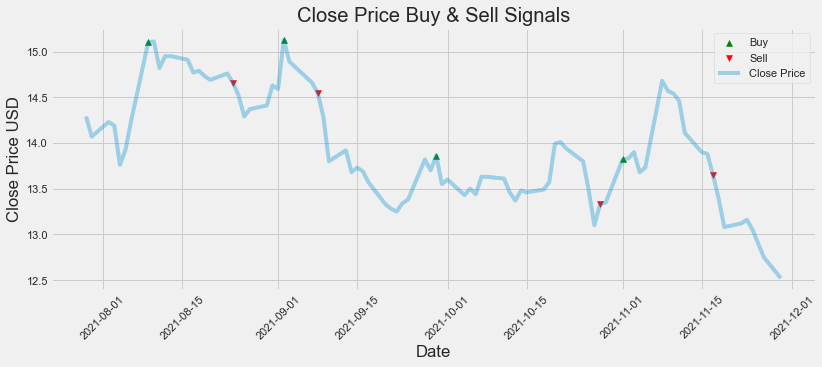

In [160]:
#Create buy and sell column
a = buy_sell(viatris_df)
viatris_df['Buy_Signal_Price'] = a[0]
viatris_df['Sell_Signal_Price'] = a[1]
viatris_df['MACD_signal'] = a[2]

#Visually show the stock buy and sell signal
plt.figure(figsize=(12.2, 4.5))
plt.xticks(rotation=45)
plt.scatter(viatris_df.index, viatris_df['Buy_Signal_Price'], color='green', label='Buy', marker='^', alpha=1)
plt.scatter(viatris_df.index, viatris_df['Sell_Signal_Price'], color='red', label='Sell', marker='v', alpha=1)
plt.plot(viatris_df['Close'], label='Close Price', alpha = 0.35)
plt.title('Close Price Buy & Sell Signals')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.legend(loc='upper right')
plt.show()

BACKTESTING

In [161]:
#Creating our position
position = []
for i in range(len(viatris_df['MACD_signal'])):
    if viatris_df['MACD_signal'][i] > 1:
        position.append(0)
    else:
        position.append(1)
        
for i in range(len(viatris_df['Close'])):
    if viatris_df['MACD_signal'][i] == 1:
        position[i] = 1
    elif viatris_df['MACD_signal'][i] == -1:
        position[i] = 0
    else:
        position[i] = position[i-1]
        
macd = viatris_df['MACD']
signal = viatris_df['Signal Line']
close_price = viatris_df['Close']
macd_signal = pd.DataFrame(viatris_df['MACD_signal']).rename(columns = {0:'macd_signal'}).set_index(viatris_df.index)
position = pd.DataFrame(position).rename(columns = {0:'macd_position'}).set_index(viatris_df.index)

frames = [close_price, macd, signal, macd_signal, position]
strategy = pd.concat(frames, join = 'inner', axis = 1)
strategy

#Backtesting della nostra strategia investendo 100k USD nella nostra strategia di trading.

#Calcolo i ritorni dell'azione Apple utilizzando la funzione diff
viatris_ret = pd.DataFrame(np.diff(viatris_df['Close'])).rename(columns = {0:'returns'})
macd_strategy_ret = []

#Iteriamo sui valori di ritorno 'viatris_ret' per calcolare i ritorni ottenuti dalla nostra MACD 
#strategy
for i in range(len(viatris_ret)):
    try:
        returns = viatris_ret['returns'][i]*strategy['macd_position'][i]
        macd_strategy_ret.append(returns)
    except:
        pass

macd_strategy_ret_df = pd.DataFrame(macd_strategy_ret).rename(columns = {0:'macd_returns'})

#Calcoliamo il numero di azioni Viatris che possiamo acquistare utilizzando 100k di investimento
investment_value = 100000
number_of_stocks = floor(investment_value/viatris_df['Close'][0])

#Successivamente passiamo i dati in un for-loop per trovare il ritorno dell'investimento
macd_investment_ret = []
for i in range(len(macd_strategy_ret_df['macd_returns'])):
    returns = number_of_stocks*macd_strategy_ret_df['macd_returns'][i]
    macd_investment_ret.append(returns)

macd_investment_ret_df = pd.DataFrame(macd_investment_ret).rename(columns = {0:'investment_returns'})
total_investment_ret = round(sum(macd_investment_ret_df['investment_returns']), 2)
profit_percentage = floor((total_investment_ret/investment_value)*100)

#Stampiamo il ritorno totale ottenuto investendo 100k  nella nostra strategia
print(cl('Profit gained from the MACD strategy by investing $100k in VTRS: {}'.format(total_investment_ret), attrs = ['bold']))
print(cl('Profit percentage of the MACD strategy : {}%'.format(profit_percentage), attrs = ['bold']))

Profit gained from the MACD strategy by investing $100k in VTRS: -6367.27
Profit percentage of the MACD strategy : -7%


________________________________________________________________________________________________

NOVAVAX

________________________________________________________________________________________________

[*********************100%***********************]  1 of 1 completed


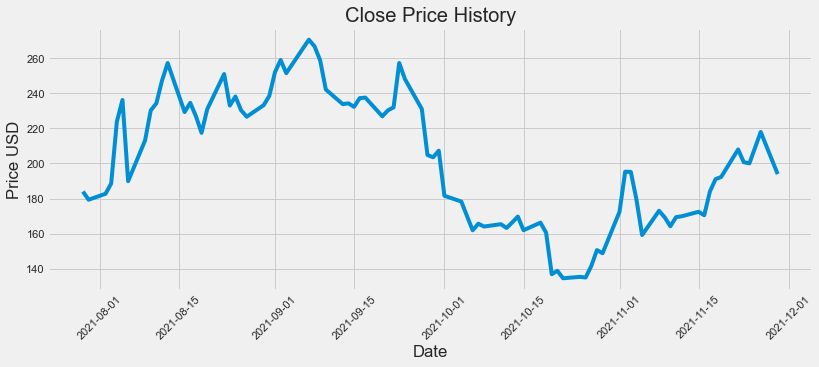

In [162]:
#Load the data
nova_df = yf.download('NVAX', start='2021-07-30', end='2021-11-30')
#Visually show the stock price
plt.figure(figsize=(12.2, 4.5))
plt.plot(nova_df['Close'], label='Close')
plt.xticks(rotation=45)
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price USD')
plt.show()

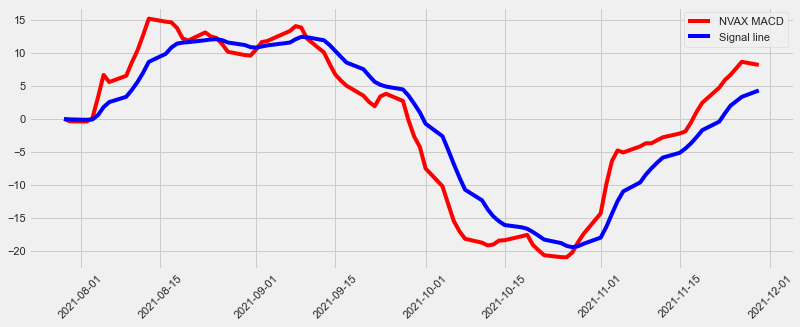

In [163]:
#Calculate the MACF and signal line indicators

#Calculating the short term exponential moving average (EMA)
ShortEMA = nova_df['Close'].ewm(span=12, adjust=False).mean()
#Calulate the long term exponential moving average (EMA)
LongEMA = nova_df['Close'].ewm(span=26, adjust=False).mean()

#Calculate the MACD line
MACD = ShortEMA - LongEMA
#Calculate the signal line
signal = MACD.ewm(span=9, adjust=False).mean()

#Plot the chart
plt.figure(figsize=(12.2, 4.5))
plt.xticks(rotation=45)
plt.plot(nova_df.index, MACD, label='NVAX MACD', color='red')
plt.plot(nova_df.index, signal, label='Signal line', color='blue')
plt.legend(loc='upper right')
plt.show()

In [164]:
#Create new columns for the data
nova_df['MACD'] = MACD
nova_df['Signal Line'] = signal
#Show the data
nova_df

#Create a function to signal when to buy and sell an asset
def buy_sell(signal):
    Buy = []
    Sell = []
    Signal = []
    flag = -1  #ci indica quando le due line si incrociano se il MACD continua poi a salire/scendere
    
    for i in range(0, len(signal)):
        if signal['MACD'][i] > signal['Signal Line'][i]:
            Sell.append(np.nan)
            if flag != 1:#se non ci siamo ancora stati
                Buy.append(signal['Close'][i])
                flag = 1#indica che ci siamo già stati
                Signal.append(flag)
            else:
                Buy.append(np.nan)
                Signal.append(0)
        
        elif signal['MACD'][i] < signal['Signal Line'][i]:#SignalLine has cross MACD line
            Buy.append(np.nan)
            if flag != -1:#ci siamo stati
                Sell.append(signal['Close'][i])
                flag = -1
                Signal.append(flag)
            else:
                Sell.append(np.nan)
                Signal.append(0)
        
        else:
            Signal.append(0)
            Buy.append(np.nan)
            Sell.append(np.nan)

    return (Buy, Sell, Signal)


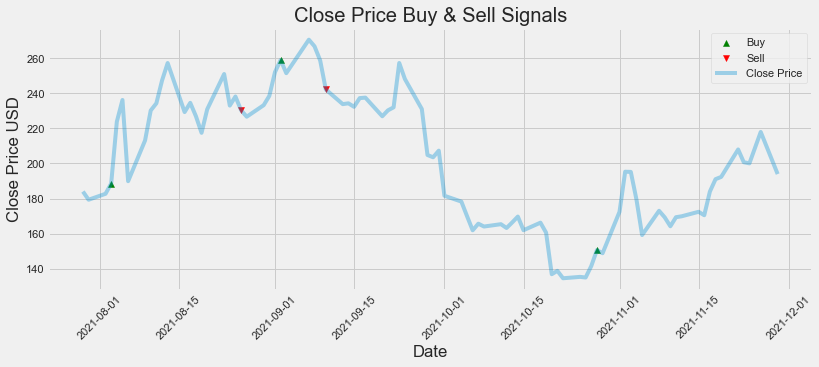

In [165]:
#Create buy and sell column
a = buy_sell(nova_df)
nova_df['Buy_Signal_Price'] = a[0]
nova_df['Sell_Signal_Price'] = a[1]
nova_df['MACD_signal'] = a[2]

#Visually show the stock buy and sell signal
plt.figure(figsize=(12.2, 4.5))
plt.xticks(rotation=45)
plt.scatter(nova_df.index, nova_df['Buy_Signal_Price'], color='green', label='Buy', marker='^', alpha=1)
plt.scatter(nova_df.index, nova_df['Sell_Signal_Price'], color='red', label='Sell', marker='v', alpha=1)
plt.plot(nova_df['Close'], label='Close Price', alpha = 0.35)
plt.title('Close Price Buy & Sell Signals')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.legend(loc='upper right')
plt.show()

BACKTESTING

In [166]:
#Creating our position
position = []
for i in range(len(nova_df['MACD_signal'])):
    if nova_df['MACD_signal'][i] > 1:
        position.append(0)
    else:
        position.append(1)
        
for i in range(len(nova_df['Close'])):
    if nova_df['MACD_signal'][i] == 1:
        position[i] = 1
    elif nova_df['MACD_signal'][i] == -1:
        position[i] = 0
    else:
        position[i] = position[i-1]
        
macd = nova_df['MACD']
signal = nova_df['Signal Line']
close_price = nova_df['Close']
macd_signal = pd.DataFrame(nova_df['MACD_signal']).rename(columns = {0:'macd_signal'}).set_index(nova_df.index)
position = pd.DataFrame(position).rename(columns = {0:'macd_position'}).set_index(nova_df.index)

frames = [close_price, macd, signal, macd_signal, position]
strategy = pd.concat(frames, join = 'inner', axis = 1)
strategy

#Backtesting della nostra strategia investendo 100k USD nella nostra strategia di trading.

#Calcolo i ritorni dell'azione Nova utilizzando la funzione diff
nova_ret = pd.DataFrame(np.diff(nova_df['Close'])).rename(columns = {0:'returns'})
macd_strategy_ret = []

#Iteriamo sui valori di ritorno 'nova_ret' per calcolare i ritorni ottenuti dalla nostra MACD 
#strategy
for i in range(len(nova_ret)):
    try:
        returns = nova_ret['returns'][i]*strategy['macd_position'][i]
        macd_strategy_ret.append(returns)
    except:
        pass

macd_strategy_ret_df = pd.DataFrame(macd_strategy_ret).rename(columns = {0:'macd_returns'})

#Calcoliamo il numero di azioni Nova che possiamo acquistare utilizzando 100k di investimento
investment_value = 100000
number_of_stocks = floor(investment_value/nova_df['Close'][0])

#Successivamente passiamo i dati in un for-loop per trovare il ritorno dell'investimento
macd_investment_ret = []
for i in range(len(macd_strategy_ret_df['macd_returns'])):
    returns = number_of_stocks*macd_strategy_ret_df['macd_returns'][i]
    macd_investment_ret.append(returns)

macd_investment_ret_df = pd.DataFrame(macd_investment_ret).rename(columns = {0:'investment_returns'})
total_investment_ret = round(sum(macd_investment_ret_df['investment_returns']), 2)
profit_percentage = floor((total_investment_ret/investment_value)*100)

#Stampiamo il ritorno totale ottenuto investendo 100k  nella nostra strategia
print(cl('Profit gained from the MACD strategy by investing $100k in NVAX: {}'.format(total_investment_ret), attrs = ['bold']))
print(cl('Profit percentage of the MACD strategy : {}%'.format(profit_percentage), attrs = ['bold']))

Profit gained from the MACD strategy by investing $100k in NVAX: 39568.42
Profit percentage of the MACD strategy : 39%


________________________________________________________________________________________________

5. CAPM

________________________________________________________________________________________________

In [167]:
#Librerie
import pandas as pd
import yfinance as yf
import numpy as np
import statsmodels.api as sm
import getFamaFrenchFactors as gff

In [168]:
#Abbiamo bisogno di due tipi di dati: Historical Data and Fama-French benchmark data
apple_df = yf.download('AAPL', start='2011-11-30', end='2021-11-30')
fama_french_monthly = gff.famaFrench3Factor(frequency='m')
fama_french_monthly.rename(columns={"date_ff_factors": 'Date'}, inplace=True)
fama_french_monthly.set_index('Date', inplace=True)
fama_french_monthly

[*********************100%***********************]  1 of 1 completed


,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07-31,0.0296,-0.0238,-0.0273,0.0022
1926-08-31,0.0264,-0.0147,0.0414,0.0025
1926-09-30,0.0036,-0.0139,0.0012,0.0023
1926-10-31,-0.0324,-0.0013,0.0065,0.0032
1926-11-30,0.0253,-0.0016,-0.0038,0.0031
...,...,...,...,...
2021-08-31,0.0290,-0.0048,-0.0013,0.0000
2021-09-30,-0.0437,0.0080,0.0509,0.0000
2021-10-31,0.0665,-0.0228,-0.0044,0.0000


In [169]:
#Implement of Fama-French Three-Factor Model

#Calculate of the stock's historical monthly returns
monthly_returns = apple_df['Adj Close'].resample('M').last().pct_change().dropna()
monthly_returns.name = "Monthly Log-Returns"
fama_french_data = fama_french_monthly.merge(monthly_returns, on='Date')
#Merge the calculated stock returns data with the Fama-French benchmark dataframe
fama_french_data

,Mkt-RF,SMB,HML,RF,Monthly Log-Returns
Date,,,,,
2011-12-31,0.0074,-0.0060,0.0161,0.0,0.059655
2012-01-31,0.0505,0.0206,-0.0094,0.0,0.127111
2012-02-29,0.0442,-0.0186,0.0043,0.0,0.188310
2012-03-31,0.0311,-0.0066,0.0112,0.0,0.105284
2012-04-30,-0.0085,-0.0041,-0.0077,0.0,-0.025970
...,...,...,...,...,...
2021-07-31,0.0127,-0.0396,-0.0175,0.0,0.064982
2021-08-31,0.0290,-0.0048,-0.0013,0.0,0.042489
2021-09-30,-0.0437,0.0080,0.0509,0.0,-0.068037


a. Calcolare il beta di ciascun titolo rispetto al mercato + 
b. Calcolare l'esposizione di ciascun titolo ai fattori di rischio Fama-French

In [170]:
X = fama_french_data[['Mkt-RF', 'SMB', 'HML']] #Extract the require FFB data 
y = fama_french_data['Monthly Log-Returns'] - fama_french_data['RF']
#Substract the hystorical monthly log returns with the risk-free rate
X = sm.add_constant(X) #Add a constant to X
fama_french_model = sm.OLS(y, X).fit()
print(fama_french_model.summary())
intercept, b1, b2, b3 = fama_french_model.params
#We use the coefficient of Mkt-RF, SMB and HML as the value of Beta1, Beta2 and Beta3
print(intercept, b1, b2, b3)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     29.50
Date:                Mon, 31 Jan 2022   Prob (F-statistic):           3.00e-14
Time:                        14:05:41   Log-Likelihood:                 167.62
No. Observations:                 120   AIC:                            -327.2
Df Residuals:                     116   BIC:                            -316.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0059      0.006      0.998      0.3

c. Utilizzare beta per calcolare il rendimento atteso

In [171]:
#Visto che il risk-free rate, the excess return del mercato, SMB e HML differiscono da un
#mese all'altro, possiamo unirli e applicare la media risultante per stimare il ritorno atteso 
#dell'azione basato sul modello Fama-French
rf_mean = fama_french_data['RF'].mean()
market_premium = fama_french_monthly['Mkt-RF'].mean()
size_premium = fama_french_monthly['SMB'].mean()
value_premium = fama_french_monthly['HML'].mean()
#Calcoliamo la media per il risk-free rate, dell'eccesso di ritorno del mercato, di SMB e HML

expected_monthly_return = rf_mean + b1 * market_premium + b2 * size_premium + b3 * value_premium 
expected_yearly_return = expected_monthly_return * 12
#Applichiamo il modello Fama-French per stimare il ritorno atteso mensile e annuale

print("Expected yearly return: " + str(expected_yearly_return))


Expected yearly return: 0.07581273529304355


________________________________________________________________________________________________

META

________________________________________________________________________________________________

In [172]:
#Abbiamo bisogno di due tipi di dati: Historical Data and Fama-French benchmark data
meta_df = yf.download('FB', start='2011-11-30', end='2021-11-30')
fama_french_monthly = gff.famaFrench3Factor(frequency='m')
fama_french_monthly.rename(columns={"date_ff_factors": 'Date'}, inplace=True)
fama_french_monthly.set_index('Date', inplace=True)
fama_french_monthly

[*********************100%***********************]  1 of 1 completed


,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07-31,0.0296,-0.0238,-0.0273,0.0022
1926-08-31,0.0264,-0.0147,0.0414,0.0025
1926-09-30,0.0036,-0.0139,0.0012,0.0023
1926-10-31,-0.0324,-0.0013,0.0065,0.0032
1926-11-30,0.0253,-0.0016,-0.0038,0.0031
...,...,...,...,...
2021-08-31,0.0290,-0.0048,-0.0013,0.0000
2021-09-30,-0.0437,0.0080,0.0509,0.0000
2021-10-31,0.0665,-0.0228,-0.0044,0.0000


In [173]:
#Implement of Fama-French Three-Factor Model

#Calculate of the stock's historical monthly returns
monthly_returns = meta_df['Adj Close'].resample('M').last().pct_change().dropna()
monthly_returns.name = "Monthly Log-Returns"
fama_french_data = fama_french_monthly.merge(monthly_returns, on='Date')
#Merge the calculated stock returns data with the Fama-French benchmark dataframe
fama_french_data


,Mkt-RF,SMB,HML,RF,Monthly Log-Returns
Date,,,,,
2012-06-30,0.0389,0.0064,0.0059,0.0000,0.050676
2012-07-31,0.0079,-0.0272,-0.0012,0.0000,-0.301929
2012-08-31,0.0255,0.0048,0.0130,0.0001,-0.168125
2012-09-30,0.0273,0.0054,0.0158,0.0001,0.199336
2012-10-31,-0.0176,-0.0117,0.0356,0.0001,-0.025392
...,...,...,...,...,...
2021-07-31,0.0127,-0.0396,-0.0175,0.0000,0.024704
2021-08-31,0.0290,-0.0048,-0.0013,0.0000,0.064777
2021-09-30,-0.0437,0.0080,0.0509,0.0000,-0.105409


a. Calcolare il beta di ciascun titolo rispetto al mercato + 
b. Calcolare l'esposizione di ciascun titolo ai fattori di rischio Fama-French

In [174]:
X = fama_french_data[['Mkt-RF', 'SMB', 'HML']] #Extract the require FFB data 
y = fama_french_data['Monthly Log-Returns'] - fama_french_data['RF']
#Substract the hystorical monthly log returns with the risk-free rate
X = sm.add_constant(X) #Add a constant to X
fama_french_model = sm.OLS(y, X).fit()
print(fama_french_model.summary())
intercept, b1, b2, b3 = fama_french_model.params
#We use the coefficient of Mkt-RF, SMB and HML as the value of Beta1, Beta2 and Beta3
print(intercept, b1, b2, b3)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     8.837
Date:                Mon, 31 Jan 2022   Prob (F-statistic):           2.67e-05
Time:                        14:05:43   Log-Likelihood:                 112.19
No. Observations:                 114   AIC:                            -216.4
Df Residuals:                     110   BIC:                            -205.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0100      0.009      1.087      0.2

c. Utilizzare beta per calcolare il rendimento atteso

In [175]:
#Visto che il risk-free rate, the excess return del mercato, SMB e HML differiscono da un
#mese all'altro, possiamo unirli e applicare la media risultante per stimare il ritorno atteso 
#dell'azione basato sul modello Fama-French
rf_mean = fama_french_data['RF'].mean()
market_premium = fama_french_monthly['Mkt-RF'].mean()
size_premium = fama_french_monthly['SMB'].mean()
value_premium = fama_french_monthly['HML'].mean()
#Calcoliamo la media per il risk-free rate, dell'eccesso di ritorno del mercato, di SMB e HML

expected_monthly_return = rf_mean + b1 * market_premium + b2 * size_premium + b3 * value_premium 
expected_yearly_return = expected_monthly_return * 12
#Applichiamo il modello Fama-French per stimare il ritorno atteso mensile e annuale

print("Expected yearly return: " + str(expected_yearly_return))

Expected yearly return: 0.08056925152013293


________________________________________________________________________________________________

TESLA

________________________________________________________________________________________________

In [176]:
#Abbiamo bisogno di due tipi di dati: Historical Data and Fama-French benchmark data
tesla_df = yf.download('TSLA', start='2011-11-30', end='2021-11-30')
fama_french_monthly = gff.famaFrench3Factor(frequency='m')
fama_french_monthly.rename(columns={"date_ff_factors": 'Date'}, inplace=True)
fama_french_monthly.set_index('Date', inplace=True)
fama_french_monthly

[*********************100%***********************]  1 of 1 completed


,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07-31,0.0296,-0.0238,-0.0273,0.0022
1926-08-31,0.0264,-0.0147,0.0414,0.0025
1926-09-30,0.0036,-0.0139,0.0012,0.0023
1926-10-31,-0.0324,-0.0013,0.0065,0.0032
1926-11-30,0.0253,-0.0016,-0.0038,0.0031
...,...,...,...,...
2021-08-31,0.0290,-0.0048,-0.0013,0.0000
2021-09-30,-0.0437,0.0080,0.0509,0.0000
2021-10-31,0.0665,-0.0228,-0.0044,0.0000


In [177]:
#Implement of Fama-French Three-Factor Model

#Calculate of the stock's historical monthly returns
monthly_returns = tesla_df['Adj Close'].resample('M').last().pct_change().dropna()
monthly_returns.name = "Monthly Log-Returns"
fama_french_data = fama_french_monthly.merge(monthly_returns, on='Date')
#Merge the calculated stock returns data with the Fama-French benchmark dataframe
fama_french_data

,Mkt-RF,SMB,HML,RF,Monthly Log-Returns
Date,,,,,
2011-12-31,0.0074,-0.0060,0.0161,0.0,-0.127673
2012-01-31,0.0505,0.0206,-0.0094,0.0,0.017857
2012-02-29,0.0442,-0.0186,0.0043,0.0,0.149295
2012-03-31,0.0311,-0.0066,0.0112,0.0,0.114636
2012-04-30,-0.0085,-0.0041,-0.0077,0.0,-0.110365
...,...,...,...,...,...
2021-07-31,0.0127,-0.0396,-0.0175,0.0,0.011034
2021-08-31,0.0290,-0.0048,-0.0013,0.0,0.070605
2021-09-30,-0.0437,0.0080,0.0509,0.0,0.054042


a. Calcolare il beta di ciascun titolo rispetto al mercato + 
b. Calcolare l'esposizione di ciascun titolo ai fattori di rischio Fama-French

In [178]:
X = fama_french_data[['Mkt-RF', 'SMB', 'HML']] #Extract the require FFB data 
y = fama_french_data['Monthly Log-Returns'] - fama_french_data['RF']
#Substract the hystorical monthly log returns with the risk-free rate
X = sm.add_constant(X) #Add a constant to X
fama_french_model = sm.OLS(y, X).fit()
print(fama_french_model.summary())
intercept, b1, b2, b3 = fama_french_model.params
#We use the coefficient of Mkt-RF, SMB and HML as the value of Beta1, Beta2 and Beta3
print(intercept, b1, b2, b3)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     8.404
Date:                Mon, 31 Jan 2022   Prob (F-statistic):           4.21e-05
Time:                        14:05:44   Log-Likelihood:                 46.241
No. Observations:                 120   AIC:                            -84.48
Df Residuals:                     116   BIC:                            -73.33
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0310      0.016      1.909      0.0

c. Utilizzare beta per calcolare il rendimento atteso

In [179]:
#Visto che il risk-free rate, the excess return del mercato, SMB e HML differiscono da un
#mese all'altro, possiamo unirli e applicare la media risultante per stimare il ritorno atteso 
#dell'azione basato sul modello Fama-French
rf_mean = fama_french_data['RF'].mean()
market_premium = fama_french_monthly['Mkt-RF'].mean()
size_premium = fama_french_monthly['SMB'].mean()
value_premium = fama_french_monthly['HML'].mean()
#Calcoliamo la media per il risk-free rate, dell'eccesso di ritorno del mercato, di SMB e HML

expected_monthly_return = rf_mean + b1 * market_premium + b2 * size_premium + b3 * value_premium 
expected_yearly_return = expected_monthly_return * 12
#Applichiamo il modello Fama-French per stimare il ritorno atteso mensile e annuale

print("Expected yearly return: " + str(expected_yearly_return))


Expected yearly return: 0.1357204725537126


________________________________________________________________________________________________

FORD

________________________________________________________________________________________________

In [180]:
#Abbiamo bisogno di due tipi di dati: Historical Data and Fama-French benchmark data
ford_df = yf.download('F', start='2011-11-30', end='2021-11-30')
fama_french_monthly = gff.famaFrench3Factor(frequency='m')
fama_french_monthly.rename(columns={"date_ff_factors": 'Date'}, inplace=True)
fama_french_monthly.set_index('Date', inplace=True)
fama_french_monthly

[*********************100%***********************]  1 of 1 completed


,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07-31,0.0296,-0.0238,-0.0273,0.0022
1926-08-31,0.0264,-0.0147,0.0414,0.0025
1926-09-30,0.0036,-0.0139,0.0012,0.0023
1926-10-31,-0.0324,-0.0013,0.0065,0.0032
1926-11-30,0.0253,-0.0016,-0.0038,0.0031
...,...,...,...,...
2021-08-31,0.0290,-0.0048,-0.0013,0.0000
2021-09-30,-0.0437,0.0080,0.0509,0.0000
2021-10-31,0.0665,-0.0228,-0.0044,0.0000


In [181]:
#Implement of Fama-French Three-Factor Model

#Calculate of the stock's historical monthly returns
monthly_returns = ford_df['Adj Close'].resample('M').last().pct_change().dropna()
monthly_returns.name = "Monthly Log-Returns"
fama_french_data = fama_french_monthly.merge(monthly_returns, on='Date')
#Merge the calculated stock returns data with the Fama-French benchmark dataframe
fama_french_data

,Mkt-RF,SMB,HML,RF,Monthly Log-Returns
Date,,,,,
2011-12-31,0.0074,-0.0060,0.0161,0.0,0.015094
2012-01-31,0.0505,0.0206,-0.0094,0.0,0.158805
2012-02-29,0.0442,-0.0186,0.0043,0.0,-0.003220
2012-03-31,0.0311,-0.0066,0.0112,0.0,0.008078
2012-04-30,-0.0085,-0.0041,-0.0077,0.0,-0.092241
...,...,...,...,...,...
2021-07-31,0.0127,-0.0396,-0.0175,0.0,-0.061238
2021-08-31,0.0290,-0.0048,-0.0013,0.0,-0.065950
2021-09-30,-0.0437,0.0080,0.0509,0.0,0.086723


a. Calcolare il beta di ciascun titolo rispetto al mercato + 
b. Calcolare l'esposizione di ciascun titolo ai fattori di rischio Fama-French

In [182]:
X = fama_french_data[['Mkt-RF', 'SMB', 'HML']] #Extract the require FFB data 
y = fama_french_data['Monthly Log-Returns'] - fama_french_data['RF']
#Substract the hystorical monthly log returns with the risk-free rate
X = sm.add_constant(X) #Add a constant to X
fama_french_model = sm.OLS(y, X).fit()
print(fama_french_model.summary())
intercept, b1, b2, b3 = fama_french_model.params
#We use the coefficient of Mkt-RF, SMB and HML as the value of Beta1, Beta2 and Beta3
print(intercept, b1, b2, b3)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     27.59
Date:                Mon, 31 Jan 2022   Prob (F-statistic):           1.54e-13
Time:                        14:05:45   Log-Likelihood:                 159.35
No. Observations:                 120   AIC:                            -310.7
Df Residuals:                     116   BIC:                            -299.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0021      0.006      0.334      0.7

c. Utilizzare beta per calcolare il rendimento atteso

In [183]:
#Visto che il risk-free rate, the excess return del mercato, SMB e HML differiscono da un
#mese all'altro, possiamo unirli e applicare la media risultante per stimare il ritorno atteso 
#dell'azione basato sul modello Fama-French
rf_mean = fama_french_data['RF'].mean()
market_premium = fama_french_monthly['Mkt-RF'].mean()
size_premium = fama_french_monthly['SMB'].mean()
value_premium = fama_french_monthly['HML'].mean()
#Calcoliamo la media per il risk-free rate, dell'eccesso di ritorno del mercato, di SMB e HML

expected_monthly_return = rf_mean + b1 * market_premium + b2 * size_premium + b3 * value_premium 
expected_yearly_return = expected_monthly_return * 12
#Applichiamo il modello Fama-French per stimare il ritorno atteso mensile e annuale

print("Expected yearly return: " + str(expected_yearly_return))



Expected yearly return: 0.13163211705162053


________________________________________________________________________________________________

VIATRIS

________________________________________________________________________________________________

In [184]:
#Abbiamo bisogno di due tipi di dati: Historical Data and Fama-French benchmark data
viatris_df = yf.download('VTRS', start='2011-11-30', end='2021-11-30')
fama_french_monthly = gff.famaFrench3Factor(frequency='m')
fama_french_monthly.rename(columns={"date_ff_factors": 'Date'}, inplace=True)
fama_french_monthly.set_index('Date', inplace=True)
fama_french_monthly

[*********************100%***********************]  1 of 1 completed


,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07-31,0.0296,-0.0238,-0.0273,0.0022
1926-08-31,0.0264,-0.0147,0.0414,0.0025
1926-09-30,0.0036,-0.0139,0.0012,0.0023
1926-10-31,-0.0324,-0.0013,0.0065,0.0032
1926-11-30,0.0253,-0.0016,-0.0038,0.0031
...,...,...,...,...
2021-08-31,0.0290,-0.0048,-0.0013,0.0000
2021-09-30,-0.0437,0.0080,0.0509,0.0000
2021-10-31,0.0665,-0.0228,-0.0044,0.0000


In [185]:
#Implement of Fama-French Three-Factor Model

#Calculate of the stock's historical monthly returns
monthly_returns = viatris_df['Adj Close'].resample('M').last().pct_change().dropna()
monthly_returns.name = "Monthly Log-Returns"
fama_french_data = fama_french_monthly.merge(monthly_returns, on='Date')
#Merge the calculated stock returns data with the Fama-French benchmark dataframe
fama_french_data

,Mkt-RF,SMB,HML,RF,Monthly Log-Returns
Date,,,,,
2011-12-31,0.0074,-0.0060,0.0161,0.0,0.098822
2012-01-31,0.0505,0.0206,-0.0094,0.0,-0.033085
2012-02-29,0.0442,-0.0186,0.0043,0.0,0.129639
2012-03-31,0.0311,-0.0066,0.0112,0.0,0.000427
2012-04-30,-0.0085,-0.0041,-0.0077,0.0,-0.075053
...,...,...,...,...,...
2021-07-31,0.0127,-0.0396,-0.0175,0.0,-0.015395
2021-08-31,0.0290,-0.0048,-0.0013,0.0,0.047646
2021-09-30,-0.0437,0.0080,0.0509,0.0,-0.073821


a. Calcolare il beta di ciascun titolo rispetto al mercato + 
b. Calcolare l'esposizione di ciascun titolo ai fattori di rischio Fama-French

In [186]:
X = fama_french_data[['Mkt-RF', 'SMB', 'HML']] #Extract the require FFB data 
y = fama_french_data['Monthly Log-Returns'] - fama_french_data['RF']
#Substract the hystorical monthly log returns with the risk-free rate
X = sm.add_constant(X) #Add a constant to X
fama_french_model = sm.OLS(y, X).fit()
print(fama_french_model.summary())
intercept, b1, b2, b3 = fama_french_model.params
#We use the coefficient of Mkt-RF, SMB and HML as the value of Beta1, Beta2 and Beta3
print(intercept, b1, b2, b3)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     14.58
Date:                Mon, 31 Jan 2022   Prob (F-statistic):           4.02e-08
Time:                        14:05:47   Log-Likelihood:                 133.04
No. Observations:                 120   AIC:                            -258.1
Df Residuals:                     116   BIC:                            -246.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0154      0.008     -1.958      0.0

c. Utilizzare beta per calcolare il rendimento atteso

In [187]:
#Visto che il risk-free rate, the excess return del mercato, SMB e HML differiscono da un
#mese all'altro, possiamo unirli e applicare la media risultante per stimare il ritorno atteso 
#dell'azione basato sul modello Fama-French
rf_mean = fama_french_data['RF'].mean()
market_premium = fama_french_monthly['Mkt-RF'].mean()
size_premium = fama_french_monthly['SMB'].mean()
value_premium = fama_french_monthly['HML'].mean()
#Calcoliamo la media per il risk-free rate, dell'eccesso di ritorno del mercato, di SMB e HML

expected_monthly_return = rf_mean + b1 * market_premium + b2 * size_premium + b3 * value_premium 
expected_yearly_return = expected_monthly_return * 12
#Applichiamo il modello Fama-French per stimare il ritorno atteso mensile e annuale

print("Expected yearly return: " + str(expected_yearly_return))

Expected yearly return: 0.11055011870536136


________________________________________________________________________________________________

NOVAVAX

________________________________________________________________________________________________

In [188]:
#Abbiamo bisogno di due tipi di dati: Historical Data and Fama-French benchmark data
nova_df = yf.download('NVAX', start='2011-11-30', end='2021-11-30')
fama_french_monthly = gff.famaFrench3Factor(frequency='m')
fama_french_monthly.rename(columns={"date_ff_factors": 'Date'}, inplace=True)
fama_french_monthly.set_index('Date', inplace=True)
fama_french_monthly

[*********************100%***********************]  1 of 1 completed


,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07-31,0.0296,-0.0238,-0.0273,0.0022
1926-08-31,0.0264,-0.0147,0.0414,0.0025
1926-09-30,0.0036,-0.0139,0.0012,0.0023
1926-10-31,-0.0324,-0.0013,0.0065,0.0032
1926-11-30,0.0253,-0.0016,-0.0038,0.0031
...,...,...,...,...
2021-08-31,0.0290,-0.0048,-0.0013,0.0000
2021-09-30,-0.0437,0.0080,0.0509,0.0000
2021-10-31,0.0665,-0.0228,-0.0044,0.0000


In [189]:
#Implement of Fama-French Three-Factor Model

#Calculate of the stock's historical monthly returns
monthly_returns = nova_df['Adj Close'].resample('M').last().pct_change().dropna()
monthly_returns.name = "Monthly Log-Returns"
fama_french_data = fama_french_monthly.merge(monthly_returns, on='Date')
#Merge the calculated stock returns data with the Fama-French benchmark dataframe
fama_french_data

,Mkt-RF,SMB,HML,RF,Monthly Log-Returns
Date,,,,,
2011-12-31,0.0074,-0.0060,0.0161,0.0,-0.086957
2012-01-31,0.0505,0.0206,-0.0094,0.0,0.198413
2012-02-29,0.0442,-0.0186,0.0043,0.0,-0.158940
2012-03-31,0.0311,-0.0066,0.0112,0.0,-0.007874
2012-04-30,-0.0085,-0.0041,-0.0077,0.0,0.079365
...,...,...,...,...,...
2021-07-31,0.0127,-0.0396,-0.0175,0.0,-0.155339
2021-08-31,0.0290,-0.0048,-0.0013,0.0,0.330173
2021-09-30,-0.0437,0.0080,0.0509,0.0,-0.130921


a. Calcolare il beta di ciascun titolo rispetto al mercato + 
b. Calcolare l'esposizione di ciascun titolo ai fattori di rischio Fama-French

In [190]:
X = fama_french_data[['Mkt-RF', 'SMB', 'HML']] #Extract the require FFB data 
y = fama_french_data['Monthly Log-Returns'] - fama_french_data['RF']
#Substract the hystorical monthly log returns with the risk-free rate
X = sm.add_constant(X) #Add a constant to X
fama_french_model = sm.OLS(y, X).fit()
print(fama_french_model.summary())
intercept, b1, b2, b3 = fama_french_model.params
#We use the coefficient of Mkt-RF, SMB and HML as the value of Beta1, Beta2 and Beta3
print(intercept, b1, b2, b3)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     7.342
Date:                Mon, 31 Jan 2022   Prob (F-statistic):           0.000150
Time:                        14:05:48   Log-Likelihood:                -22.835
No. Observations:                 120   AIC:                             53.67
Df Residuals:                     116   BIC:                             64.82
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0327      0.029      1.132      0.2

c. Utilizzare beta per calcolare il rendimento atteso

In [191]:
#Visto che il risk-free rate, the excess return del mercato, SMB e HML differiscono da un
#mese all'altro, possiamo unirli e applicare la media risultante per stimare il ritorno atteso 
#dell'azione basato sul modello Fama-French
rf_mean = fama_french_data['RF'].mean()
market_premium = fama_french_monthly['Mkt-RF'].mean()
size_premium = fama_french_monthly['SMB'].mean()
value_premium = fama_french_monthly['HML'].mean()
#Calcoliamo la media per il risk-free rate, dell'eccesso di ritorno del mercato, di SMB e HML

expected_monthly_return = rf_mean + b1 * market_premium + b2 * size_premium + b3 * value_premium 
expected_yearly_return = expected_monthly_return * 12
#Applichiamo il modello Fama-French per stimare il ritorno atteso mensile e annuale

print("Expected yearly return: " + str(expected_yearly_return))


Expected yearly return: 0.060640487143232065


________________________________________________________________________________________________

6. Costruzione di portafoglio

________________________________________________________________________________________________

In [269]:
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt

Portafoglio con valori Close effettivi

In [314]:
#Ricaviamo i prezzi di chiusura di ciasuna azione e inserimoli in un dataframe
tickers = ['FB', 'AAPL', 'TSLA', 'F', 'NVAX', 'VTRS']
df = pdr.DataReader(tickers, data_source='yahoo', start='2011-11-30', end='2020-11-30')
close_df = df["Close"]
return_stocks = close_df.pct_change()
return_stocks

Symbols,FB,AAPL,TSLA,F,NVAX,VTRS
Date,,,,,,
2011-11-30,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-01,NaN,0.014992,-0.004276,-0.000943,0.007246,0.008193
2011-12-02,NaN,0.004563,0.021472,0.029273,0.050360,-0.009650
2011-12-05,NaN,0.008494,0.033634,0.019266,0.000000,0.025128
2011-12-06,NaN,-0.005242,0.013074,-0.005400,0.034247,-0.009005
...,...,...,...,...,...,...
2020-11-23,-0.004709,-0.029743,0.065848,0.013730,0.085846,-0.021016
2020-11-24,0.031628,0.011594,0.064252,0.066591,0.014365,0.007752
2020-11-25,-0.004803,0.007467,0.033527,-0.039153,0.076261,0.010059


In [316]:
#Generiamo 2000 portafogli random e calcoliamo ritorni, rischio e Sharpe Ratio per ciasuno di essi
numbers_of_portfolio = 2000
RF = 0
portfolio_returns = []
portfolio_risk = []
portfolio_sharpe_ratio = []
portfolio_weights = []

for portfolio in range(numbers_of_portfolio):
    weights = np.random.random_sample((len(tickers)))
    #Assicuriamoci che la somma totale dei pesi sia 1
    weights = weights / np.sum(weights)
    
    annualize_return = np.sum((return_stocks.mean() * weights) * 252)
    portfolio_returns.append(annualize_return)
    
    #variance
    matrix_covariance_portfolio = (return_stocks.cov())*252
    portfolio_variance = np.dot(weights.T,np.dot(matrix_covariance_portfolio, weights))
    portfolio_standard_deviation = np.sqrt(portfolio_variance) 
    portfolio_risk.append(portfolio_standard_deviation)
    
    #sharpe_ratio
    sharpe_ratio = ((annualize_return- RF)/portfolio_standard_deviation)
    portfolio_sharpe_ratio.append(sharpe_ratio)
    portfolio_weights.append(weights)

In [296]:
len(portfolio_returns)

2000

In [297]:
len(portfolio_risk)

2000

In [298]:
#Convertiamo la lista in un array
portfolio_risk = np.array(portfolio_risk)
portfolio_returns = np.array(portfolio_returns)
portfolio_sharpe_ratio = np.array(portfolio_sharpe_ratio)

C:\Users\simon\AppData\Local\Temp/ipykernel_17096/1790158924.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='Sharpe Ratio')


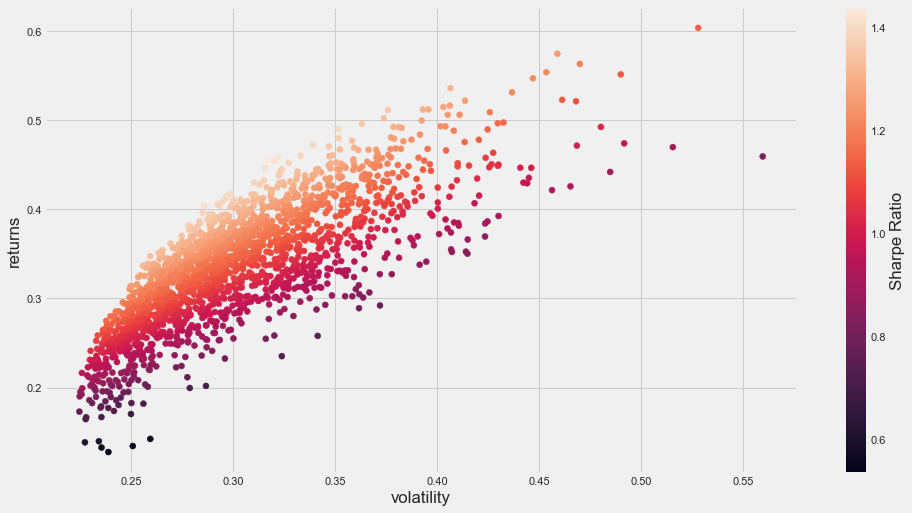

In [299]:
#Visualizziamo i portafogli con Matplotlib
plt.figure(figsize=(15, 8))
plt.scatter(portfolio_risk, portfolio_returns, c = portfolio_returns / portfolio_risk)
plt.xlabel('volatility')
plt.ylabel('returns')
plt.colorbar(label='Sharpe Ratio')
plt.show()

In [300]:
#Troviamo il portafoglio migliore in base a:
#Rischio minore / Ritorno maggiore / Sharpe Ratio maggiore

portfolio_metrics = [portfolio_returns, portfolio_risk, portfolio_sharpe_ratio, portfolio_weights]

#Creiamo un DataFrame
portfolio_df = pd.DataFrame(portfolio_metrics)
portfolio_df = portfolio_df.T

#Rinominiamo le colonne
portfolio_df.columns = ['P. Returns', 'P. Risk', 'P. Sharpe Ratio', 'P. Weights']

#Convertiamo le prime 3 colonne da obj a float
for col in ['P. Returns', 'P. Risk', 'P. Sharpe Ratio']:
    portfolio_df[col] = portfolio_df[col].astype(float)
    
portfolio_df


,P. Returns,P. Risk,P. Sharpe Ratio,P. Weights
0,0.337862,0.297802,1.134521,"[0.11445619729084448, 0.24752754481687203, 0.1..."
1,0.323930,0.285328,1.135289,"[0.1413885455799386, 0.04902206583908078, 0.23..."
2,0.270248,0.260809,1.036191,"[0.2486149460407939, 0.2019185964307624, 0.035..."
3,0.297371,0.277080,1.073233,"[0.181412260491827, 0.09714913106098366, 0.131..."
4,0.378484,0.310459,1.219111,"[0.1572268975135951, 0.1578526188438614, 0.198..."
...,...,...,...,...
1995,0.324533,0.270981,1.197624,"[0.08695316797261458, 0.22626940986202734, 0.1..."
1996,0.353317,0.324316,1.089421,"[0.23614525036009132, 0.029044923112192134, 0...."
1997,0.314789,0.286470,1.098855,"[0.10001267787247536, 0.24232113813931247, 0.1..."
1998,0.250531,0.243171,1.030264,"[0.20783048023527134, 0.22408862646153574, 0.0..."


In [301]:
#Portafoglio con Sharpe Ratio maggiore
highest_sharpe_ratio = portfolio_df.iloc[portfolio_df['P. Sharpe Ratio'].idxmax()]

#Portafoglio con rischio minore
min_risk = portfolio_df.iloc[portfolio_df['P. Risk'].idxmin()]

#Portafoglio con ritorno maggiore
highest_return = portfolio_df.iloc[portfolio_df['P. Returns'].idxmax()]

print(highest_sharpe_ratio)
print(min_risk)
print(highest_return)

P. Returns                                                  0.455551
P. Risk                                                     0.316479
P. Sharpe Ratio                                             1.439436
P. Weights         [0.1369481359944861, 0.33360239292833765, 0.38...
Name: 1293, dtype: object
P. Returns                                                  0.172939
P. Risk                                                     0.224614
P. Sharpe Ratio                                             0.769937
P. Weights         [0.16510362650494365, 0.24270599065049542, 0.0...
Name: 1949, dtype: object
P. Returns                                                  0.603693
P. Risk                                                     0.527925
P. Sharpe Ratio                                             1.143519
P. Weights         [0.04079256547779547, 0.059887612239768906, 0....
Name: 78, dtype: object


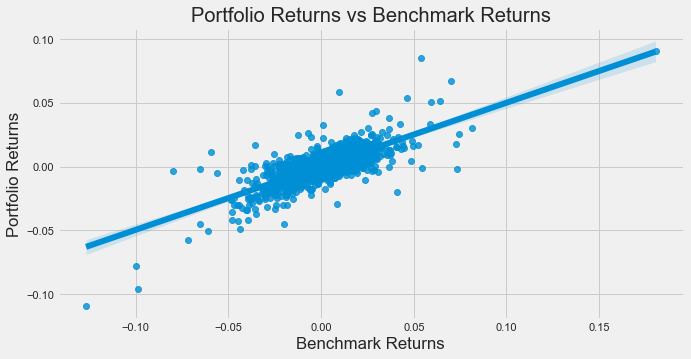

In [418]:
import pandas_datareader as web
#Seleziono il portafoglio con Highest Sharpe Ratio
wts = portfolio_df.iloc[portfolio_df['P. Sharpe Ratio'].idxmax()]['P. Weights']

tickers = ['FB', 'AAPL', 'TSLA', 'F', 'NVAX', 'VTRS']
df = pdr.DataReader(tickers, data_source='yahoo', start='2011-11-30', end='2020-11-30')
close_df = df["Close"]
return_stocks = close_df.pct_change()
port_ret = (return_stocks * wts).sum(axis = 1)

#Beta portafoglio
benchmark_price = web.get_data_yahoo('SPY',start='2011-11-30', end='2020-11-30')                   
benchmark_ret = benchmark_price["Adj Close"].pct_change()

#Scatter Plot dei ritorni nel nostro portafoglio contro i ritorni del benchmark
sns.regplot(port_ret, benchmark_ret)
plt.xlabel("Benchmark Returns")
plt.ylabel("Portfolio Returns")
plt.title("Portfolio Returns vs Benchmark Returns")
plt.show()

In [429]:
(beta, alpha) = stats.linregress(benchmark_ret.values[1:], port_ret.values[1:])[0:2]
print("The portfolio beta is", round(beta, 4))

The portfolio beta is 1.1421


In [430]:
print("The portfolio alpha is", round(alpha, 5))

The portfolio alpha is 0.00016


________________________________________________________________________________________________

Portafoglio con valore Close predetti nel punto 3

________________________________________________________________________________________________

In [431]:
close_predetta

,Meta Close,Apple Close,Tesla Close,Ford Close,Viatris Close,Nova Close
Date,,,,,,
2020-10-26,275.295380,112.881683,437.191162,8.711482,15.013907,97.573380
2020-10-27,276.976746,112.329193,434.365631,8.779545,14.953941,95.289291
2020-10-28,278.867310,112.076630,432.827698,8.812570,14.775466,93.649368
2020-10-29,278.595032,111.283783,429.454163,8.795522,14.539010,91.405113
2020-10-30,279.089752,110.929420,426.411407,8.778842,14.318449,90.188675
...,...,...,...,...,...,...
2021-11-22,339.411469,146.326599,1003.848694,19.974321,13.163586,166.701141
2021-11-23,339.882385,147.990173,1018.745300,20.078621,12.962899,172.357971
2021-11-24,339.600494,149.488724,1027.785645,20.201889,12.804480,176.527847


In [432]:
#Ricaviamo i prezzi di chiusura di ciasuna azione e inserimoli in un dataframe
tickers = ['FB', 'AAPL', 'TSLA', 'F', 'NVAX', 'VTRS']
return_stocks = close_predetta.pct_change()
return_stocks

,Meta Close,Apple Close,Tesla Close,Ford Close,Viatris Close,Nova Close
Date,,,,,,
2020-10-26,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-27,0.006107,-0.004894,-0.006463,0.007813,-0.003994,-0.023409
2020-10-28,0.006826,-0.002248,-0.003541,0.003762,-0.011935,-0.017210
2020-10-29,-0.000976,-0.007074,-0.007794,-0.001934,-0.016003,-0.023964
2020-10-30,0.001776,-0.003184,-0.007085,-0.001896,-0.015170,-0.013308
...,...,...,...,...,...,...
2021-11-22,0.002935,0.011387,0.010772,-0.003327,-0.016103,0.023822
2021-11-23,0.001387,0.011369,0.014839,0.005222,-0.015246,0.033934
2021-11-24,-0.000829,0.010126,0.008874,0.006139,-0.012221,0.024193


In [433]:
#Generiamo 2000 portafogli random e calcoliamo ritorni, rischio e Sharpe Ratio per ciasuno di essi
numbers_of_portfolio = 2000
RF = 0
portfolio_returns = []
portfolio_risk = []
portfolio_sharpe_ratio = []
portfolio_weights = []

for portfolio in range(numbers_of_portfolio):
    weights = np.random.random_sample((len(tickers)))
    #Assicuriamoci che la somma totale dei pesi sia 1
    weights = weights / np.sum(weights)
    annualize_return = np.sum((return_stocks.mean() * weights) * 252)
    portfolio_returns.append(annualize_return)
    
    #variance
    matrix_covariance_portfolio = (return_stocks.cov())*252
    portfolio_variance = np.dot(weights.T,np.dot(matrix_covariance_portfolio, weights))
    portfolio_standard_deviation = np.sqrt(portfolio_variance) 
    portfolio_risk.append(portfolio_standard_deviation)
    
    #sharpe_ratio
    sharpe_ratio = ((annualize_return- RF)/portfolio_standard_deviation)
    portfolio_sharpe_ratio.append(sharpe_ratio)
    portfolio_weights.append(weights)

In [434]:
#Convertiamo la lista in un array
portfolio_risk = np.array(portfolio_risk)
portfolio_returns = np.array(portfolio_returns)
portfolio_sharpe_ratio = np.array(portfolio_sharpe_ratio)

C:\Users\simon\AppData\Local\Temp/ipykernel_17096/1790158924.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='Sharpe Ratio')


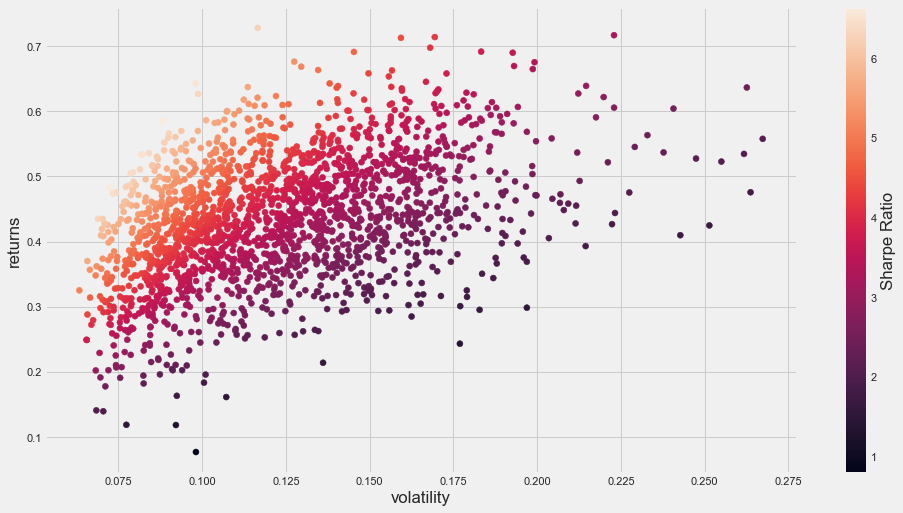

In [435]:
#Visualizziamo i portafogli con Matplotlib
plt.figure(figsize=(15, 8))
plt.scatter(portfolio_risk, portfolio_returns, c = portfolio_returns / portfolio_risk)
plt.xlabel('volatility')
plt.ylabel('returns')
plt.colorbar(label='Sharpe Ratio')
plt.show()

In [436]:
#Troviamo il portafoglio migliore in base a:
#Rischio minore / Ritorno maggiore / Sharpe Ratio maggiore

portfolio_metrics = [portfolio_returns, portfolio_risk, portfolio_sharpe_ratio, portfolio_weights]

#Creiamo un DataFrame
portfolio_df = pd.DataFrame(portfolio_metrics)
portfolio_df = portfolio_df.T

#Rinominiamo le colonne
portfolio_df.columns = ['P. Returns', 'P. Risk', 'P. Sharpe Ratio', 'P. Weights']

#Convertiamo le prime 3 colonne da obj a float
for col in ['P. Returns', 'P. Risk', 'P. Sharpe Ratio']:
    portfolio_df[col] = portfolio_df[col].astype(float)
    
portfolio_df


,P. Returns,P. Risk,P. Sharpe Ratio,P. Weights
0,0.410448,0.123925,3.312061,"[0.3003633576489736, 0.04240225585006422, 0.28..."
1,0.409793,0.242767,1.688007,"[0.002293408278500935, 0.06107145243884786, 0...."
2,0.453091,0.103372,4.383094,"[0.16043795286200965, 0.28909237396753884, 0.1..."
3,0.400343,0.133575,2.997143,"[0.18206937366950574, 0.10823271328556933, 0.1..."
4,0.377485,0.092220,4.093308,"[0.20717994431265885, 0.1736850101778327, 0.10..."
...,...,...,...,...
1995,0.485837,0.078008,6.228007,"[0.22156943763110432, 0.186476216644384, 0.192..."
1996,0.490836,0.105231,4.664361,"[0.1289823116866061, 0.0642020863172432, 0.278..."
1997,0.554757,0.135893,4.082294,"[0.10226663177301737, 0.28057239195905587, 0.2..."
1998,0.577365,0.134596,4.289627,"[0.07921119587735873, 0.15363932151706042, 0.3..."


In [437]:
#Portafoglio con Sharpe Ratio maggiore
highest_sharpe_ratio = portfolio_df.iloc[portfolio_df['P. Sharpe Ratio'].idxmax()]

#Portafoglio con rischio minore
min_risk = portfolio_df.iloc[portfolio_df['P. Risk'].idxmin()]

#Portafoglio con ritorno maggiore
highest_return = portfolio_df.iloc[portfolio_df['P. Returns'].idxmax()]

print(highest_sharpe_ratio)
print(min_risk)
print(highest_return)

P. Returns                                                  0.482111
P. Risk                                                     0.072494
P. Sharpe Ratio                                             6.650307
P. Weights         [0.21451043415899657, 0.29003845653032595, 0.1...
Name: 453, dtype: object
P. Returns                                                  0.325198
P. Risk                                                     0.063322
P. Sharpe Ratio                                             5.135595
P. Weights         [0.2656186627916495, 0.4023931855966617, 0.068...
Name: 10, dtype: object
P. Returns                                                  0.727914
P. Risk                                                     0.116593
P. Sharpe Ratio                                              6.24321
P. Weights         [0.006454289519598835, 0.0230885806196158, 0.3...
Name: 1653, dtype: object


C:\Users\simon\Envs\my_python_environment\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


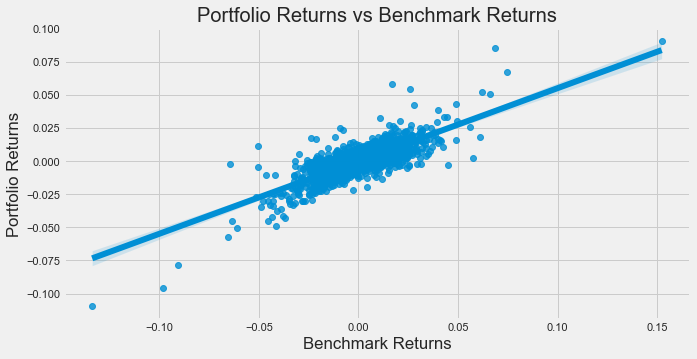

In [438]:
import pandas_datareader as web
#Seleziono il portafoglio con Highest Sharpe Ratio
wts = portfolio_df.iloc[portfolio_df['P. Sharpe Ratio'].idxmax()]['P. Weights']

tickers = ['FB', 'AAPL', 'TSLA', 'F', 'NVAX', 'VTRS']
df = pdr.DataReader(tickers, data_source='yahoo', start='2011-11-30', end='2020-11-30')
close_df = df["Close"]
return_stocks = close_df.pct_change()
port_ret = (return_stocks * wts).sum(axis = 1)

#Beta portafoglio
benchmark_price = web.get_data_yahoo('SPY',start='2011-11-30', end='2020-11-30')                   
benchmark_ret = benchmark_price["Adj Close"].pct_change()

#Scatter Plot dei ritorni nel nostro portafoglio contro i ritorni del benchmark
sns.regplot(port_ret, benchmark_ret)
plt.xlabel("Benchmark Returns")
plt.ylabel("Portfolio Returns")
plt.title("Portfolio Returns vs Benchmark Returns")
plt.show()

In [439]:
(beta, alpha) = stats.linregress(benchmark_ret.values[1:], port_ret.values[1:])[0:2]
print("The portfolio beta is", round(beta, 4))

The portfolio beta is 1.1359


In [440]:
print("The portfolio alpha is", round(alpha, 5))

The portfolio alpha is 0.00034
